importing the library for the API and setting the basin of interest (N Atlantic - includes the gulf coast area)

setting the list of cities we are interested in

In [33]:
from tropycal import tracks
import os
import numpy as np
#set area of interest
basin = tracks.TrackDataset(basin='north_atlantic',include_btk=False)

# the gulf coast cities we were given
target_cities = {
    "New Orleans, USA": (29.9511, -90.0715),
    "Houston, USA": (29.7604, -95.3698),
    "Tampa, USA": (27.9506, -82.4572),
    "Miami, USA": (25.7617, -80.1918),
    "Corpus Christi, USA": (27.8006, -97.3964),
    "Pensacola, USA": (30.4213, -87.2169),
    "Mobile, USA": (30.6954, -88.0399),
    "Galveston, USA": (29.3013, -94.7977),
    "Biloxi, USA": (30.3960, -88.8853),
    "Key West, USA": (24.5551, -81.7800),
    "Veracruz, Mexico": (19.1738, -96.1342),
    "Tampico, Mexico": (22.2553, -97.8686),
    "Campeche, Mexico": (19.8453, -90.5235),
    "Cancún, Mexico": (21.1619, -86.8515),
    "Mérida, Mexico": (20.9674, -89.5926),
    "Ciudad del Carmen, Mexico": (18.6491, -91.8071),
    "Progreso, Mexico": (21.2836, -89.6645),
    "Coatzacoalcos, Mexico": (18.1489, -94.4202),
    "Tuxpan, Mexico": (20.9589, -97.4044),
    "Havana, Cuba": (23.1136, -82.3666),
    "Varadero, Cuba": (23.1547, -81.2546),
    "Cienfuegos, Cuba": (22.1613, -80.4490),
    "Belize City, Belize": (17.5046, -88.1962),
    "George Town, Cayman Islands": (19.2869, -81.3674),
    "Nassau, Bahamas": (25.0343, -77.3963)
}

currentPoint = target_cities["New Orleans, USA"]

basin.analogs_from_point((currentPoint[0], currentPoint[1]),radius=50)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.26 seconds)
--> Starting to interpolate storms
--> Completed interpolating storms (5.81 seconds)


{'AL011860': np.float64(38.3),
 'AL051869': np.float64(32.9),
 'AL131887': np.float64(42.6),
 'AL041892': np.float64(17.5),
 'AL081893': np.float64(29.9),
 'AL011914': np.float64(21.0),
 'AL061915': np.float64(14.7),
 'AL041936': np.float64(12.4),
 'AL091936': np.float64(39.4),
 'AL041939': np.float64(39.6),
 'AL041947': np.float64(11.6),
 'AL051948': np.float64(8.9),
 'AL011955': np.float64(32.8),
 'AL051955': np.float64(22.2),
 'AL051971': np.float64(9.6),
 'AL111971': np.float64(15.2),
 'AL061975': np.float64(24.7),
 'AL181975': np.float64(8.8),
 'AL151977': np.float64(42.7),
 'AL041979': np.float64(33.5),
 'AL021988': np.float64(3.6),
 'AL071988': np.float64(9.6),
 'AL012001': np.float64(30.4),
 'AL022002': np.float64(19.8),
 'AL102002': np.float64(14.9),
 'AL032003': np.float64(43.7),
 'AL032005': np.float64(28.7),
 'AL122005': np.float64(45.9),
 'AL032020': np.float64(5.5),
 'AL282020': np.float64(10.6),
 'AL032021': np.float64(29.0)}

### For each city of interest, pull all storms of at least Cat1 that pass within the set radius (currently 50km) within the defined 30yr period

### Print the IDs for each storm and plot their courses and dump those plots into the specified folder

New Orleans, USA is at (29.9511, -90.0715)
Storm log for New Orleans: {'AL122005': np.float64(45.9), 'AL282020': np.float64(10.6)}

Houston, USA is at (29.7604, -95.3698)
Storm log for Houston: {'AL092008': np.float64(38.9)}

Tampa, USA is at (27.9506, -82.4572)
Storm log for Tampa: {'AL112017': np.float64(33.2)}

Miami, USA is at (25.7617, -80.1918)
Storm log for Miami: {'AL041992': np.float64(30.4), 'AL122005': np.float64(18.8)}

Corpus Christi, USA is at (27.8006, -97.3964)
No hurricanes hit within 50km of Corpus Christi between 1990 and 2020

Pensacola, USA is at (30.4213, -87.2169)
Storm log for Pensacola: {'AL051995': np.float64(13.2), 'AL171995': np.float64(17.5), 'AL042005': np.float64(11.9), 'AL192020': np.float64(36.0)}

Mobile, USA is at (30.6954, -88.0399)
Storm log for Mobile: {'AL051997': np.float64(35.5), 'AL092004': np.float64(21.0), 'AL192020': np.float64(47.4)}

Galveston, USA is at (29.3013, -94.7977)
Storm log for Galveston: {'AL092007': np.float64(25.5), 'AL092008'

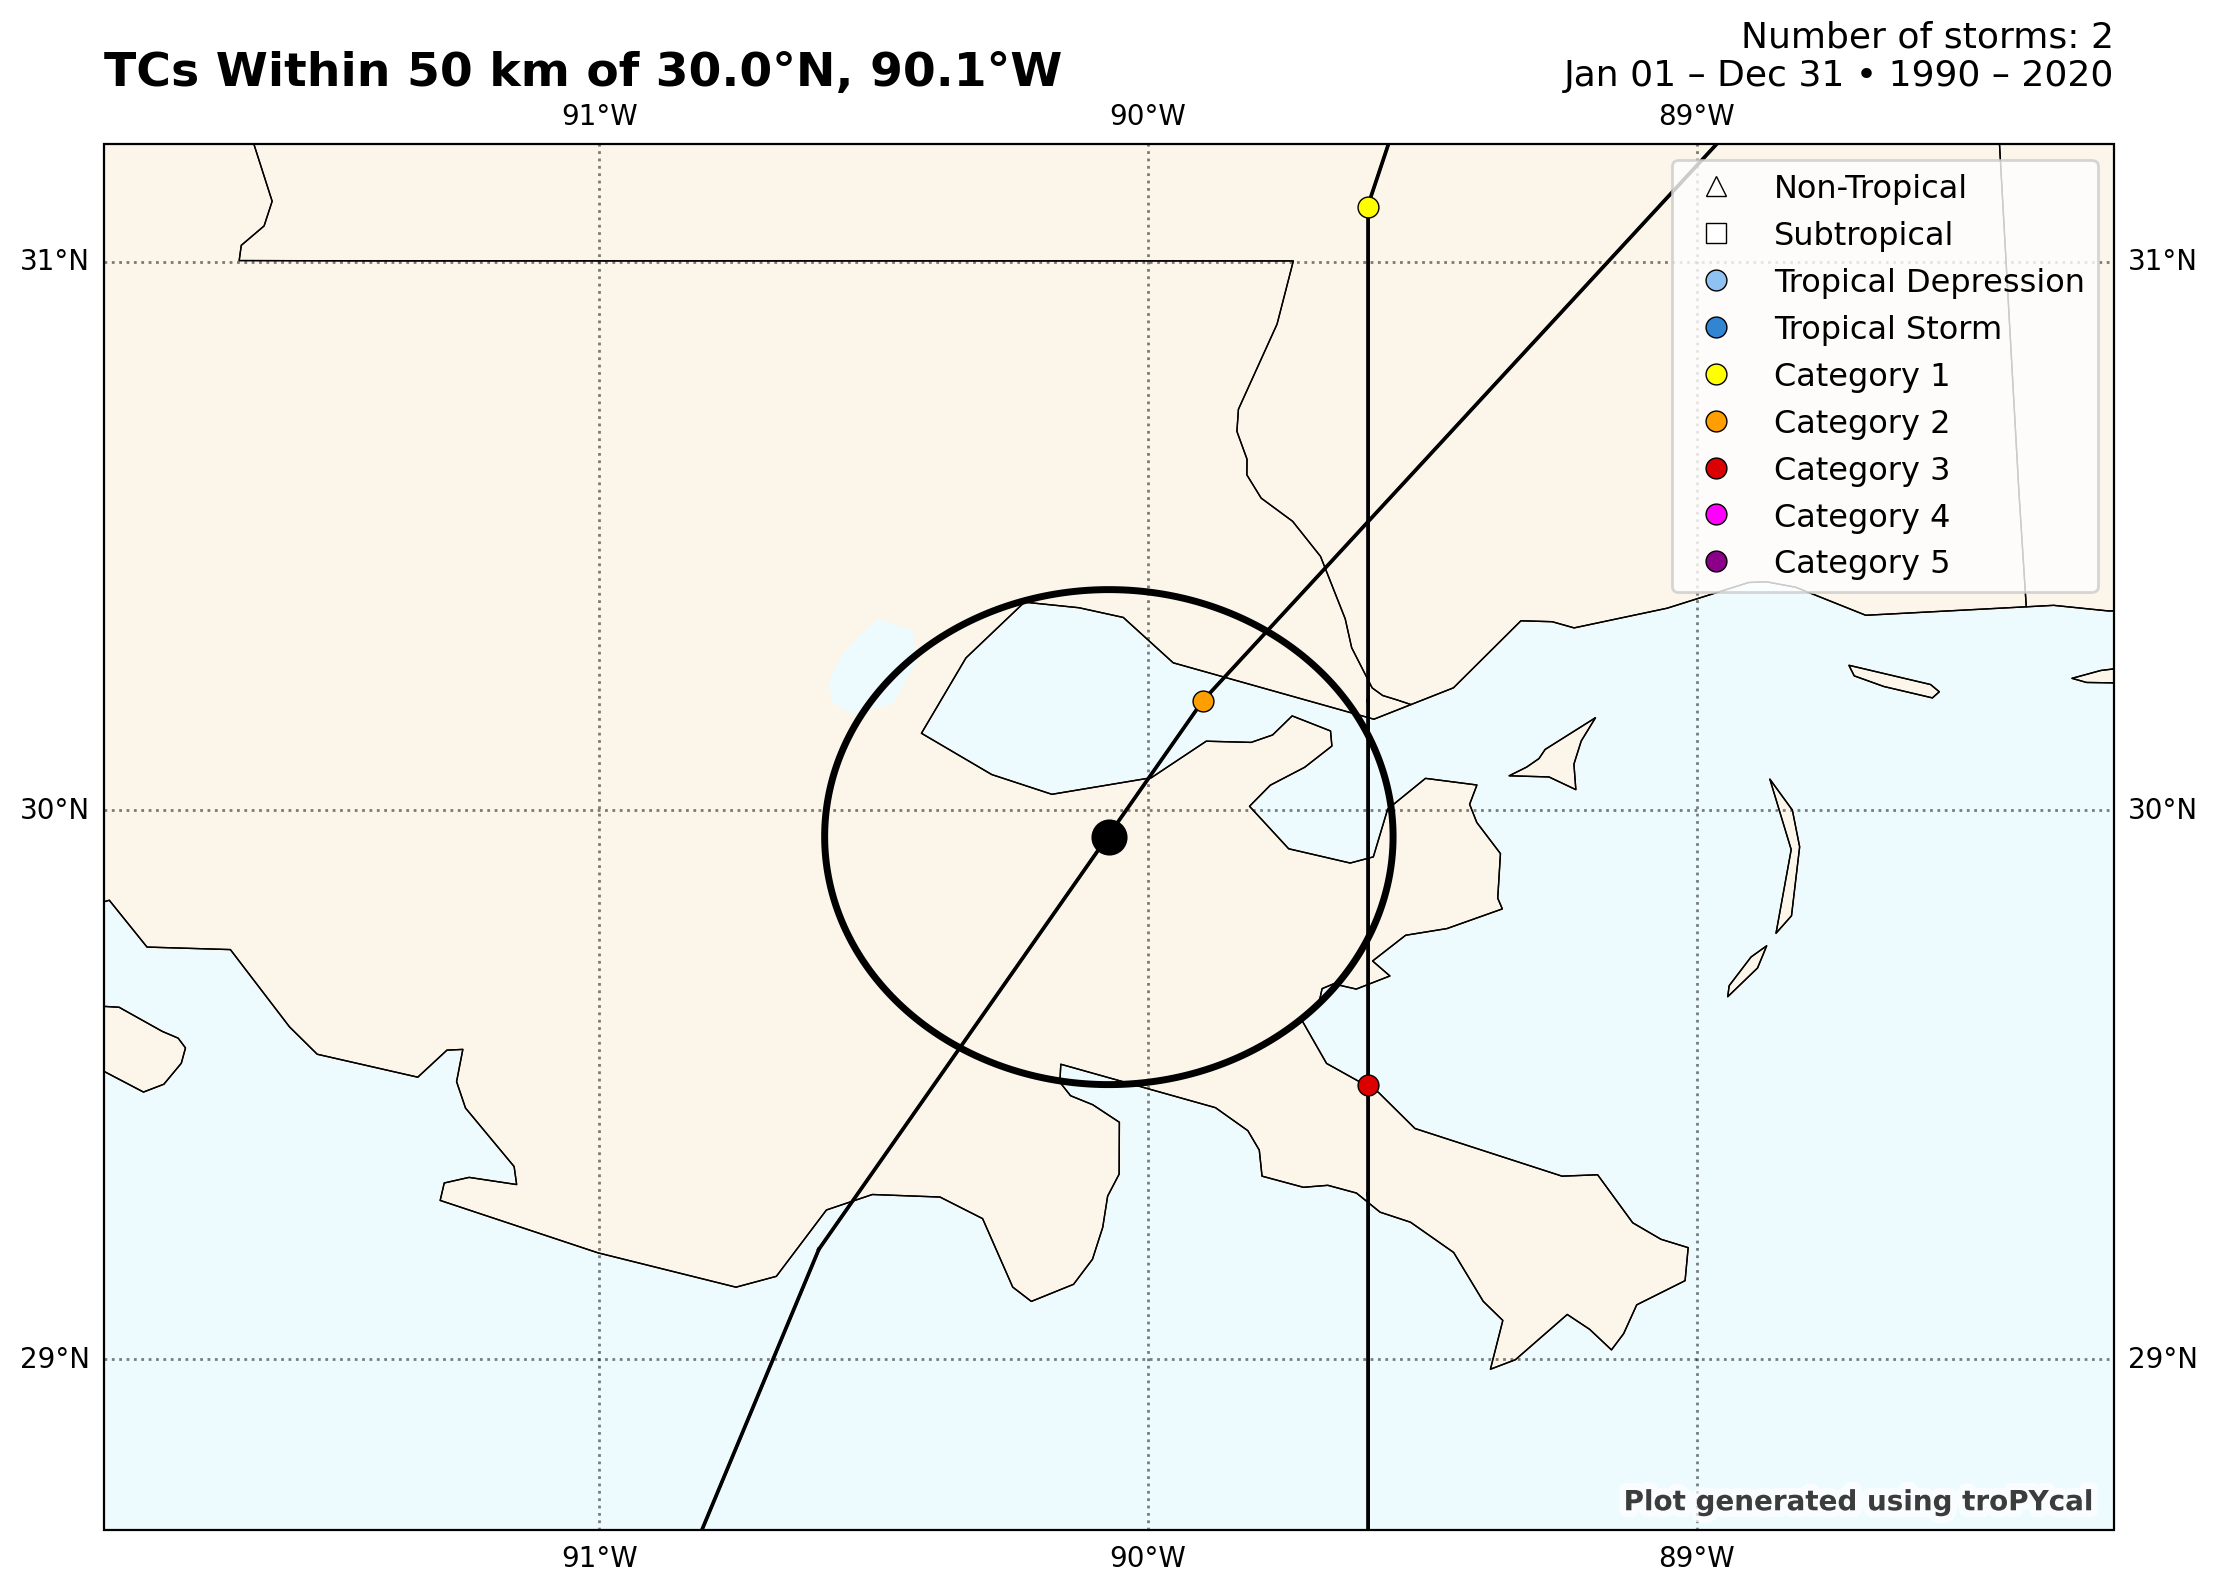

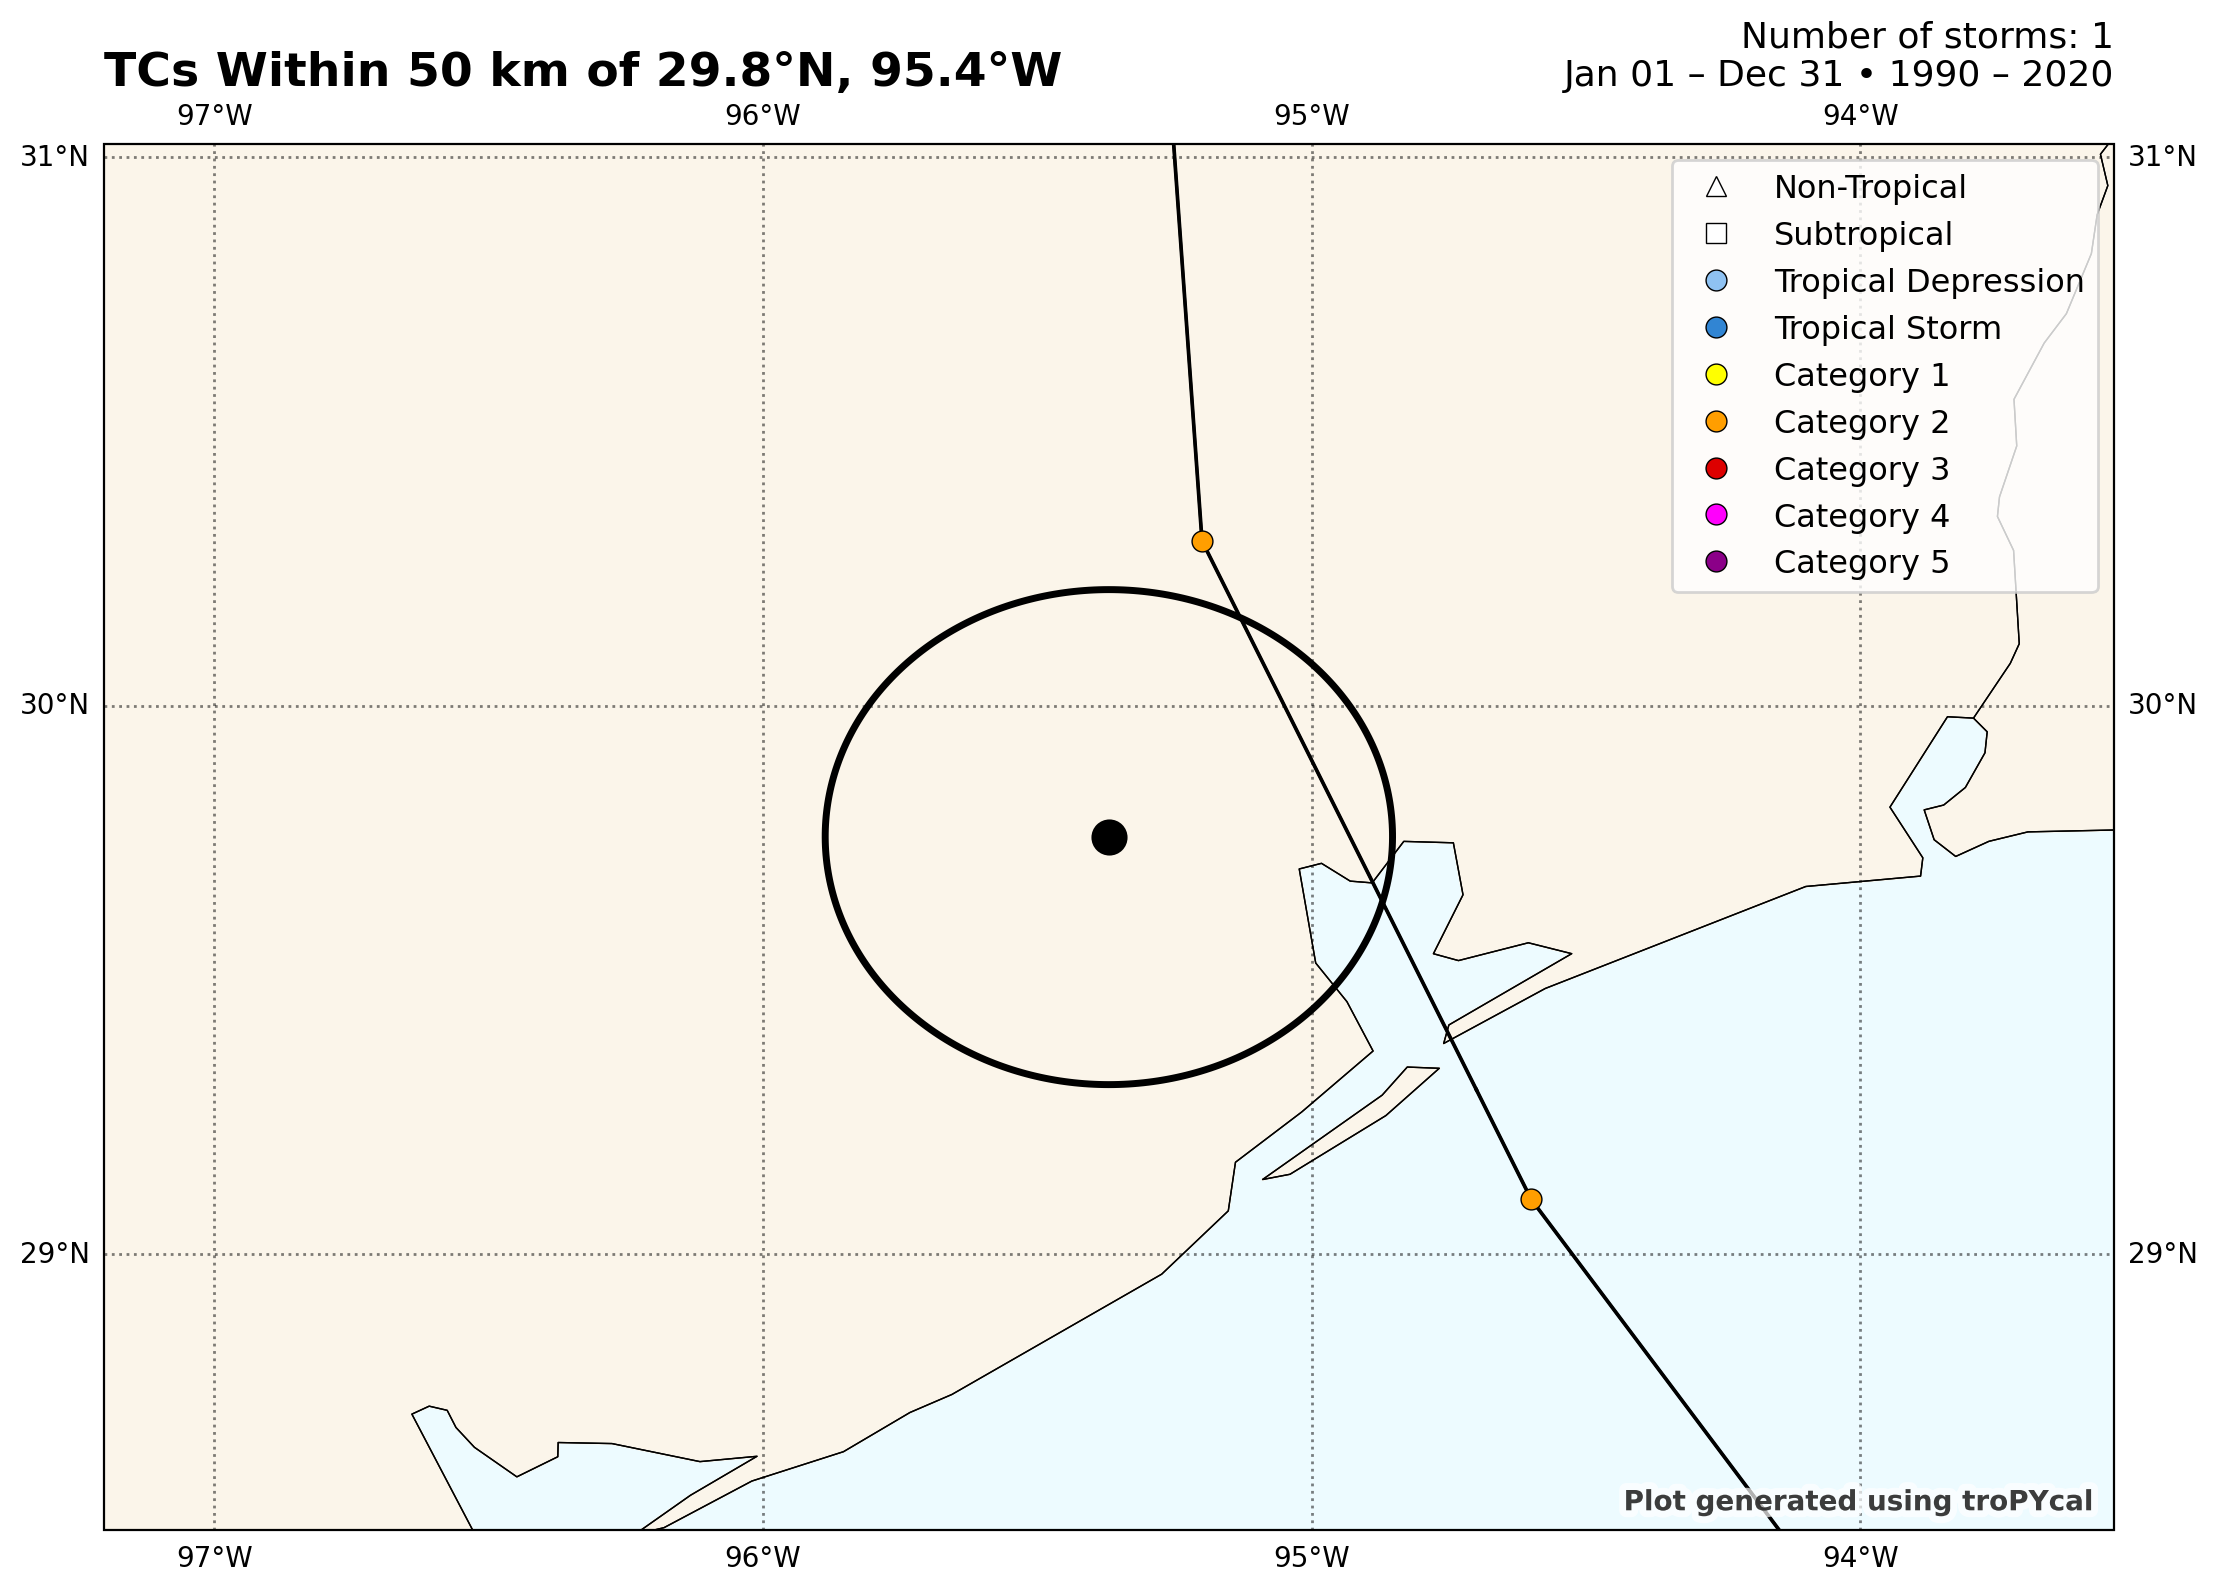

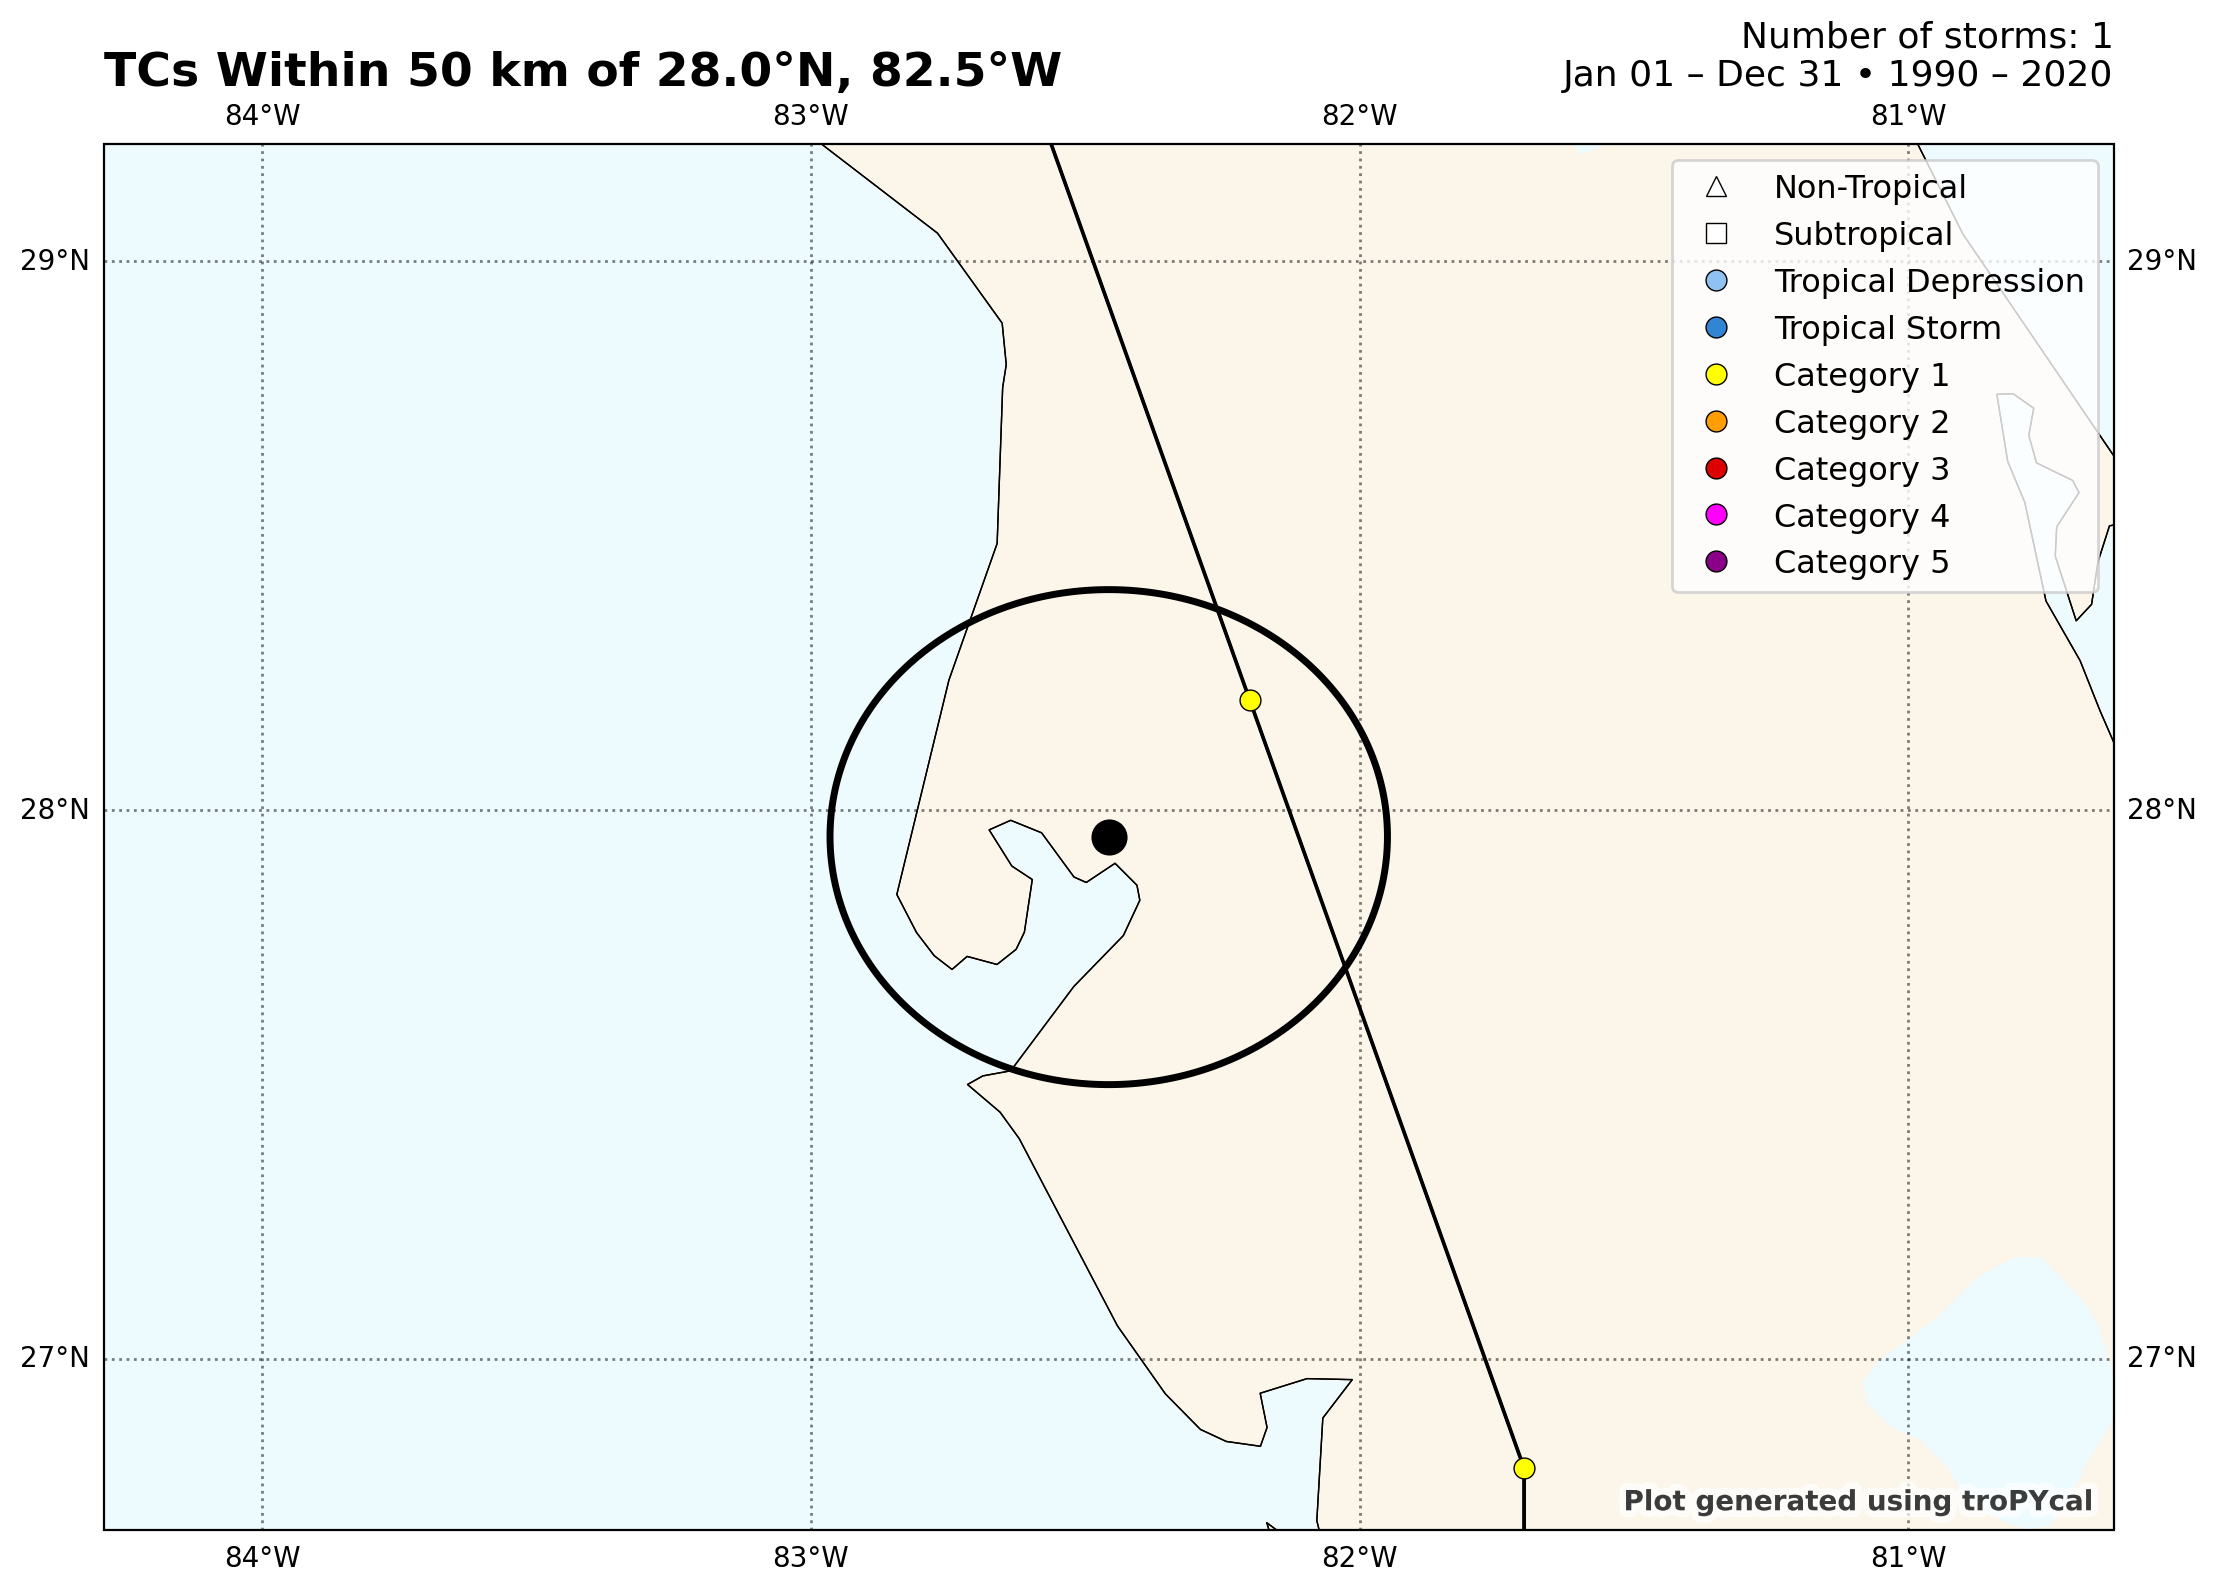

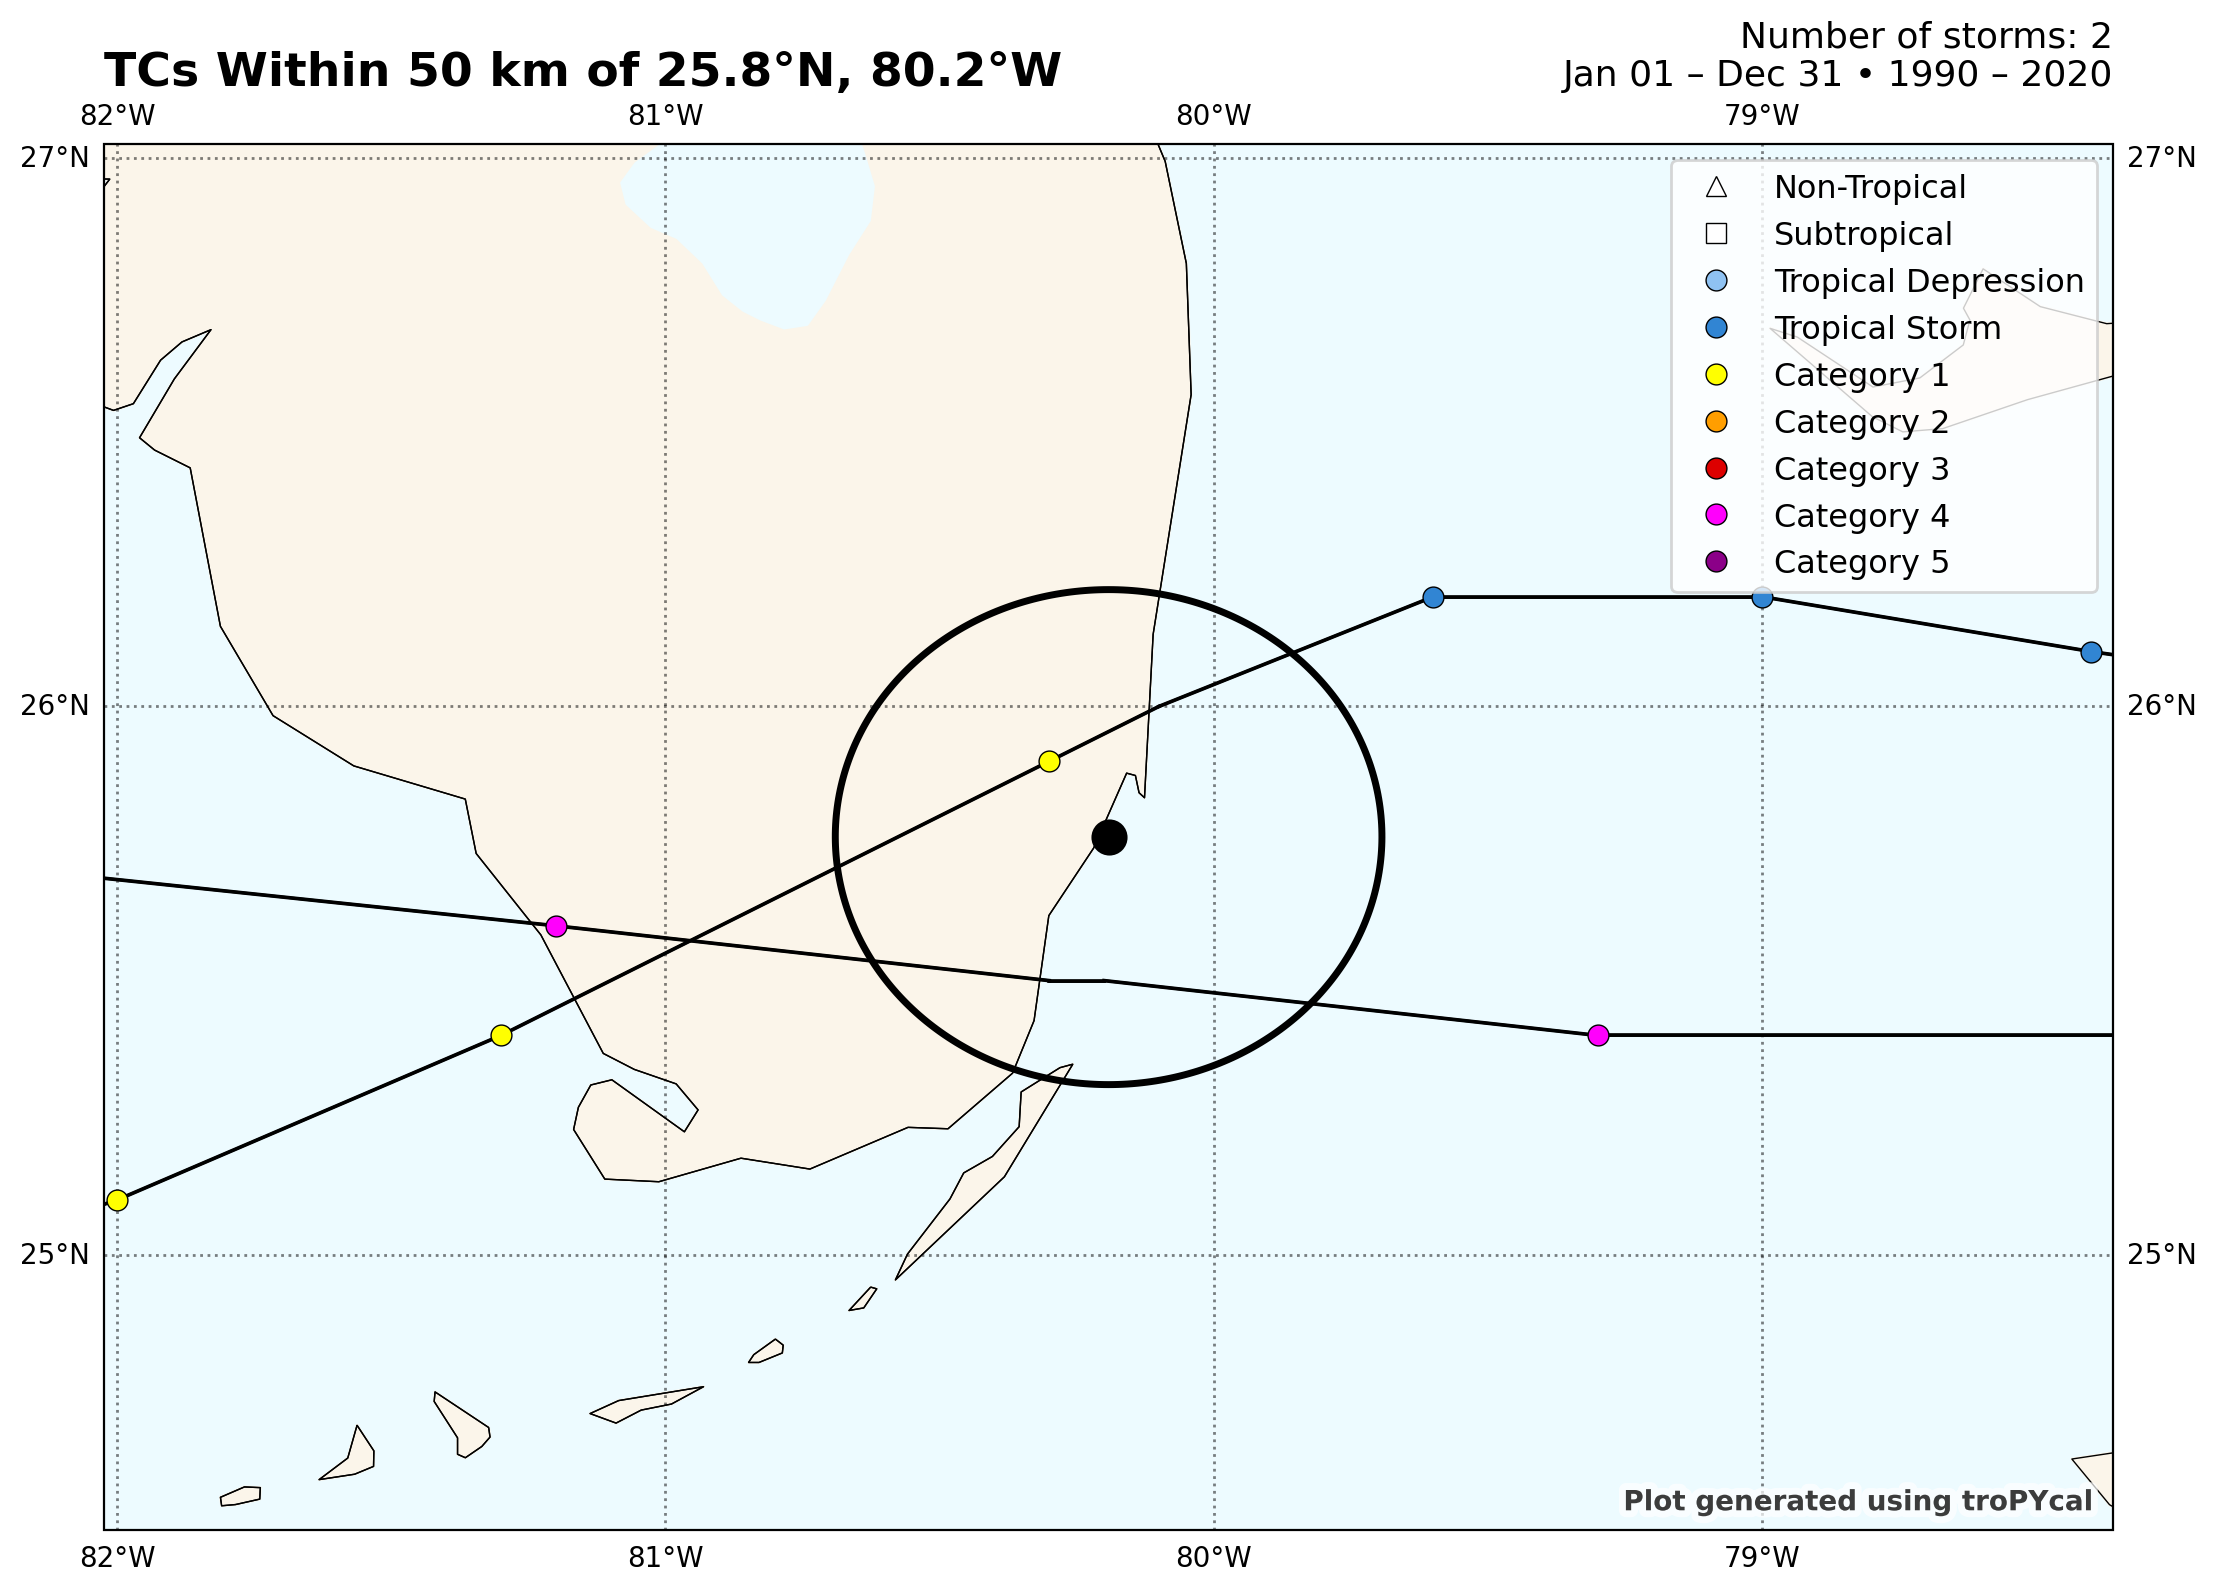

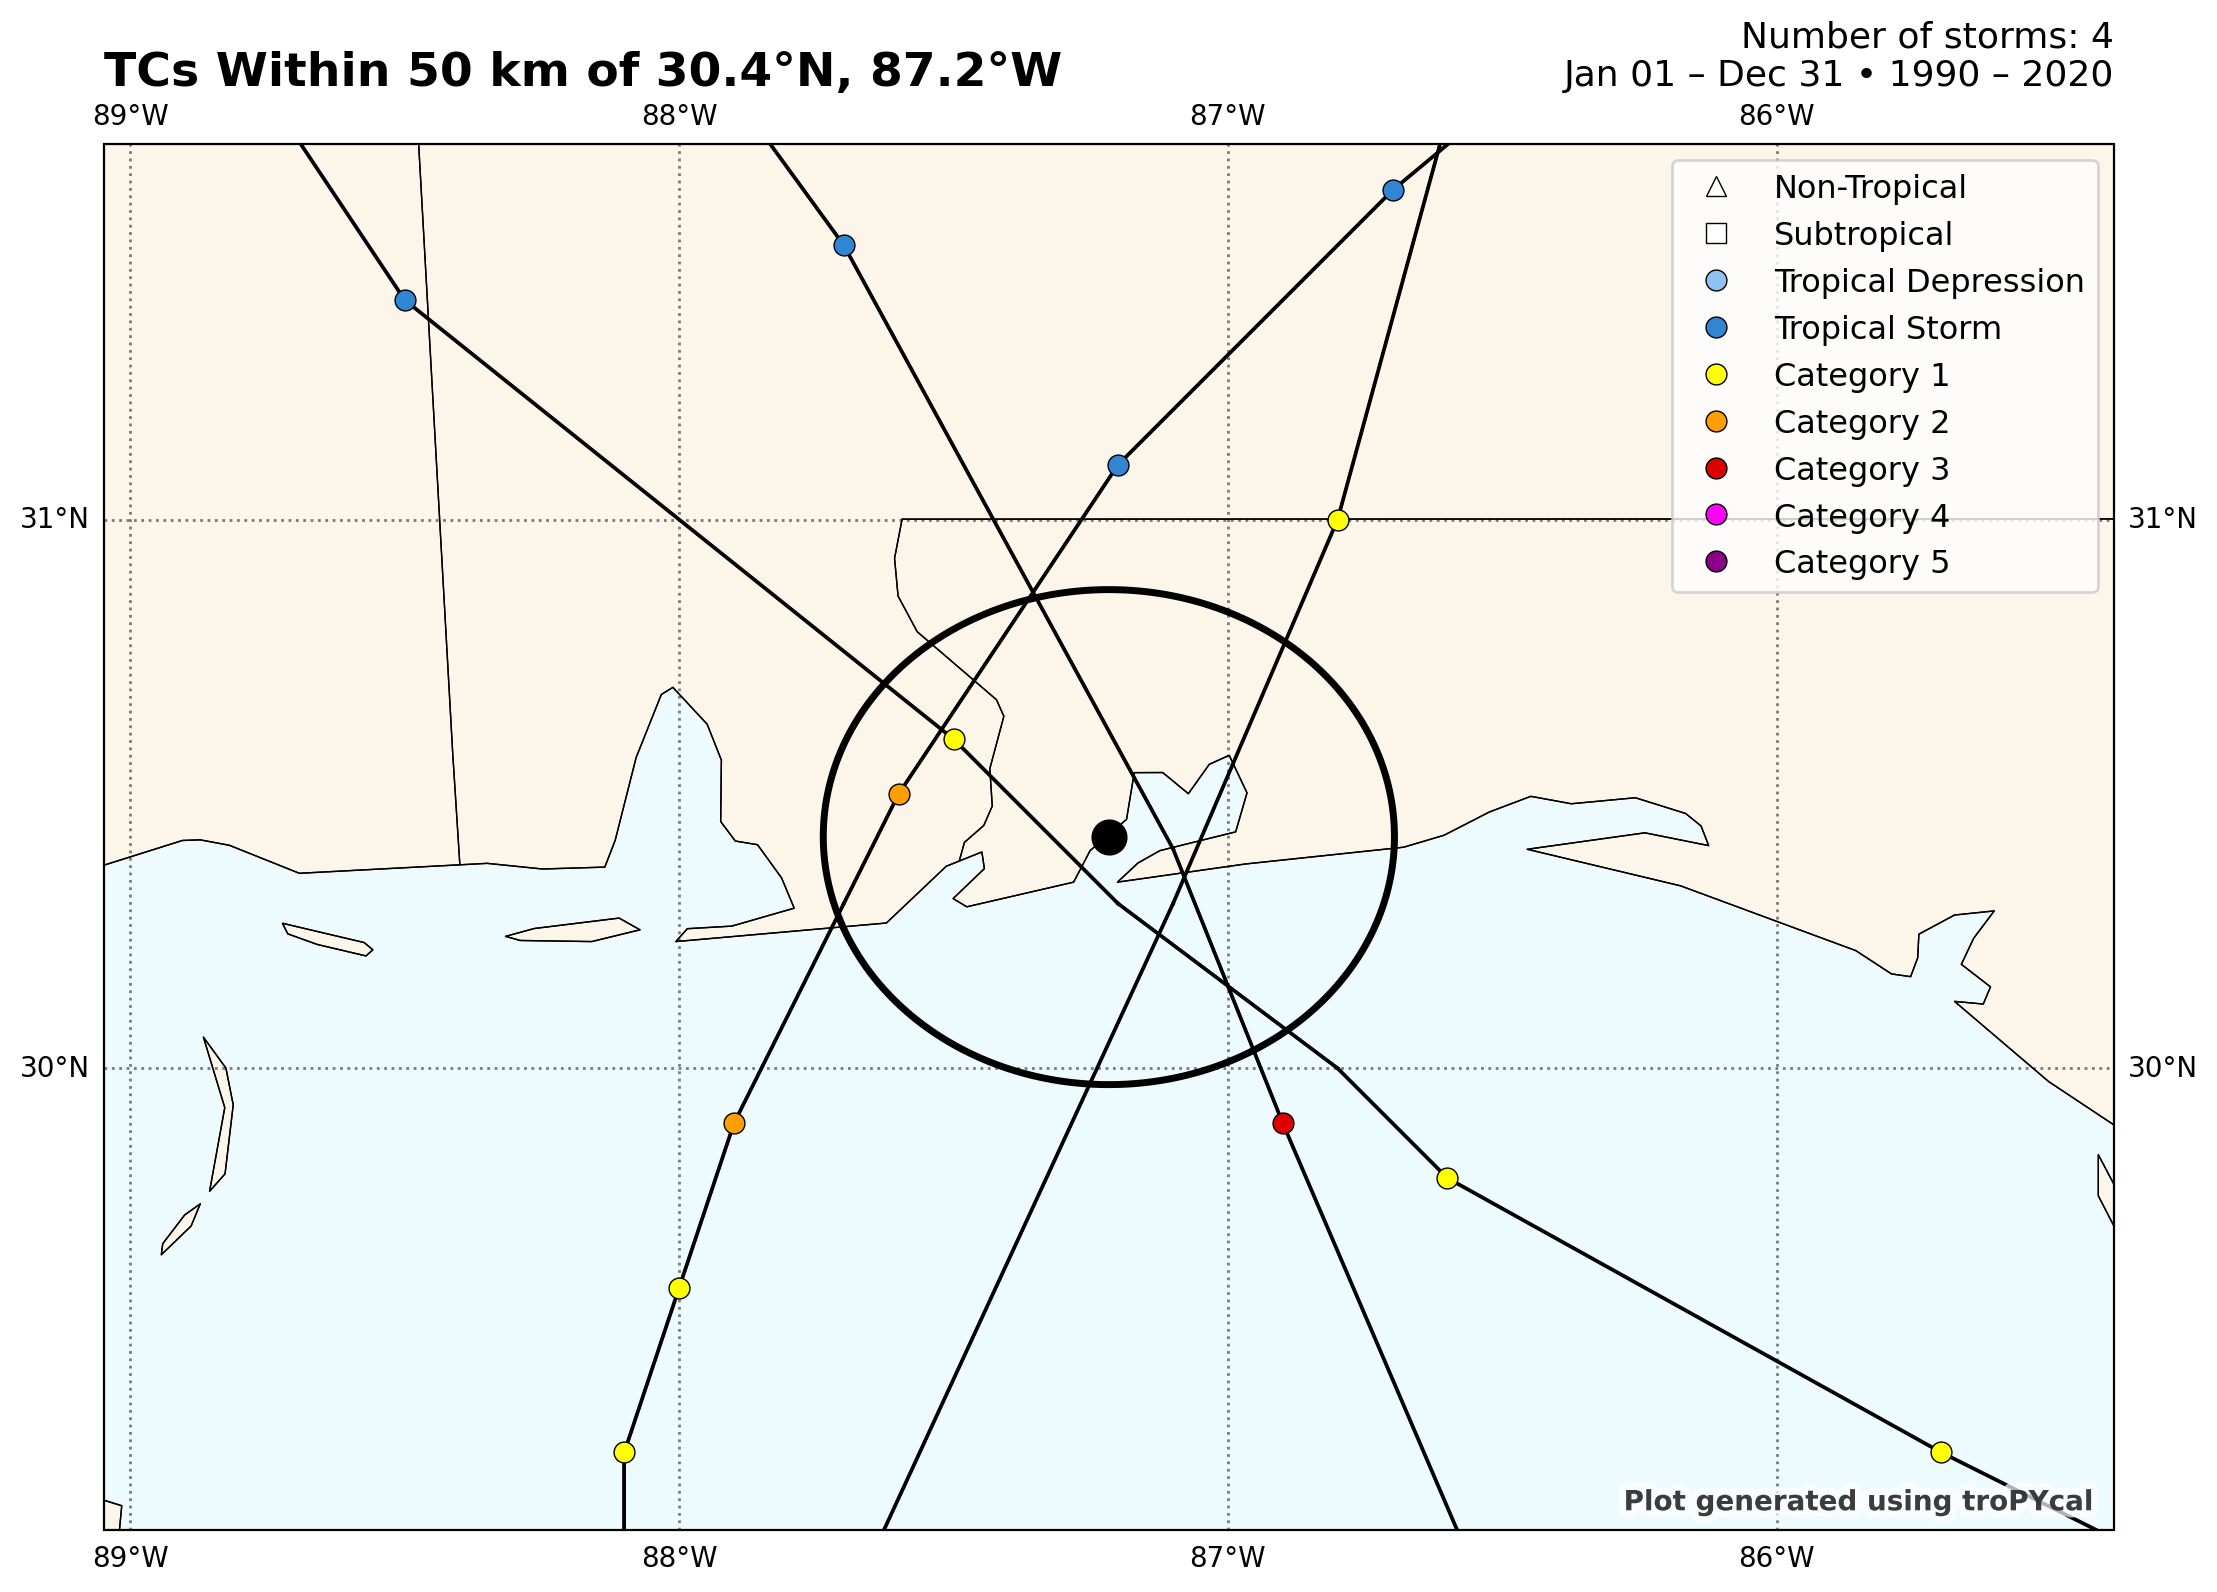

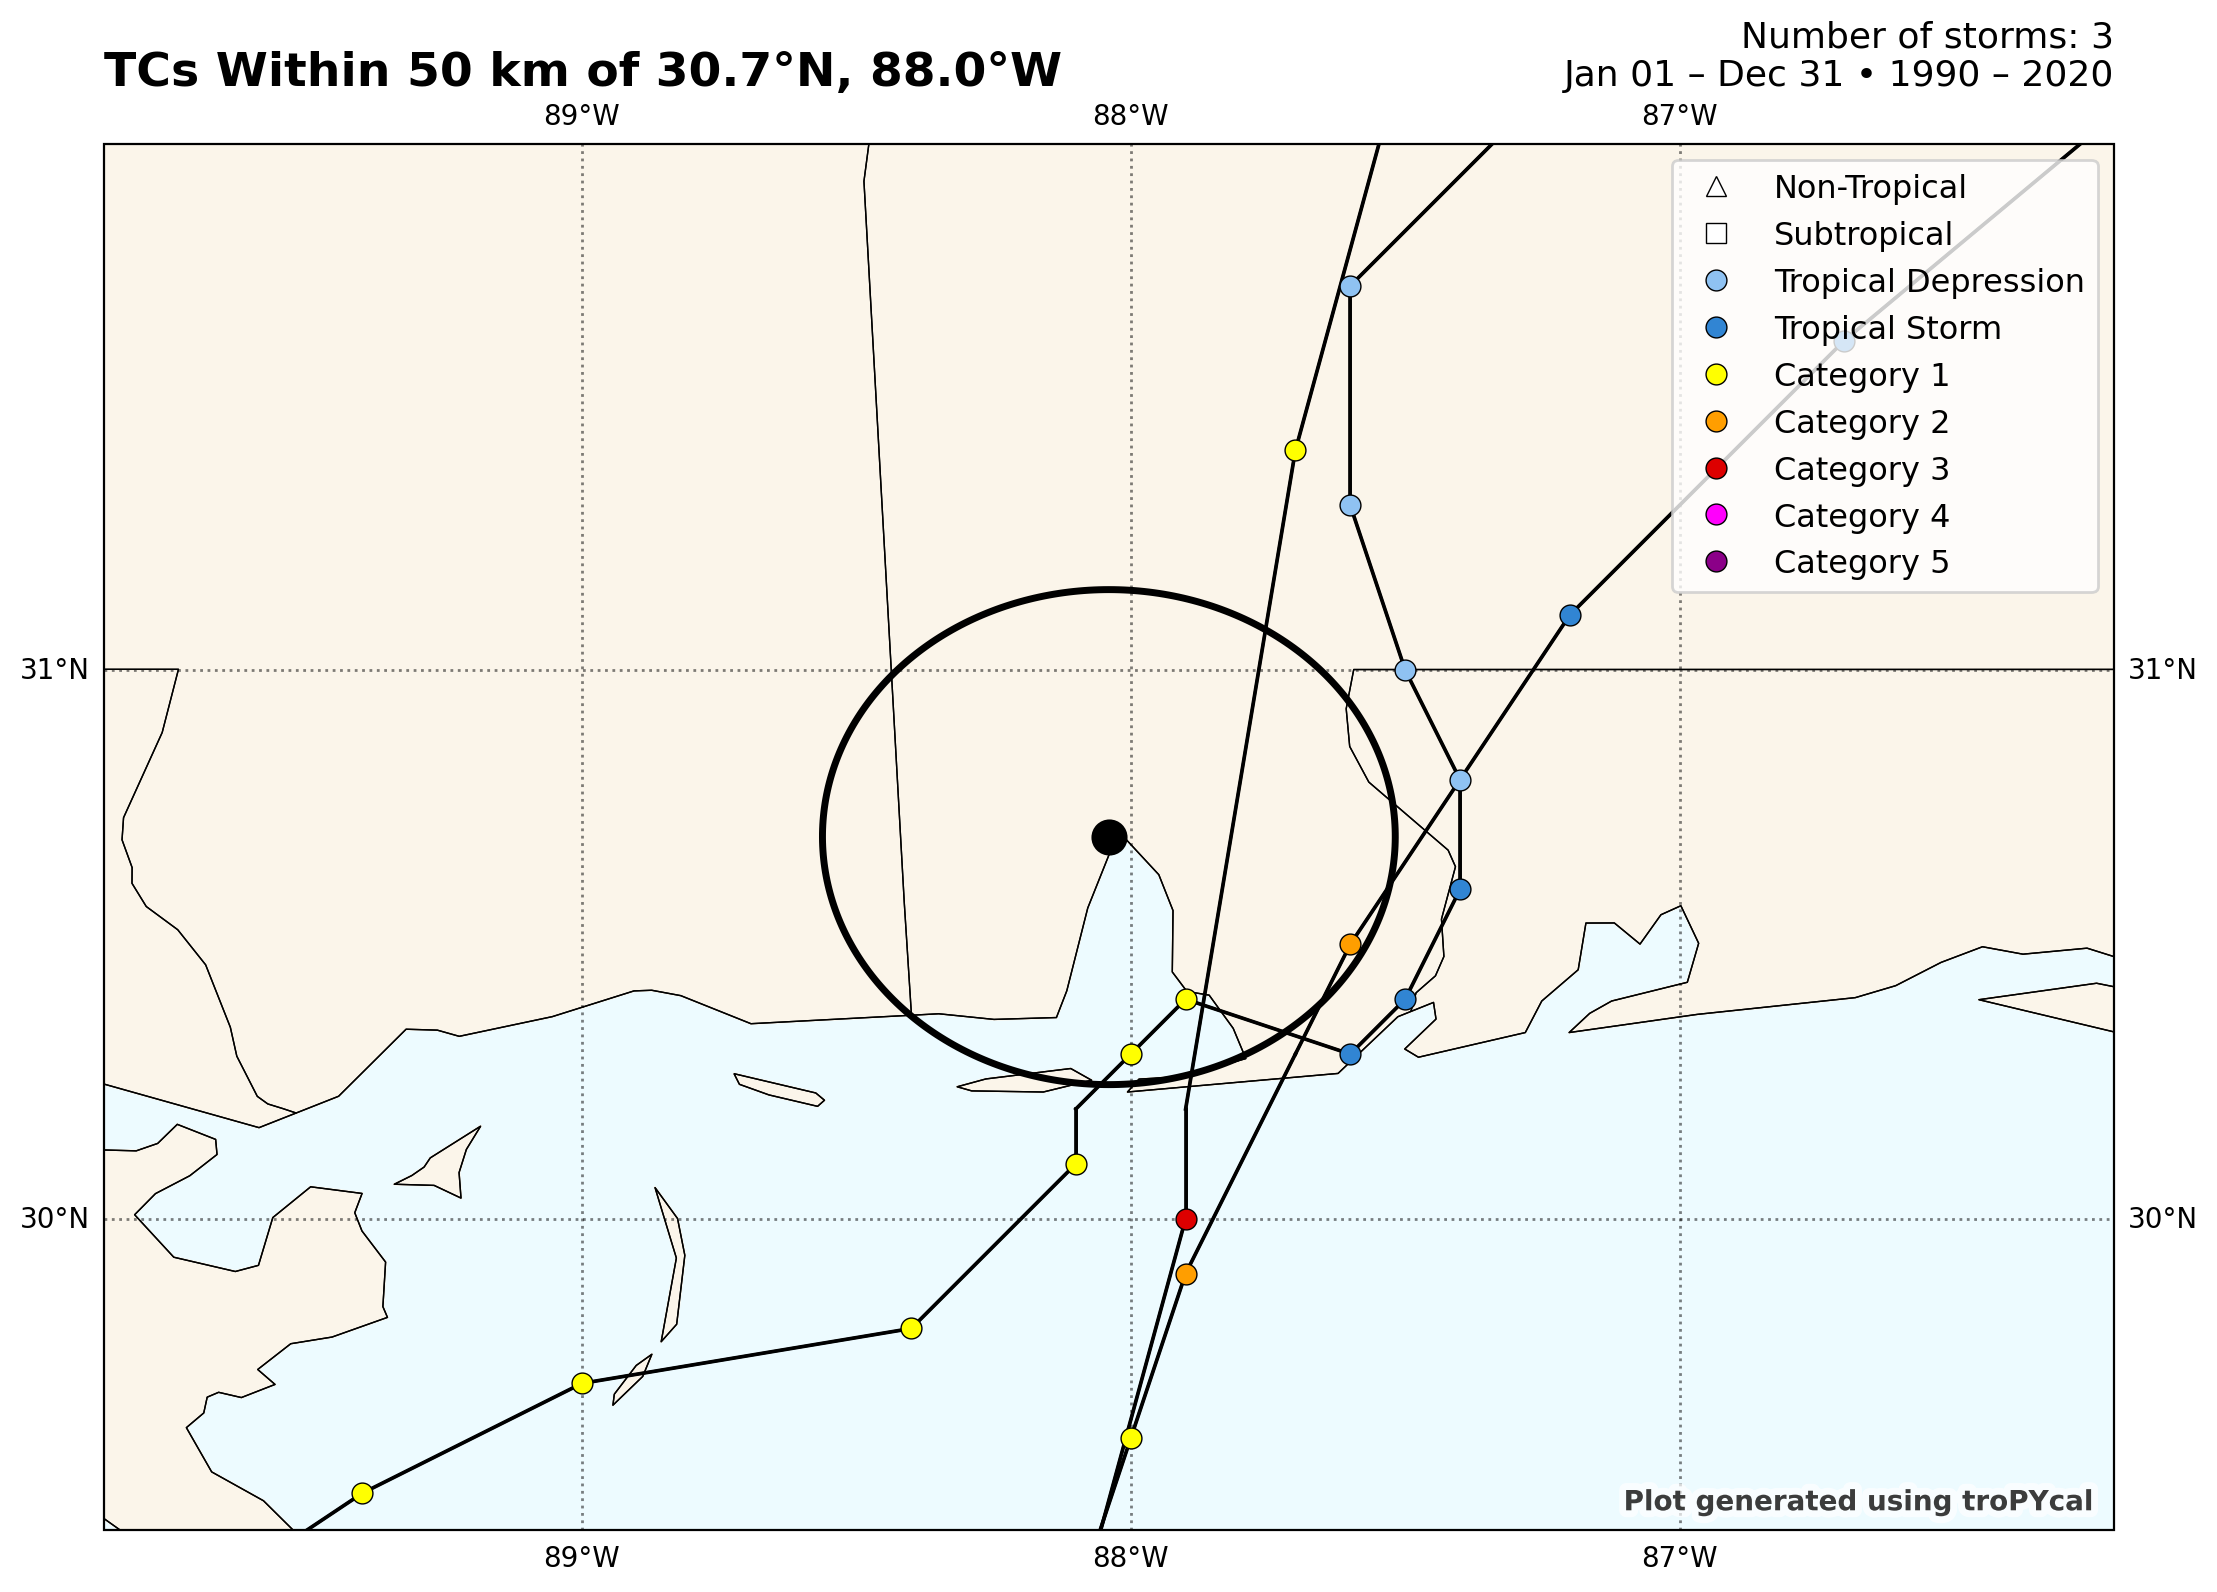

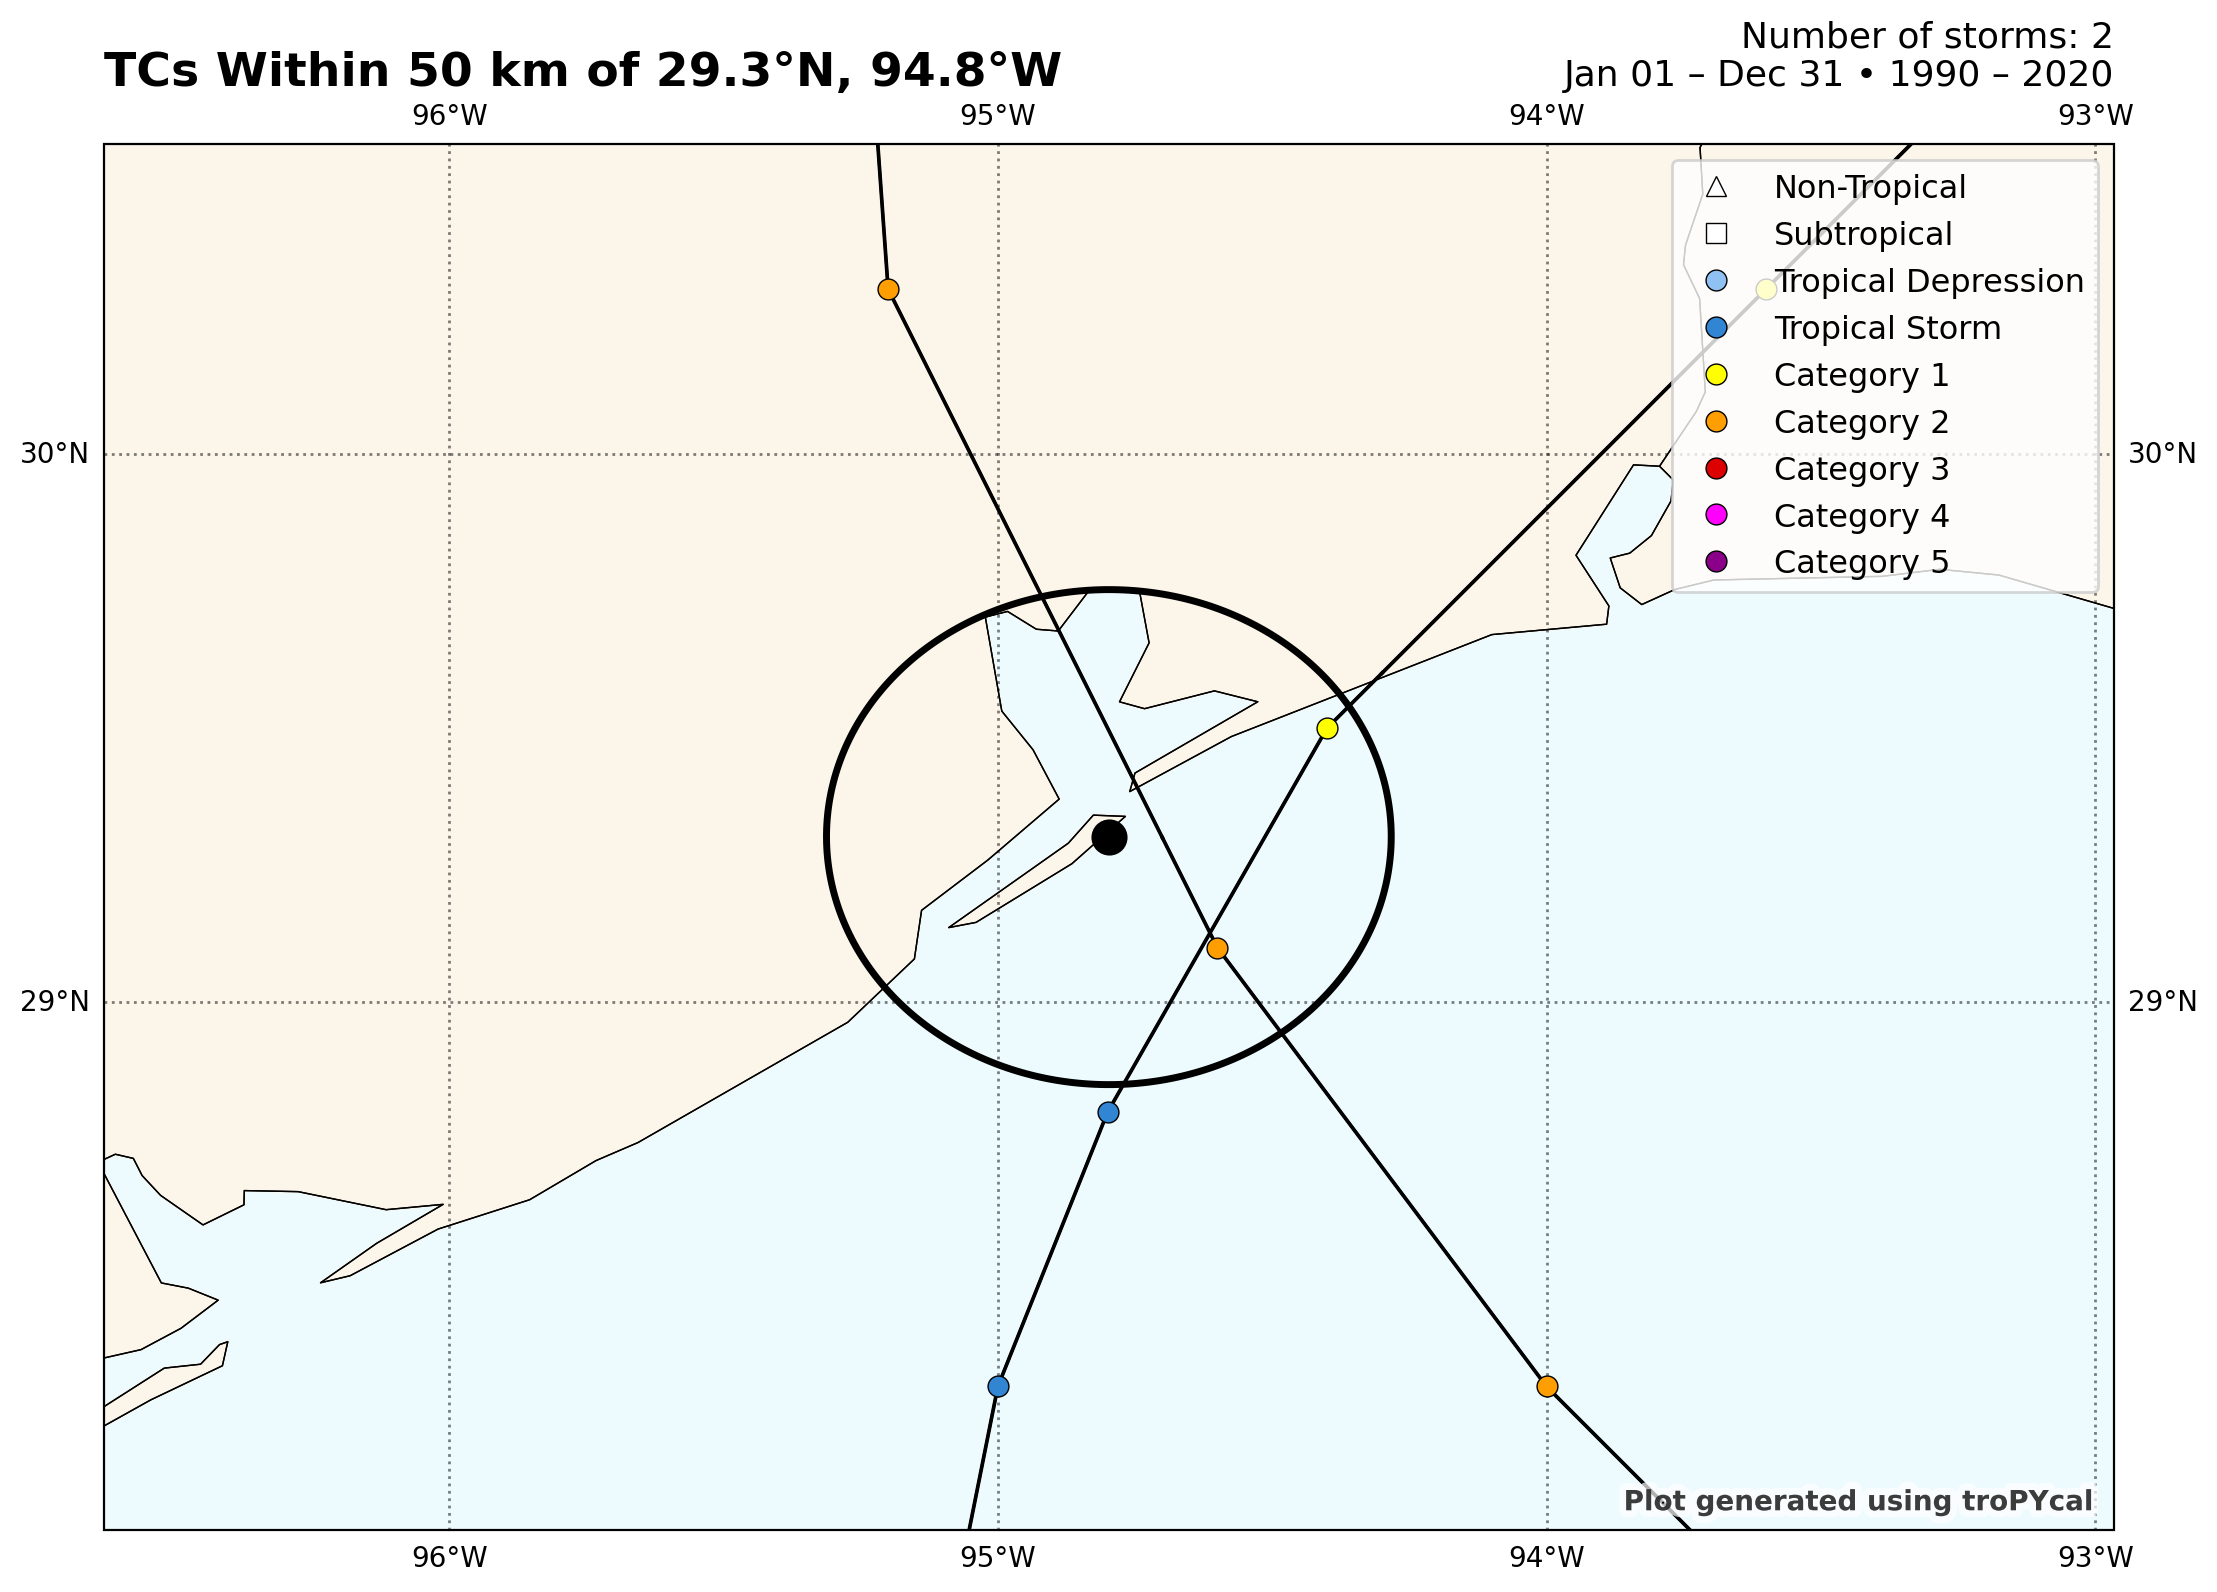

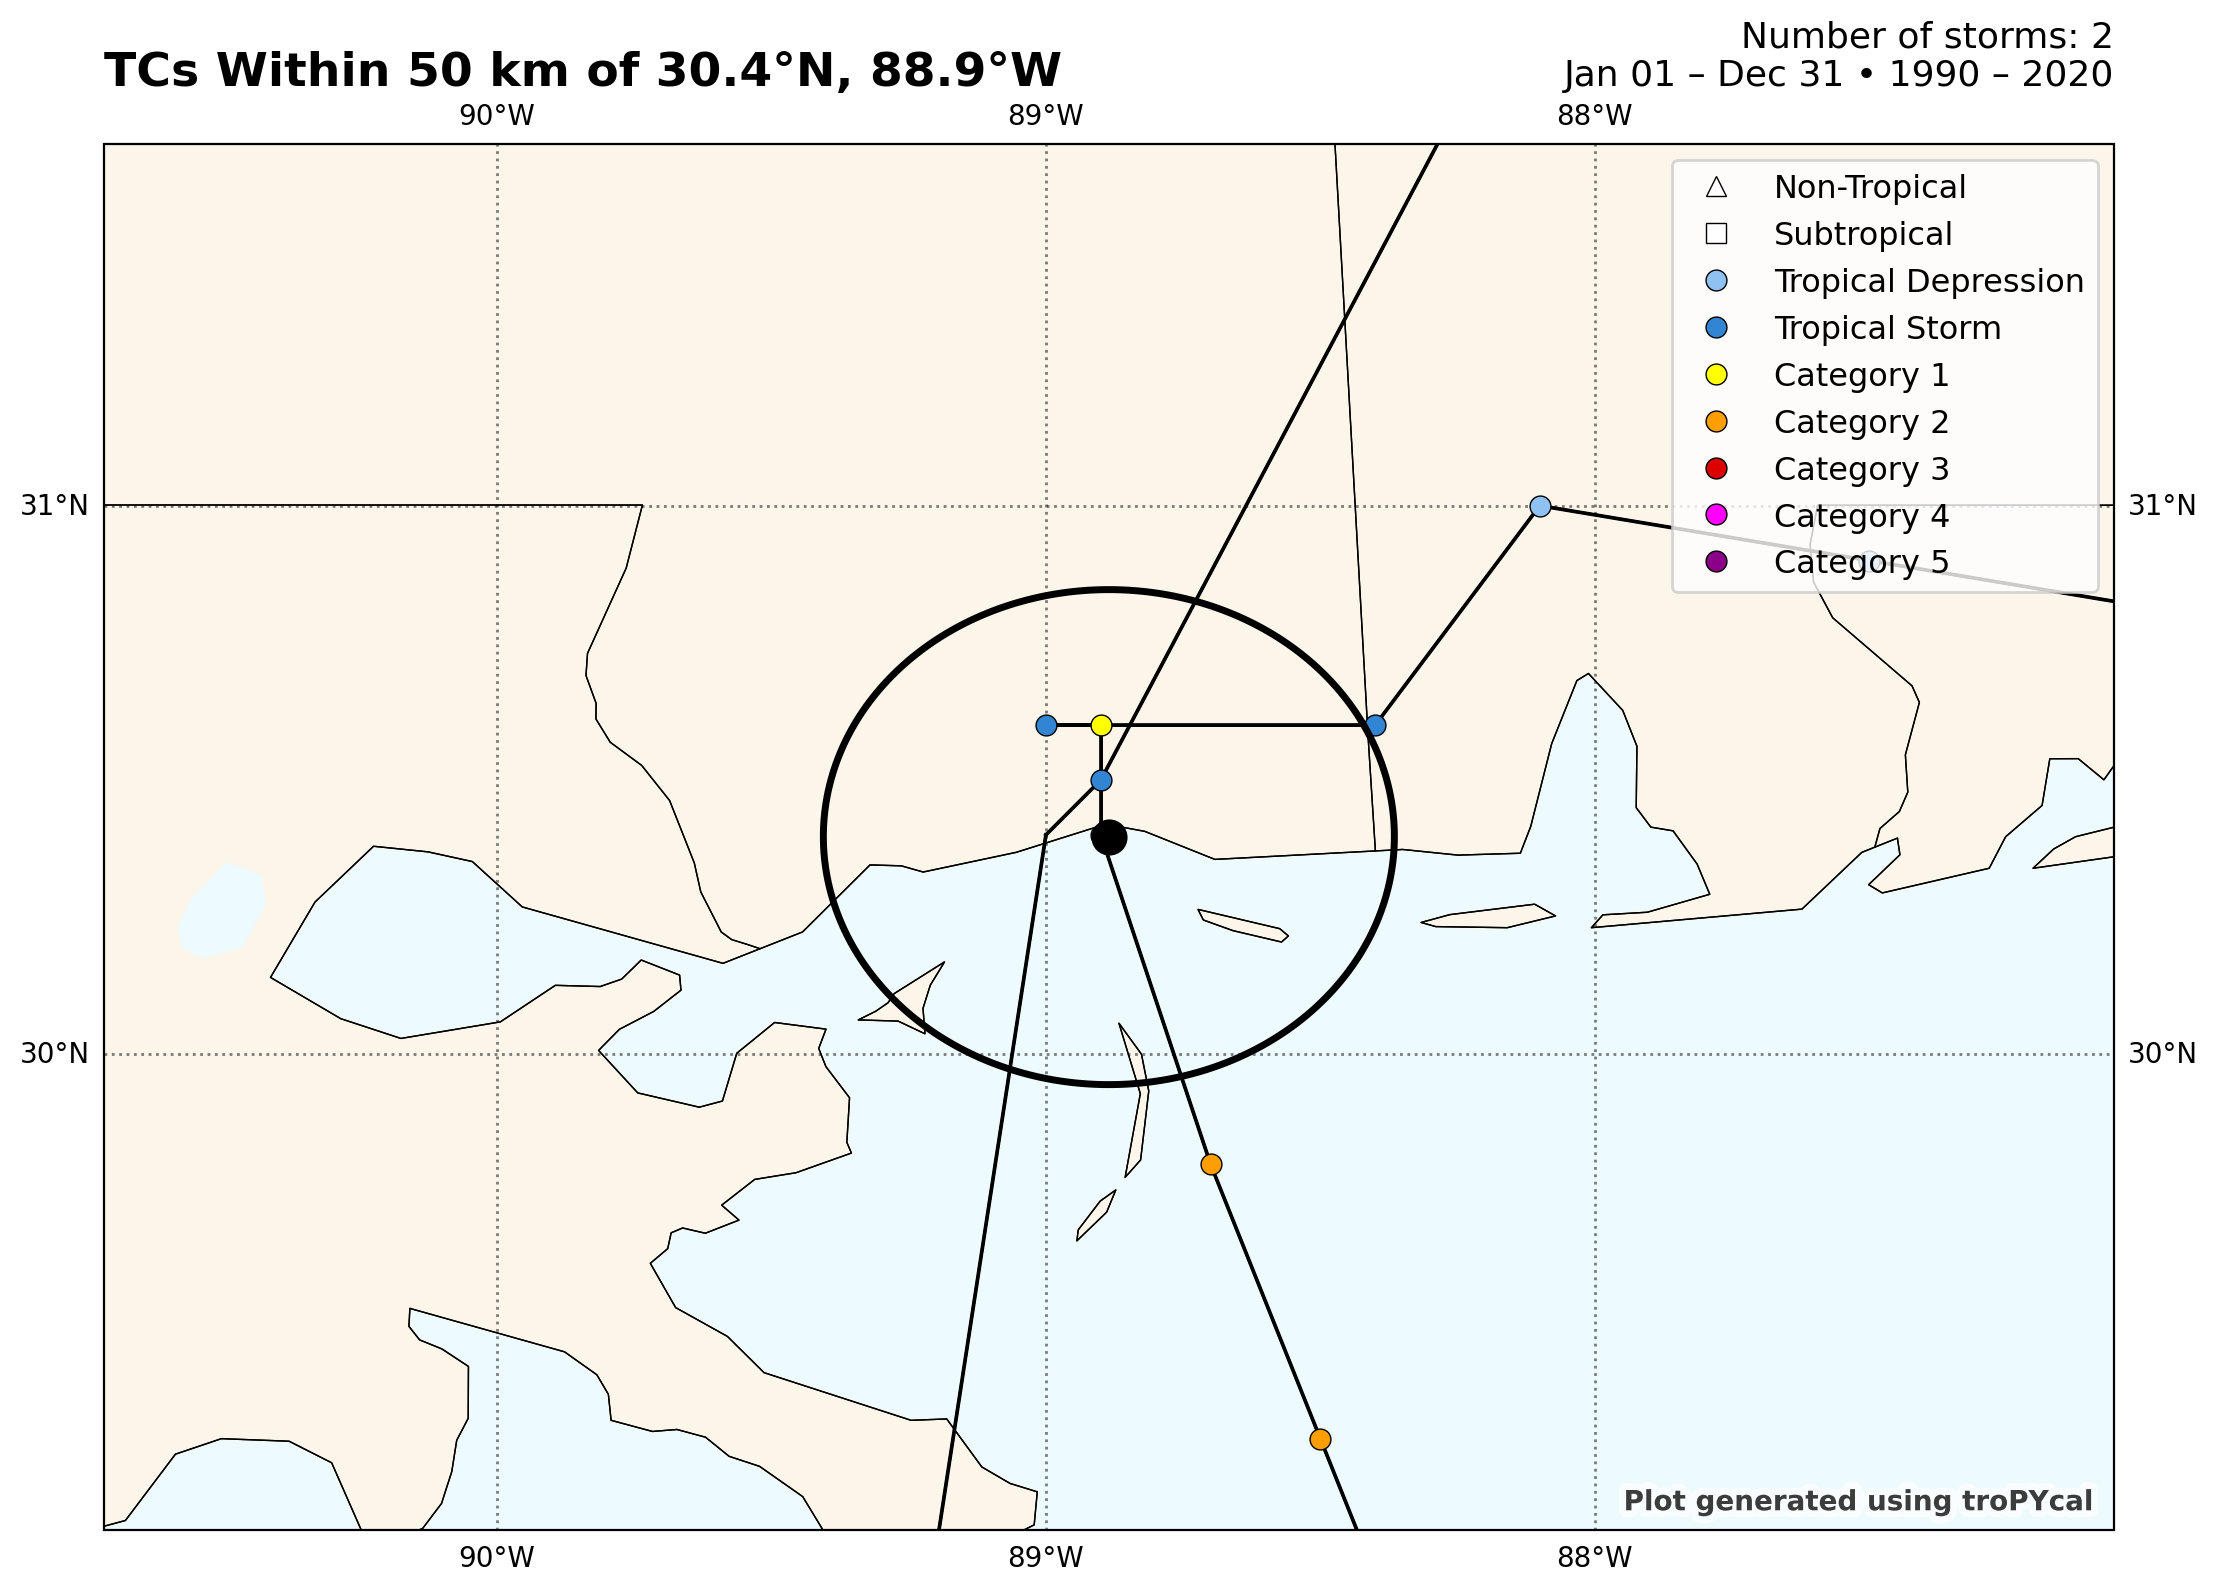

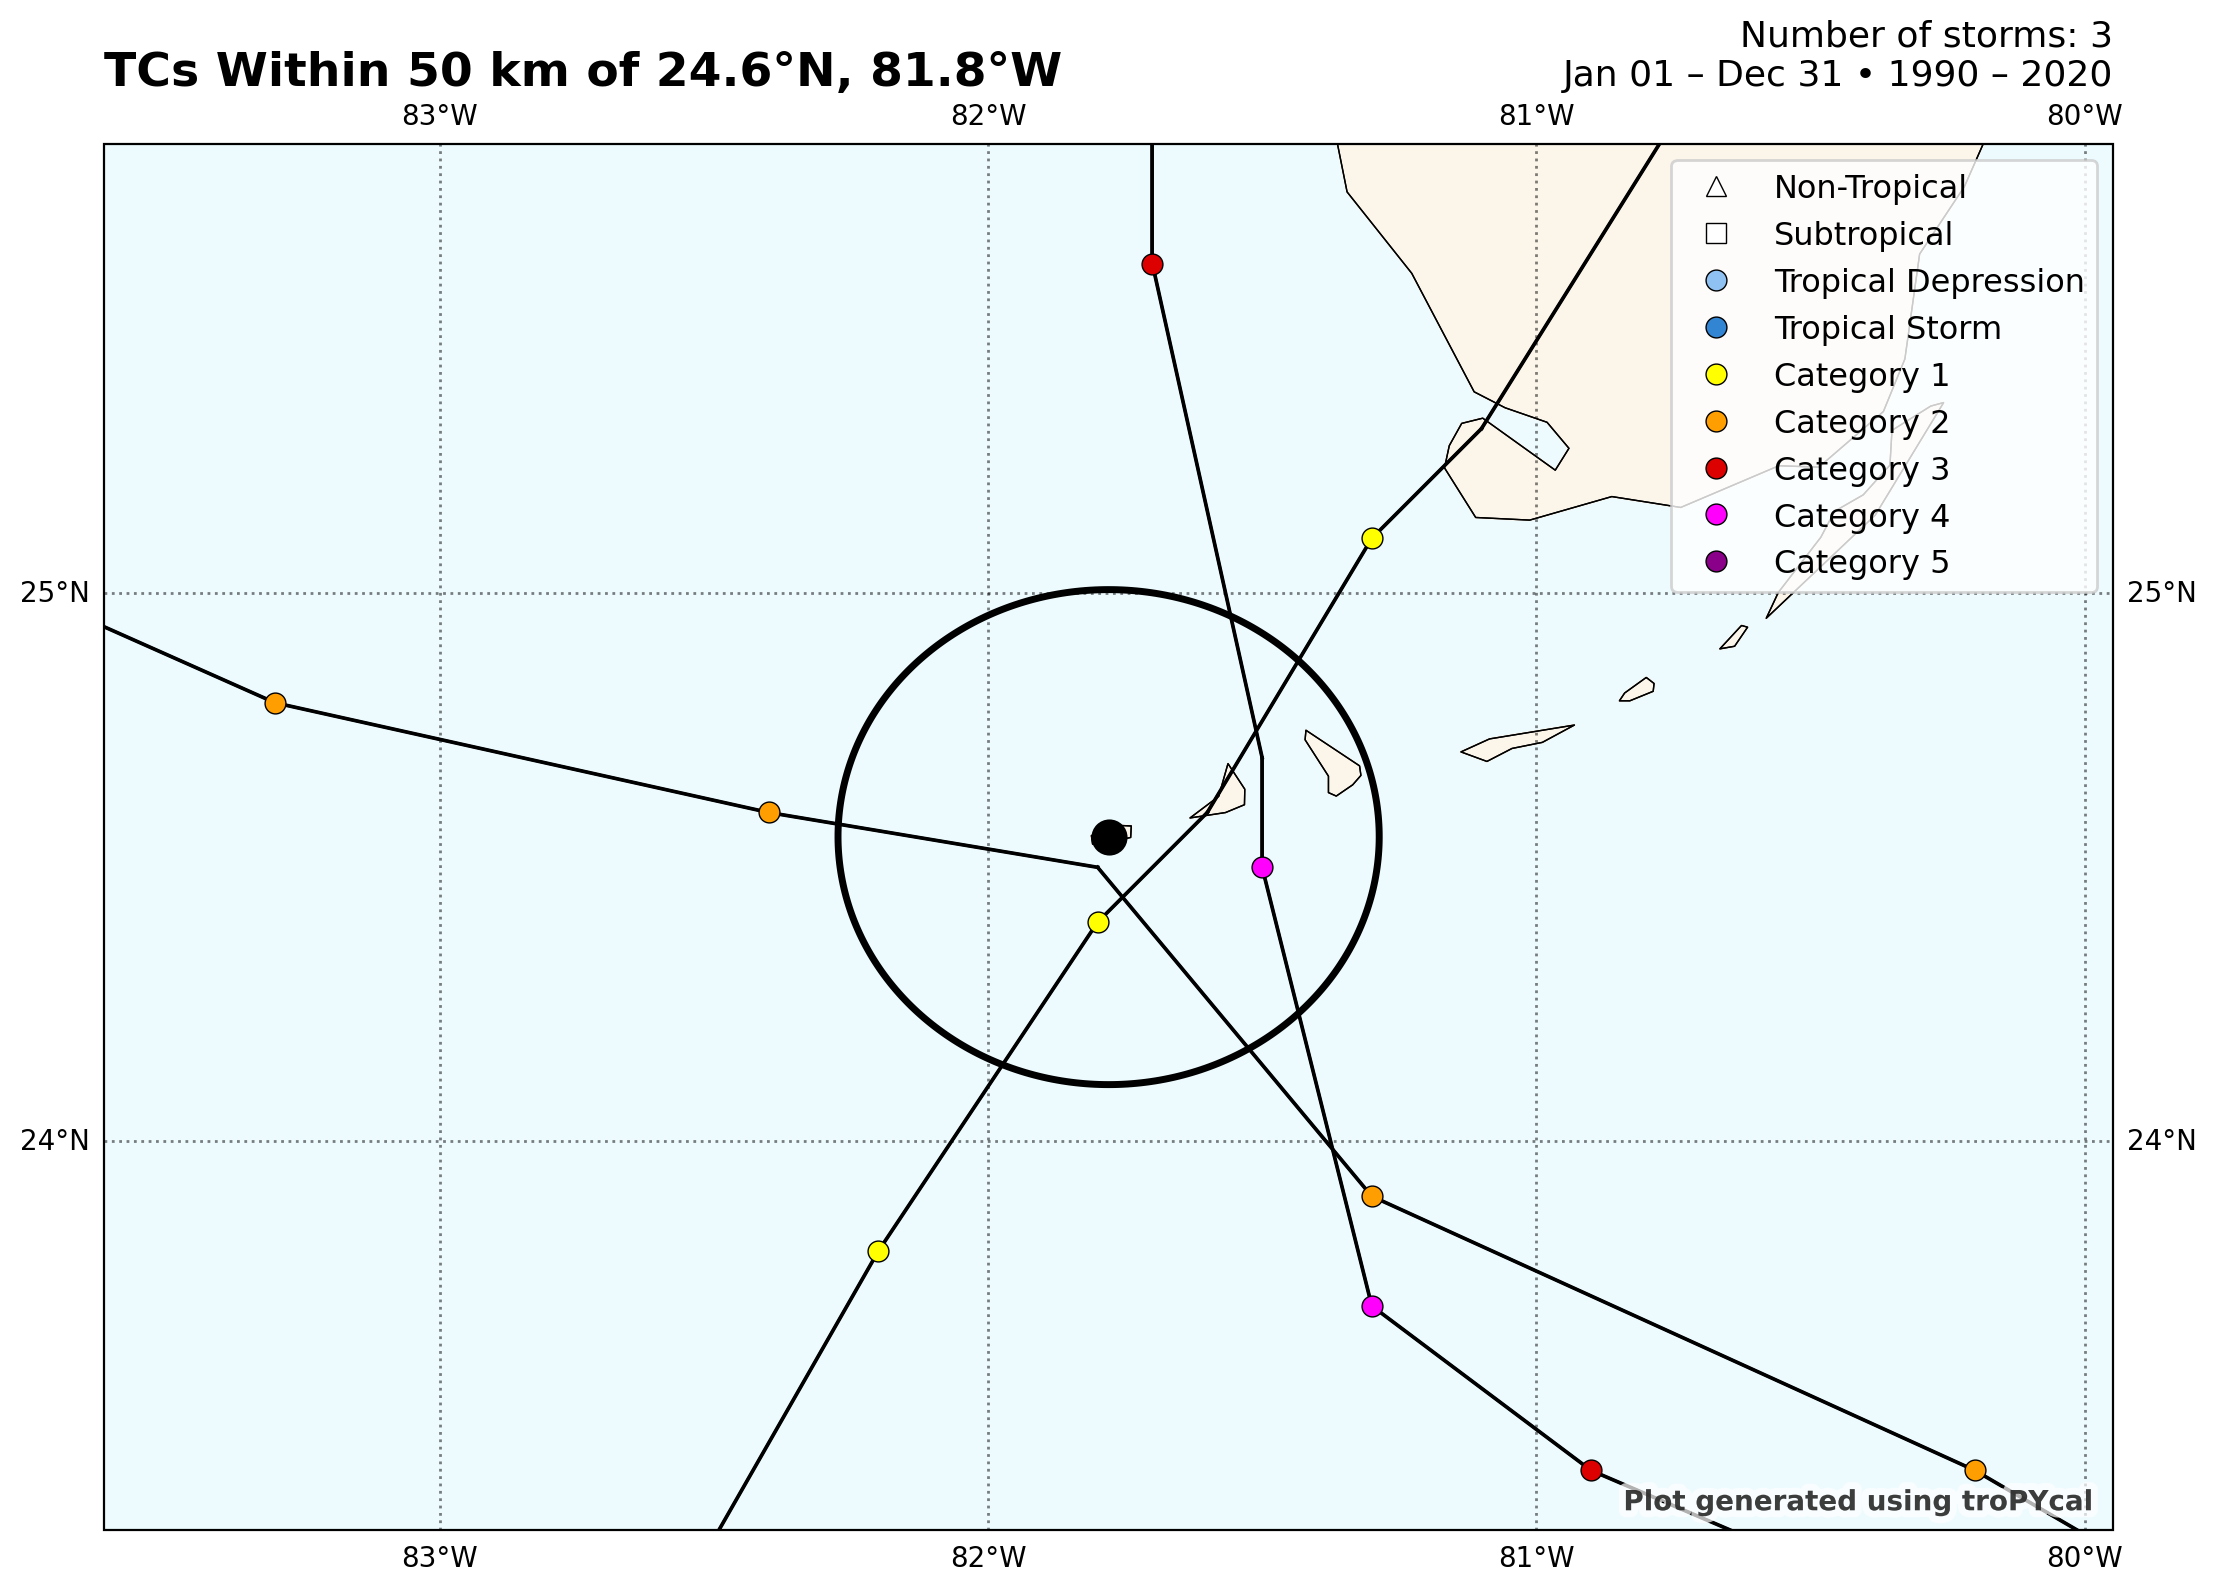

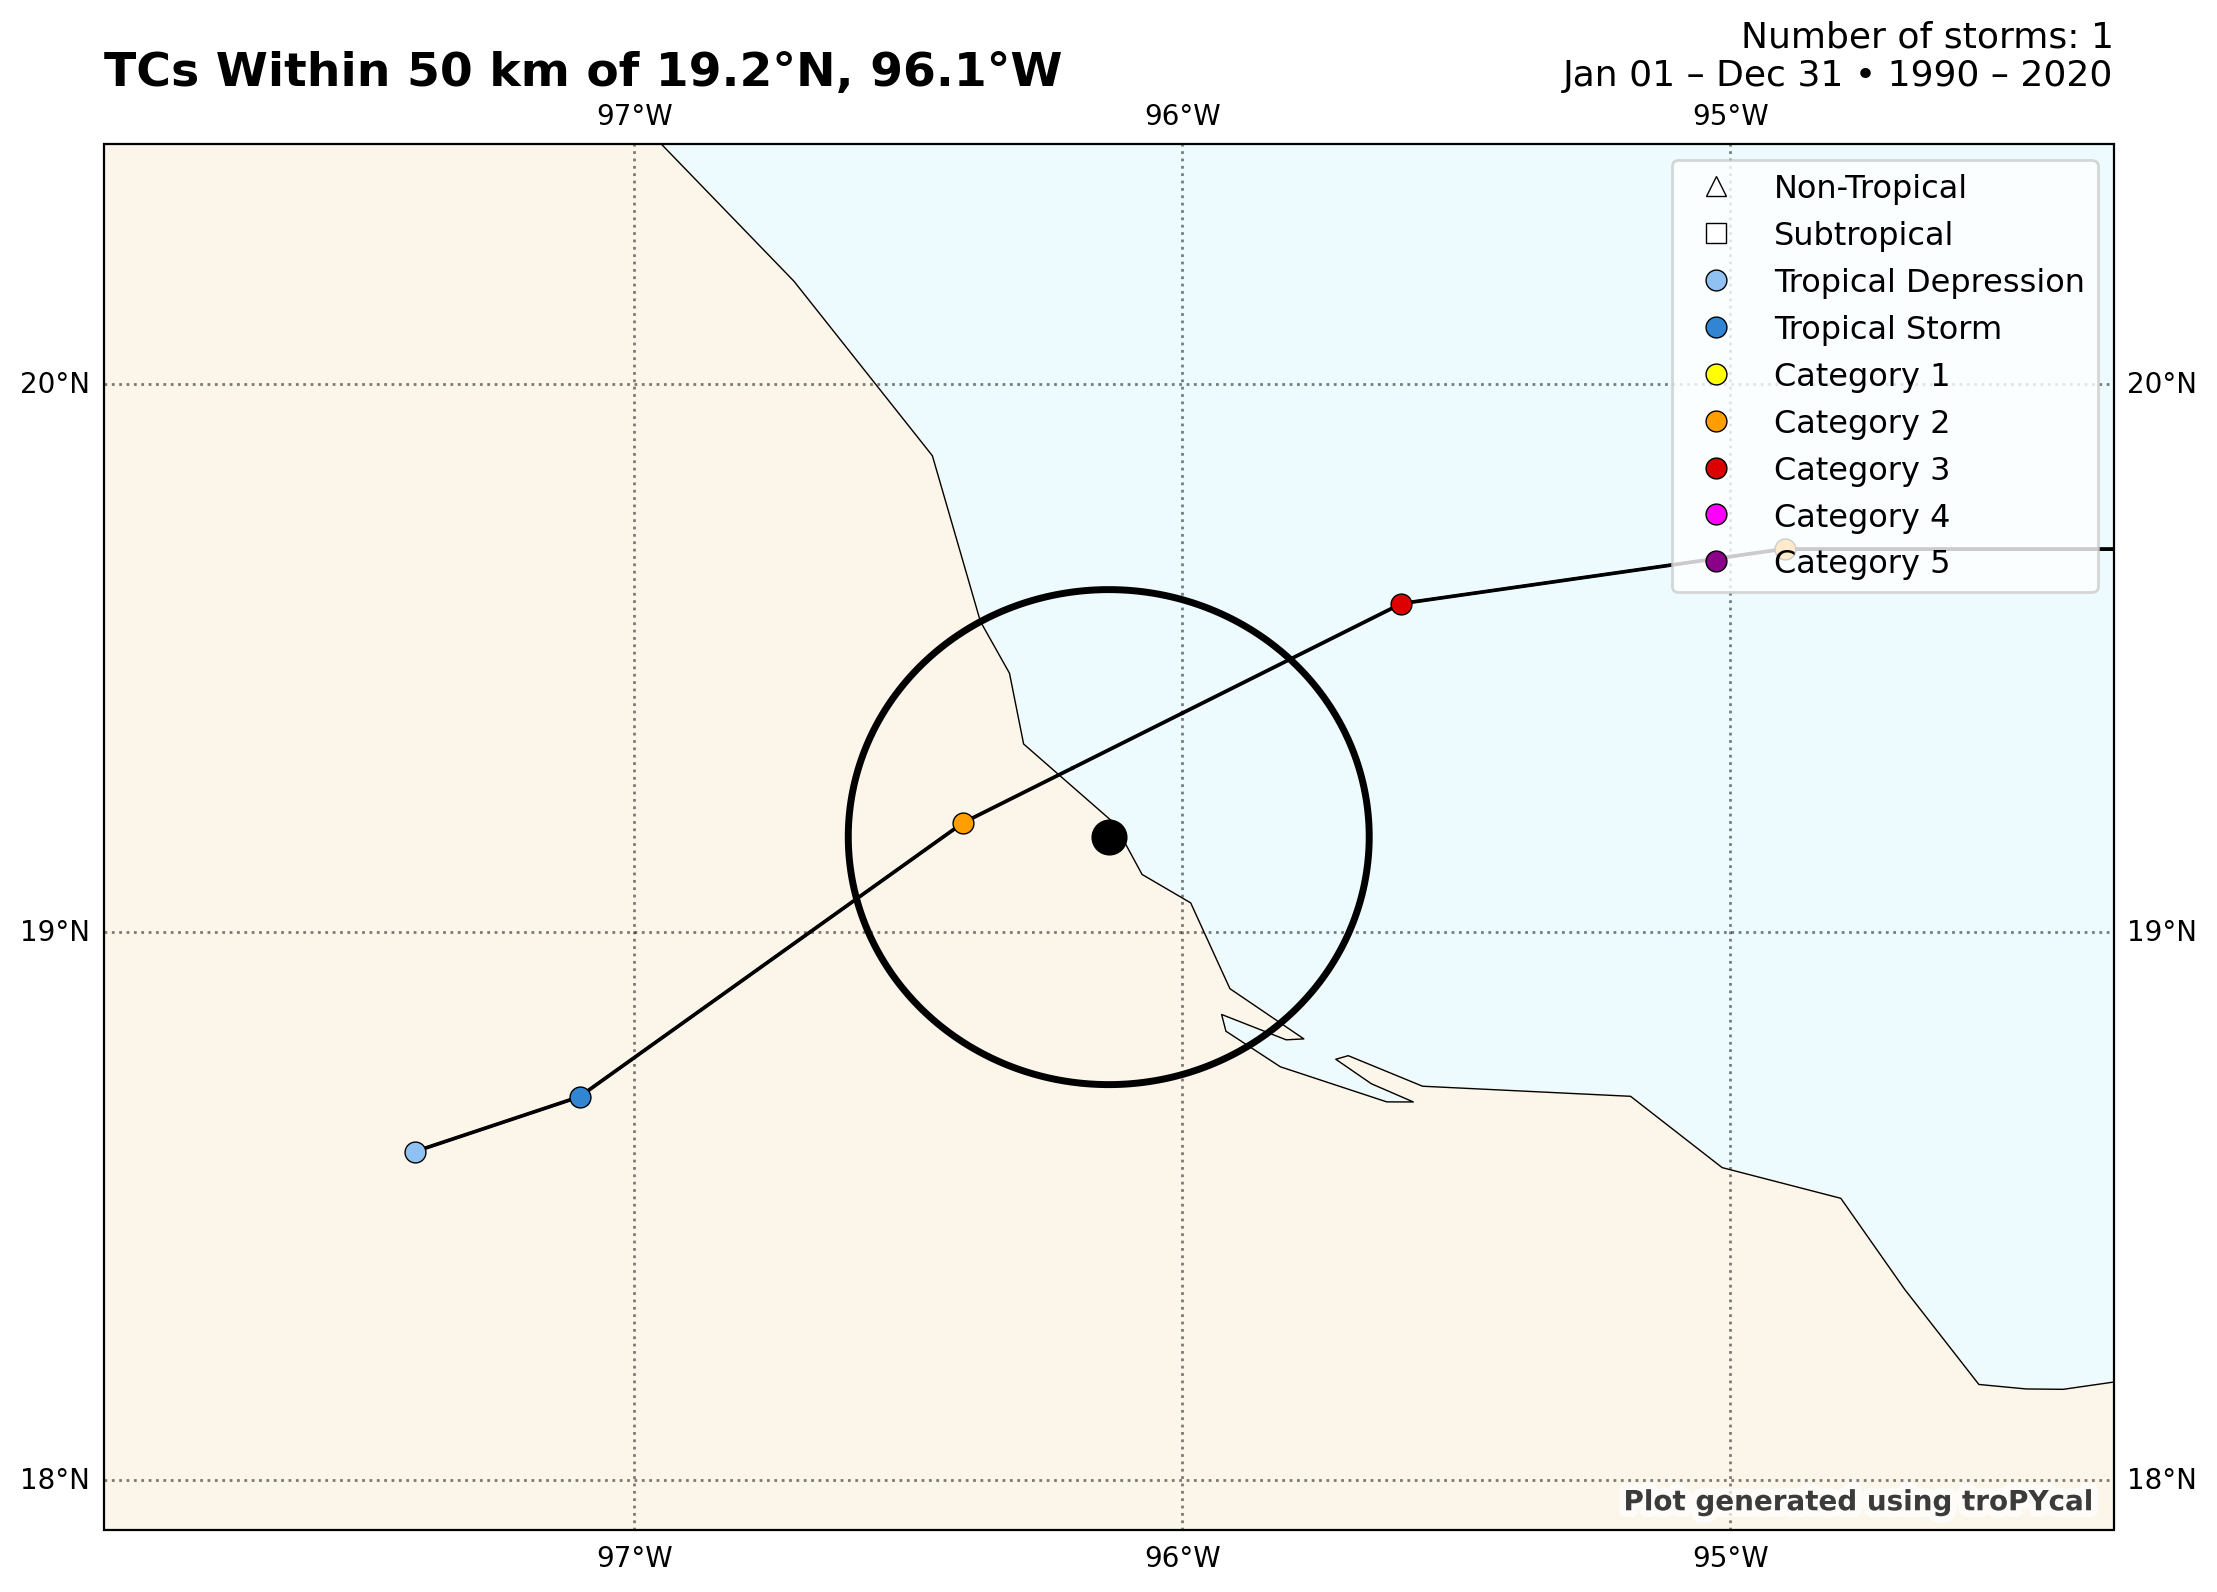

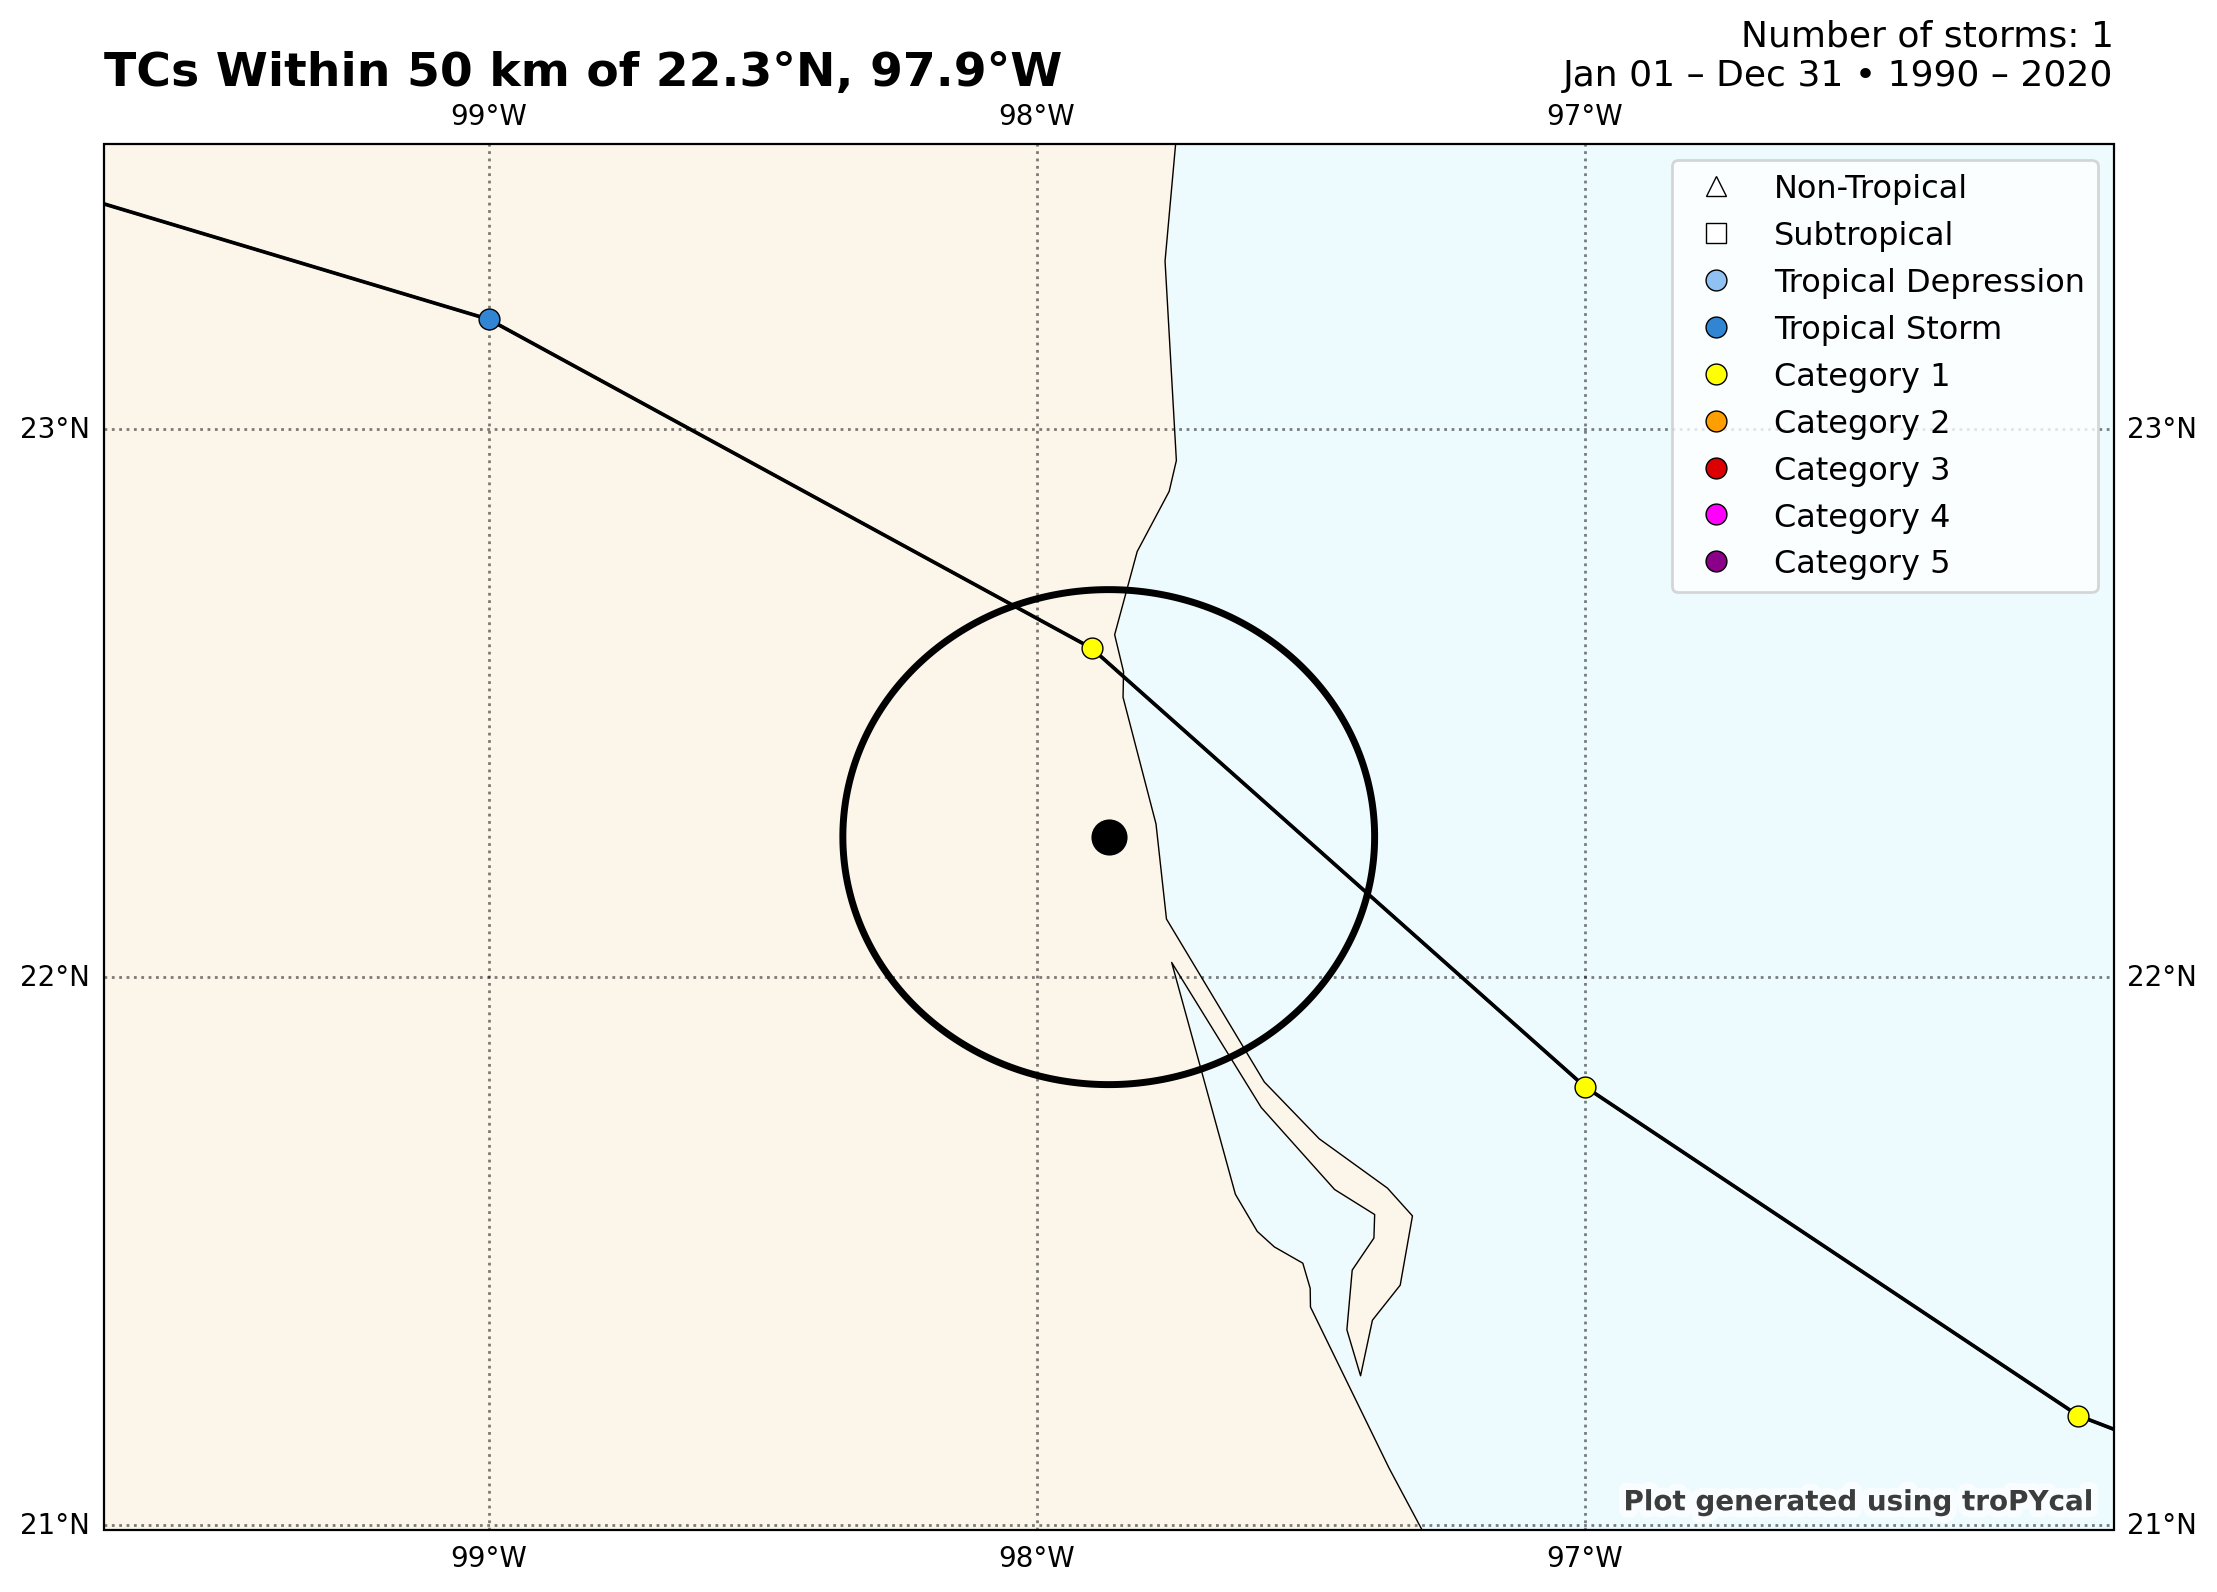

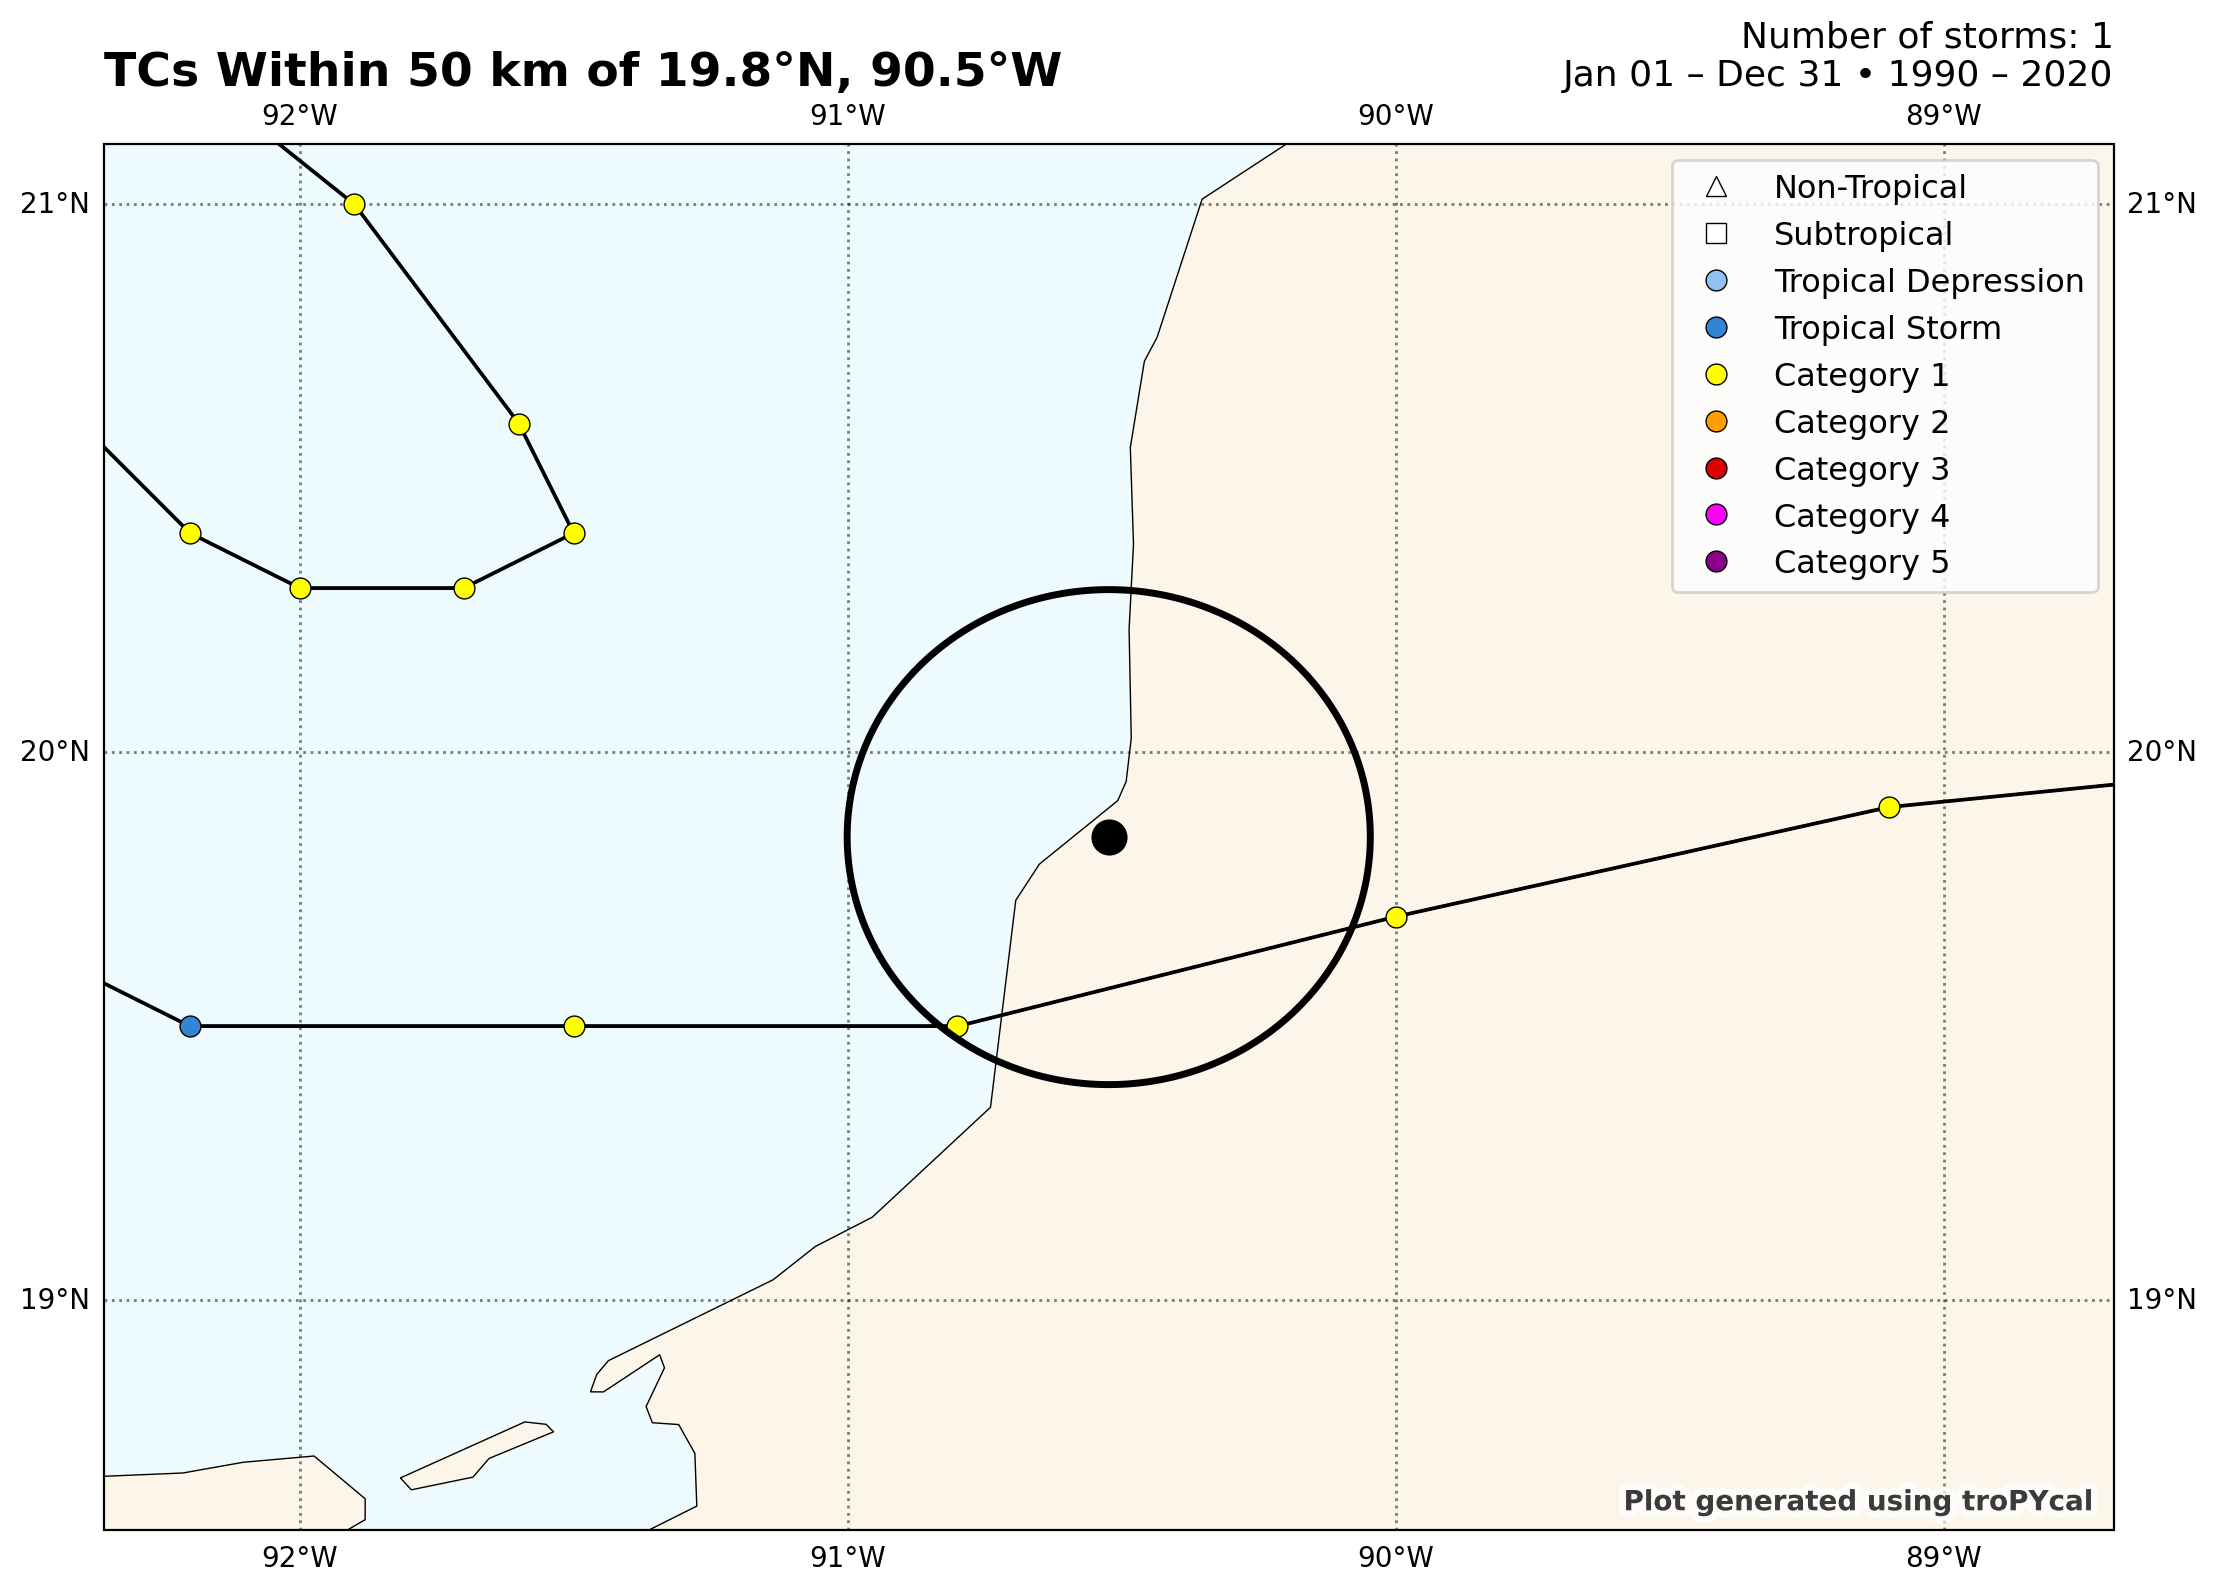

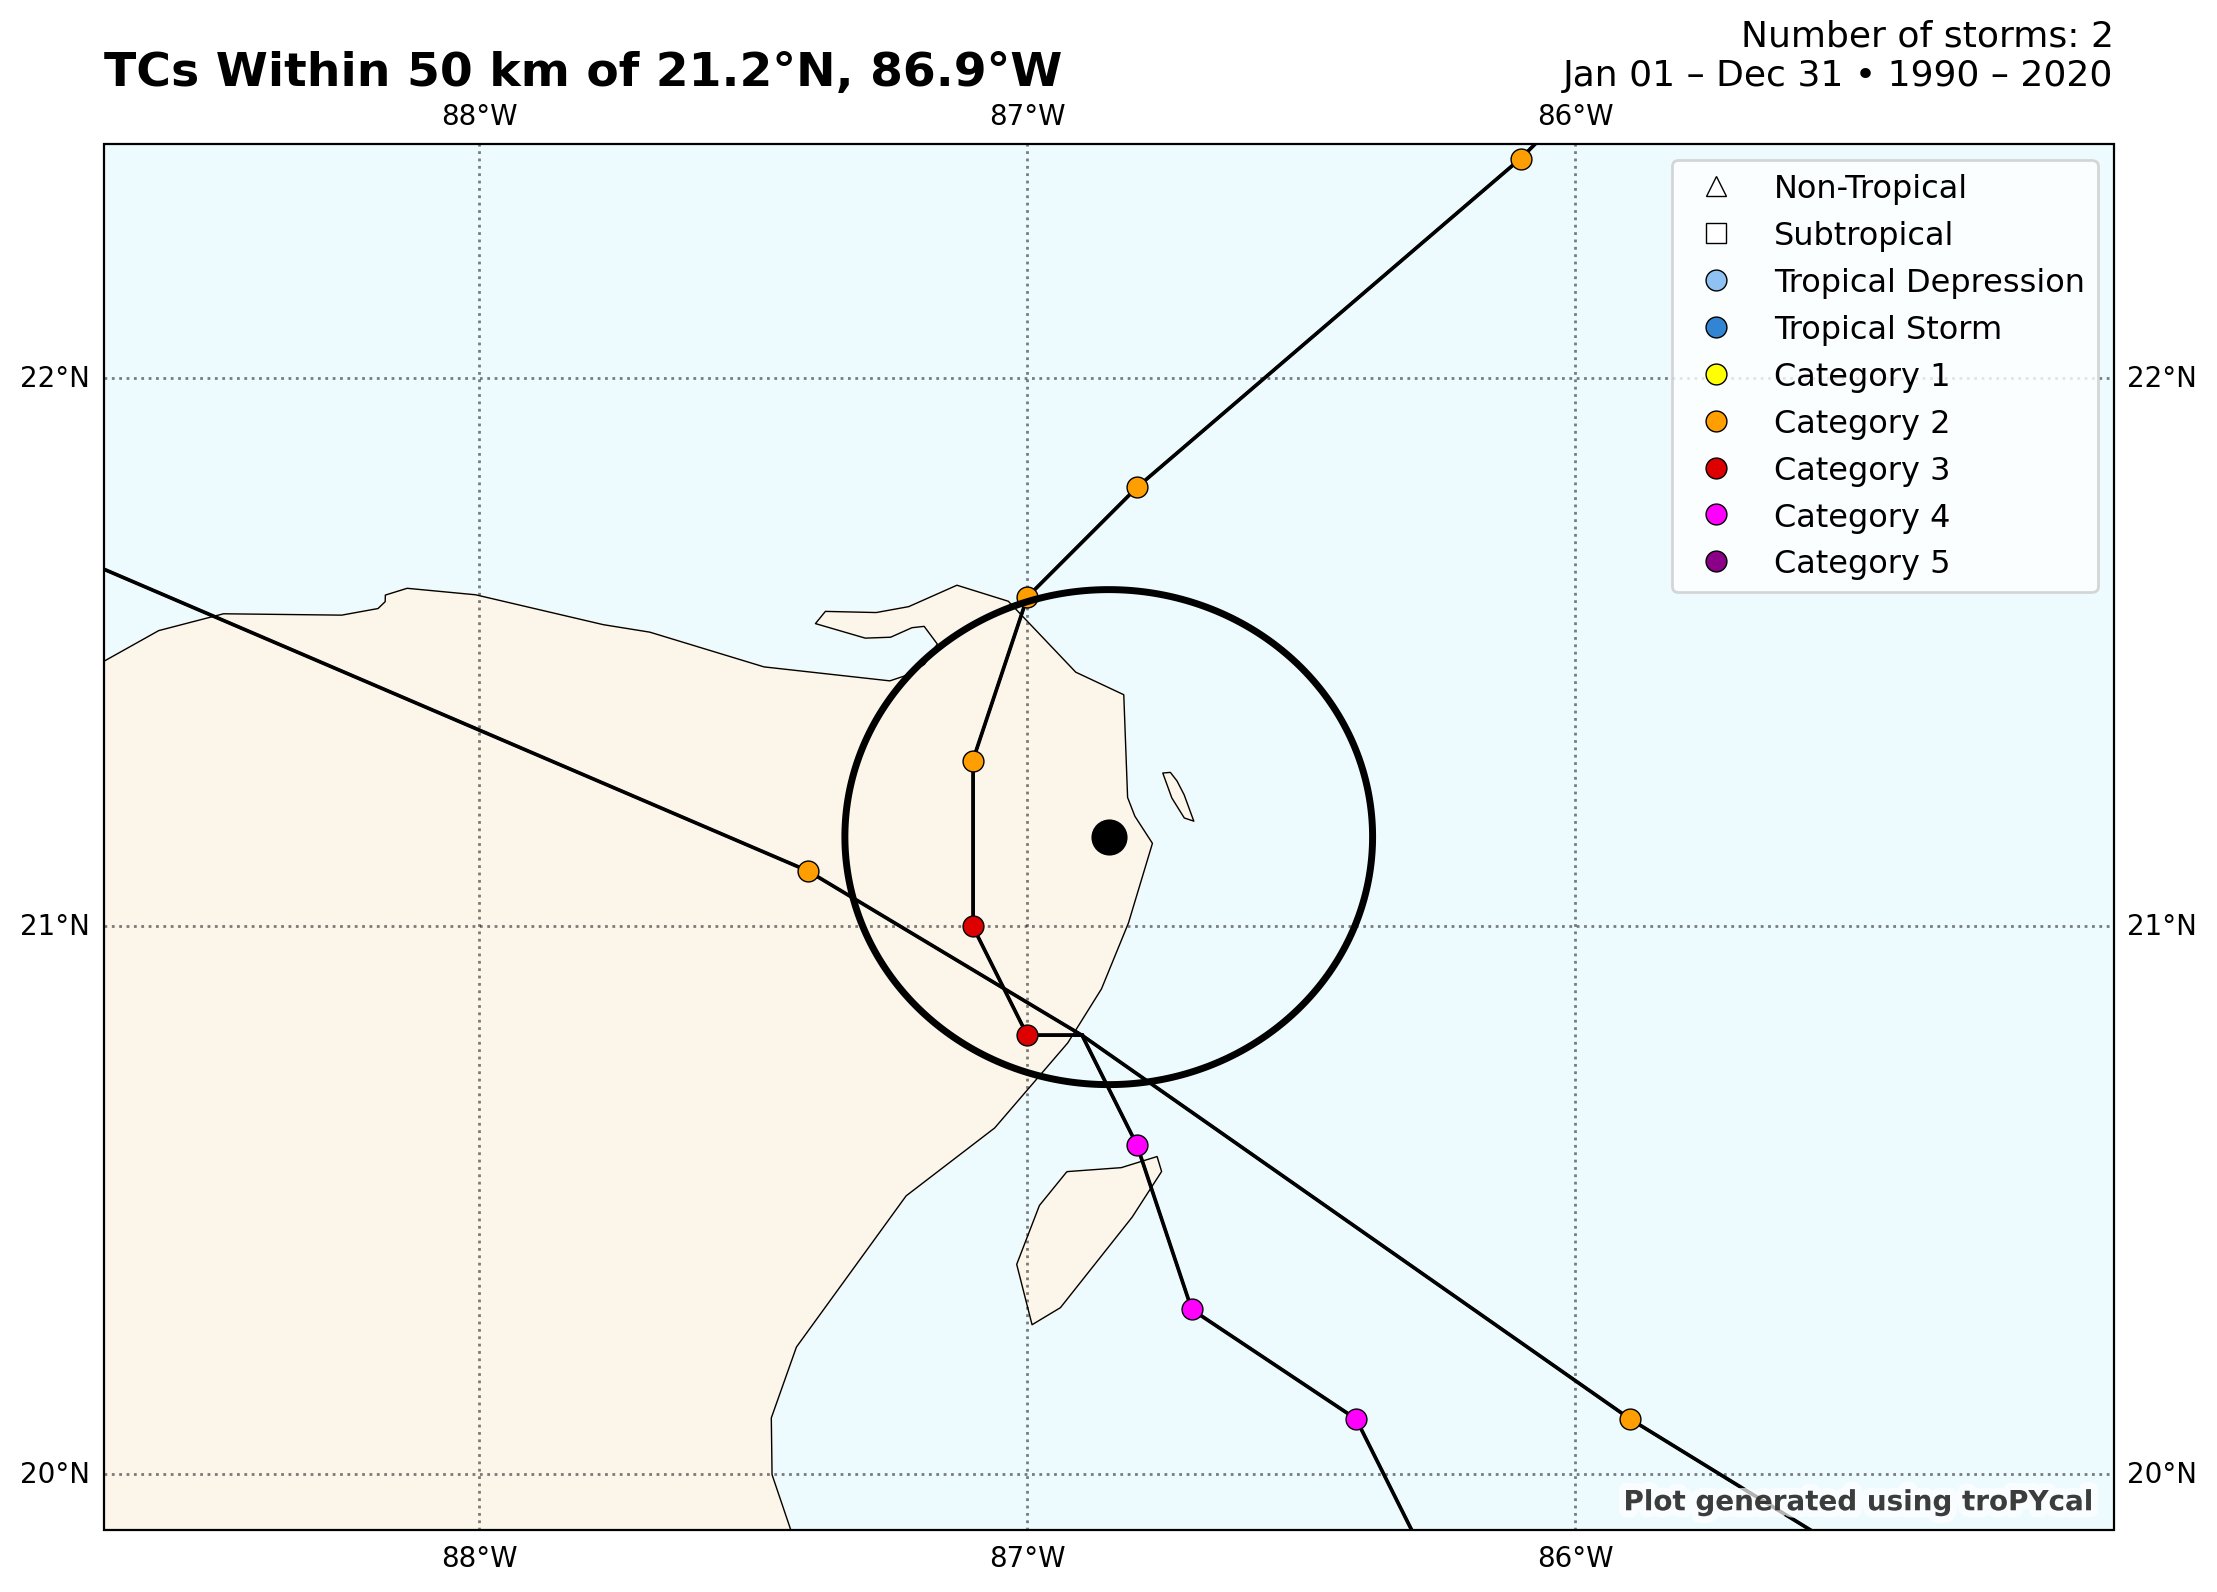

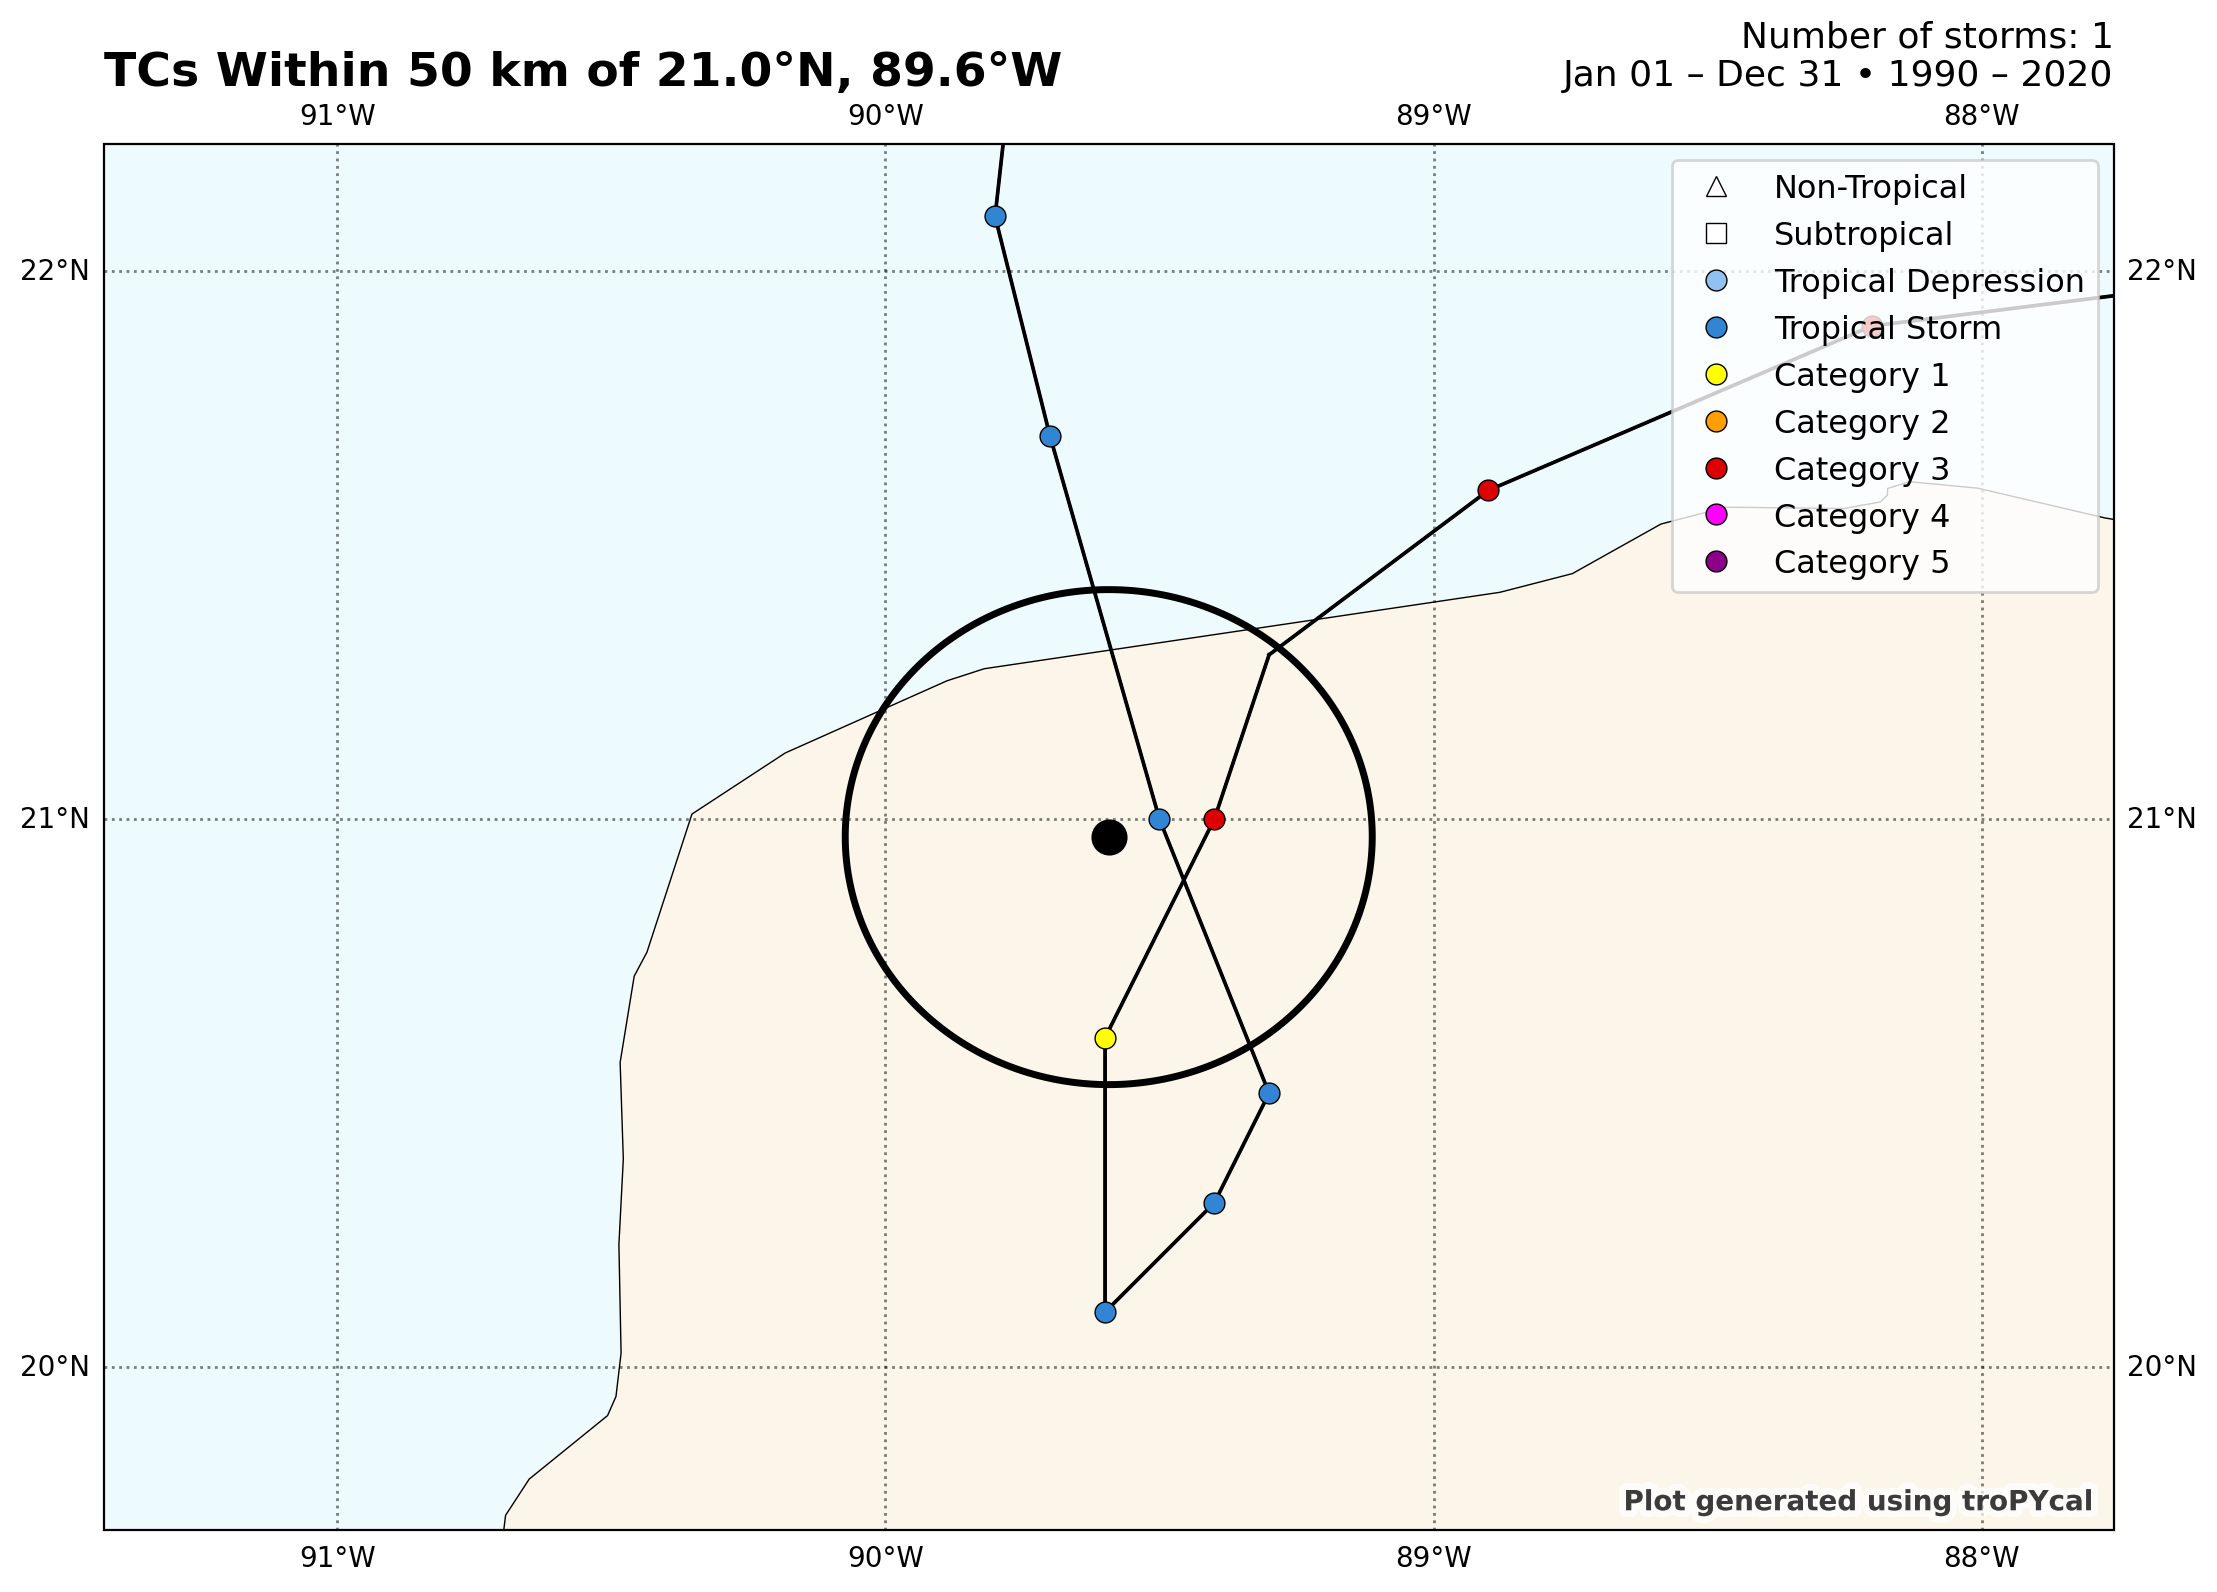

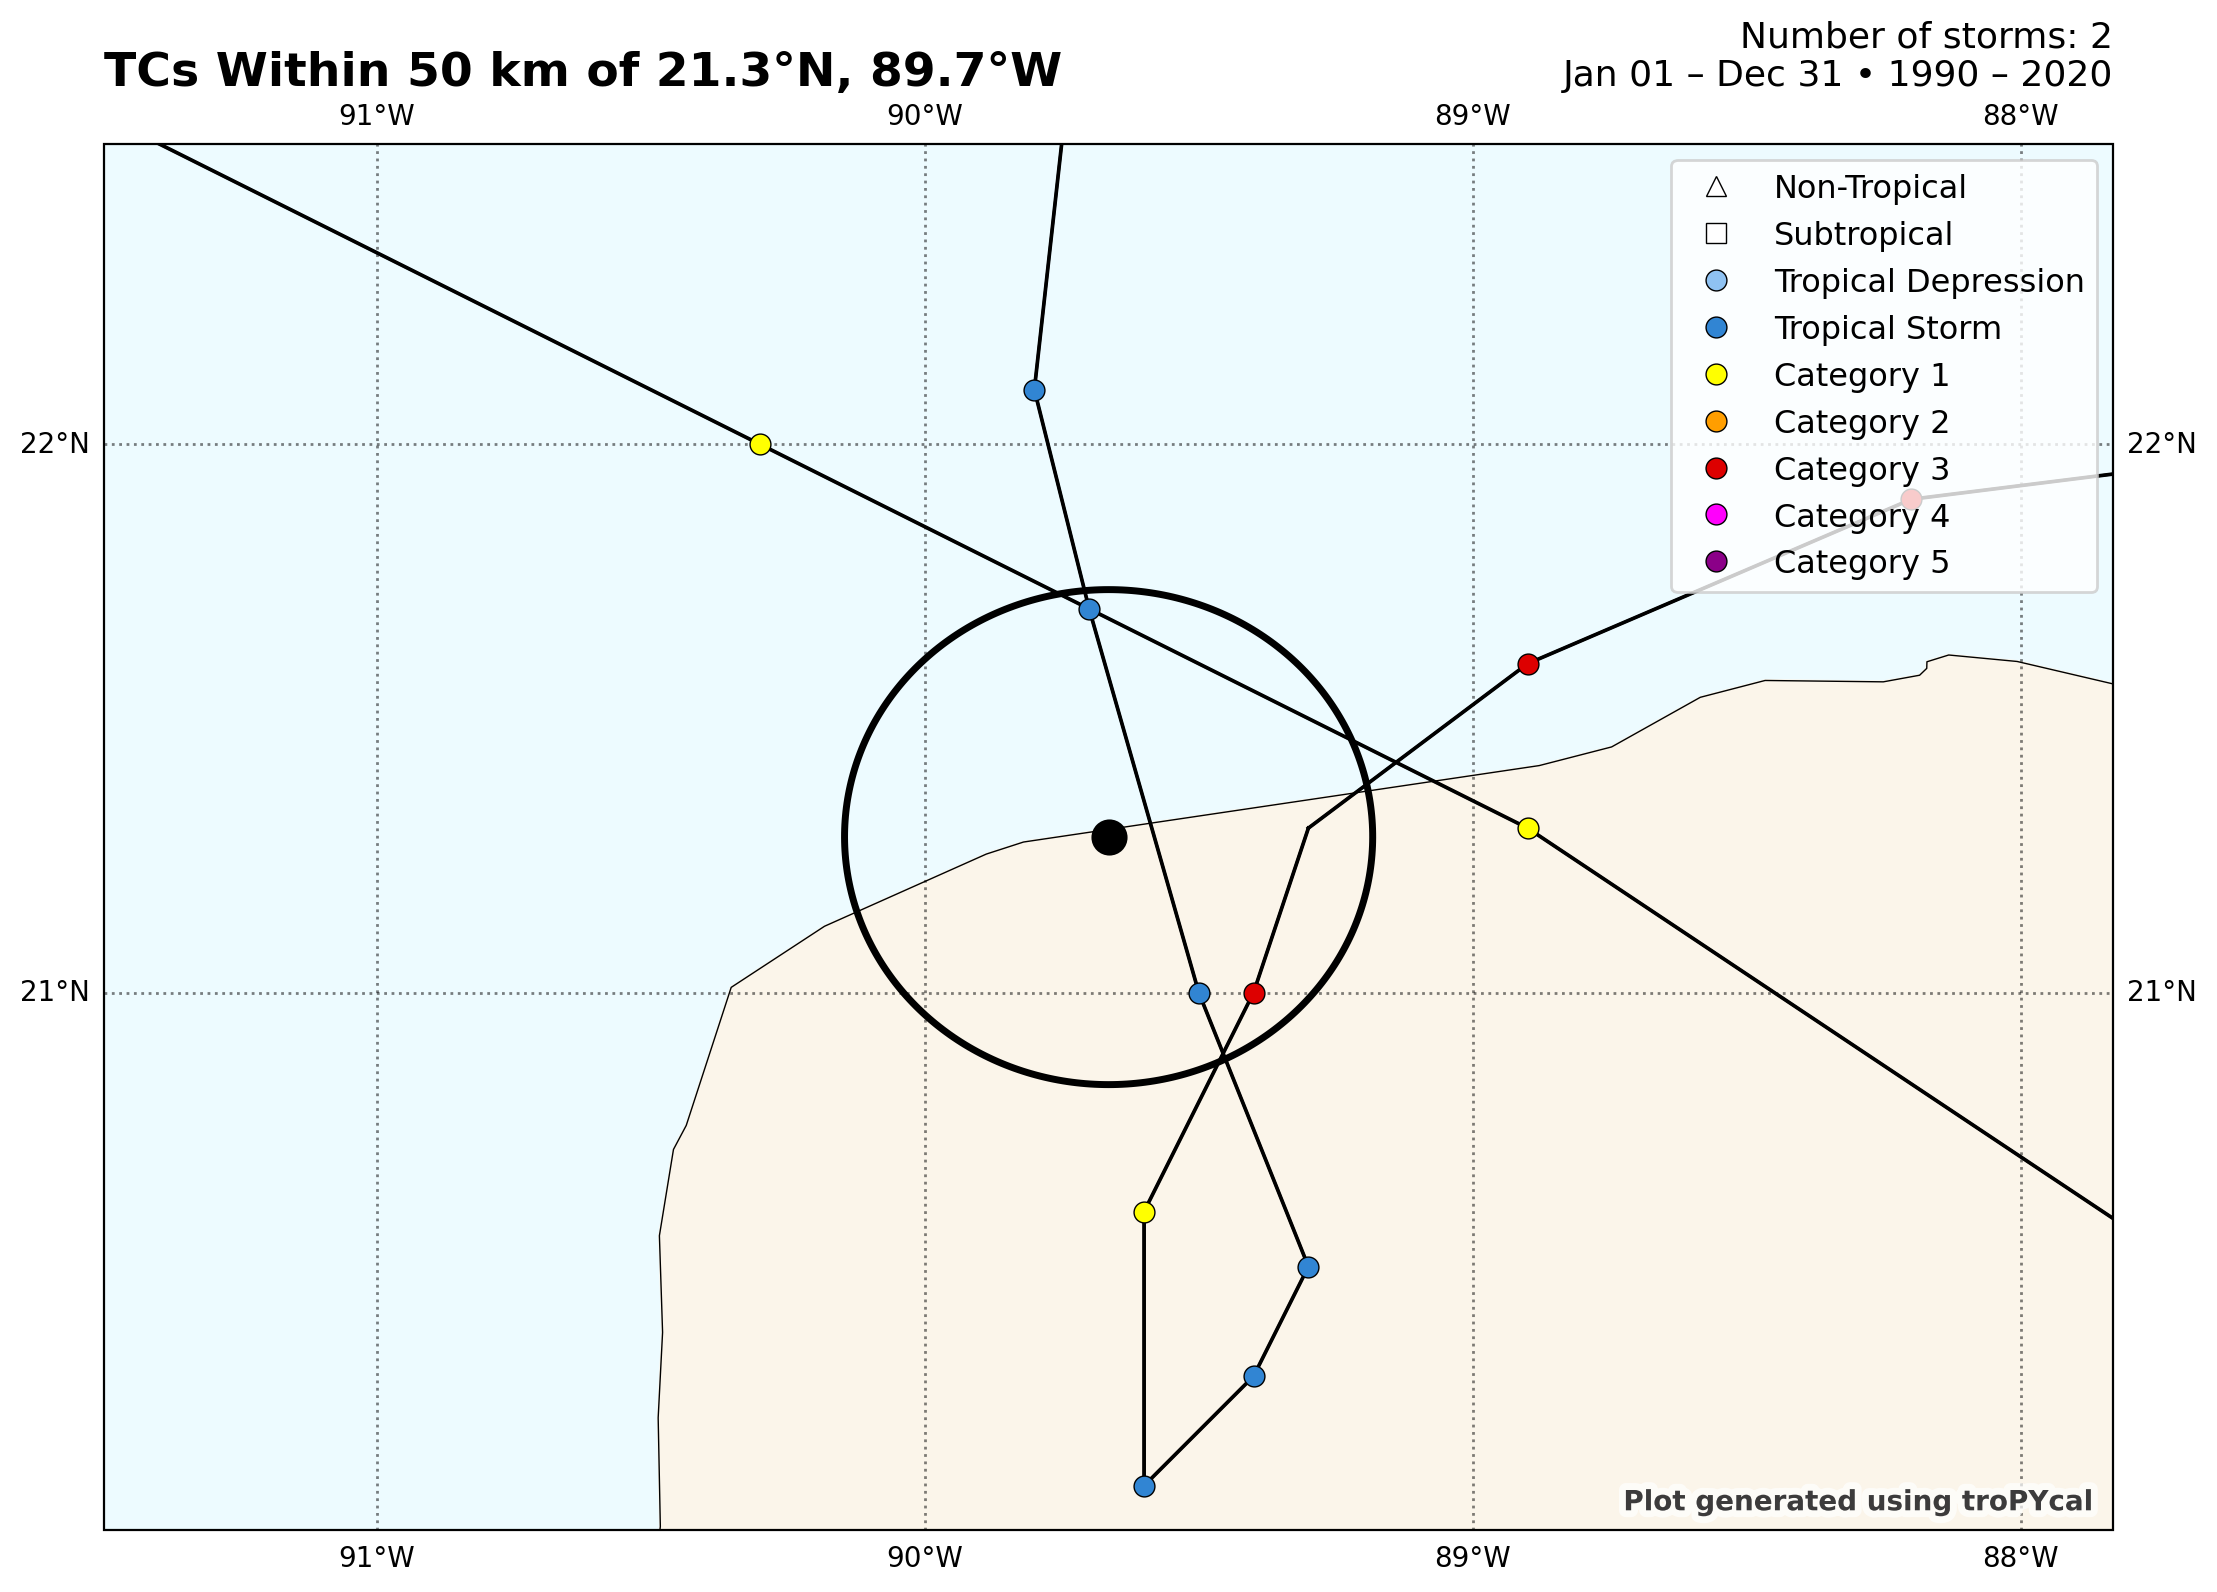

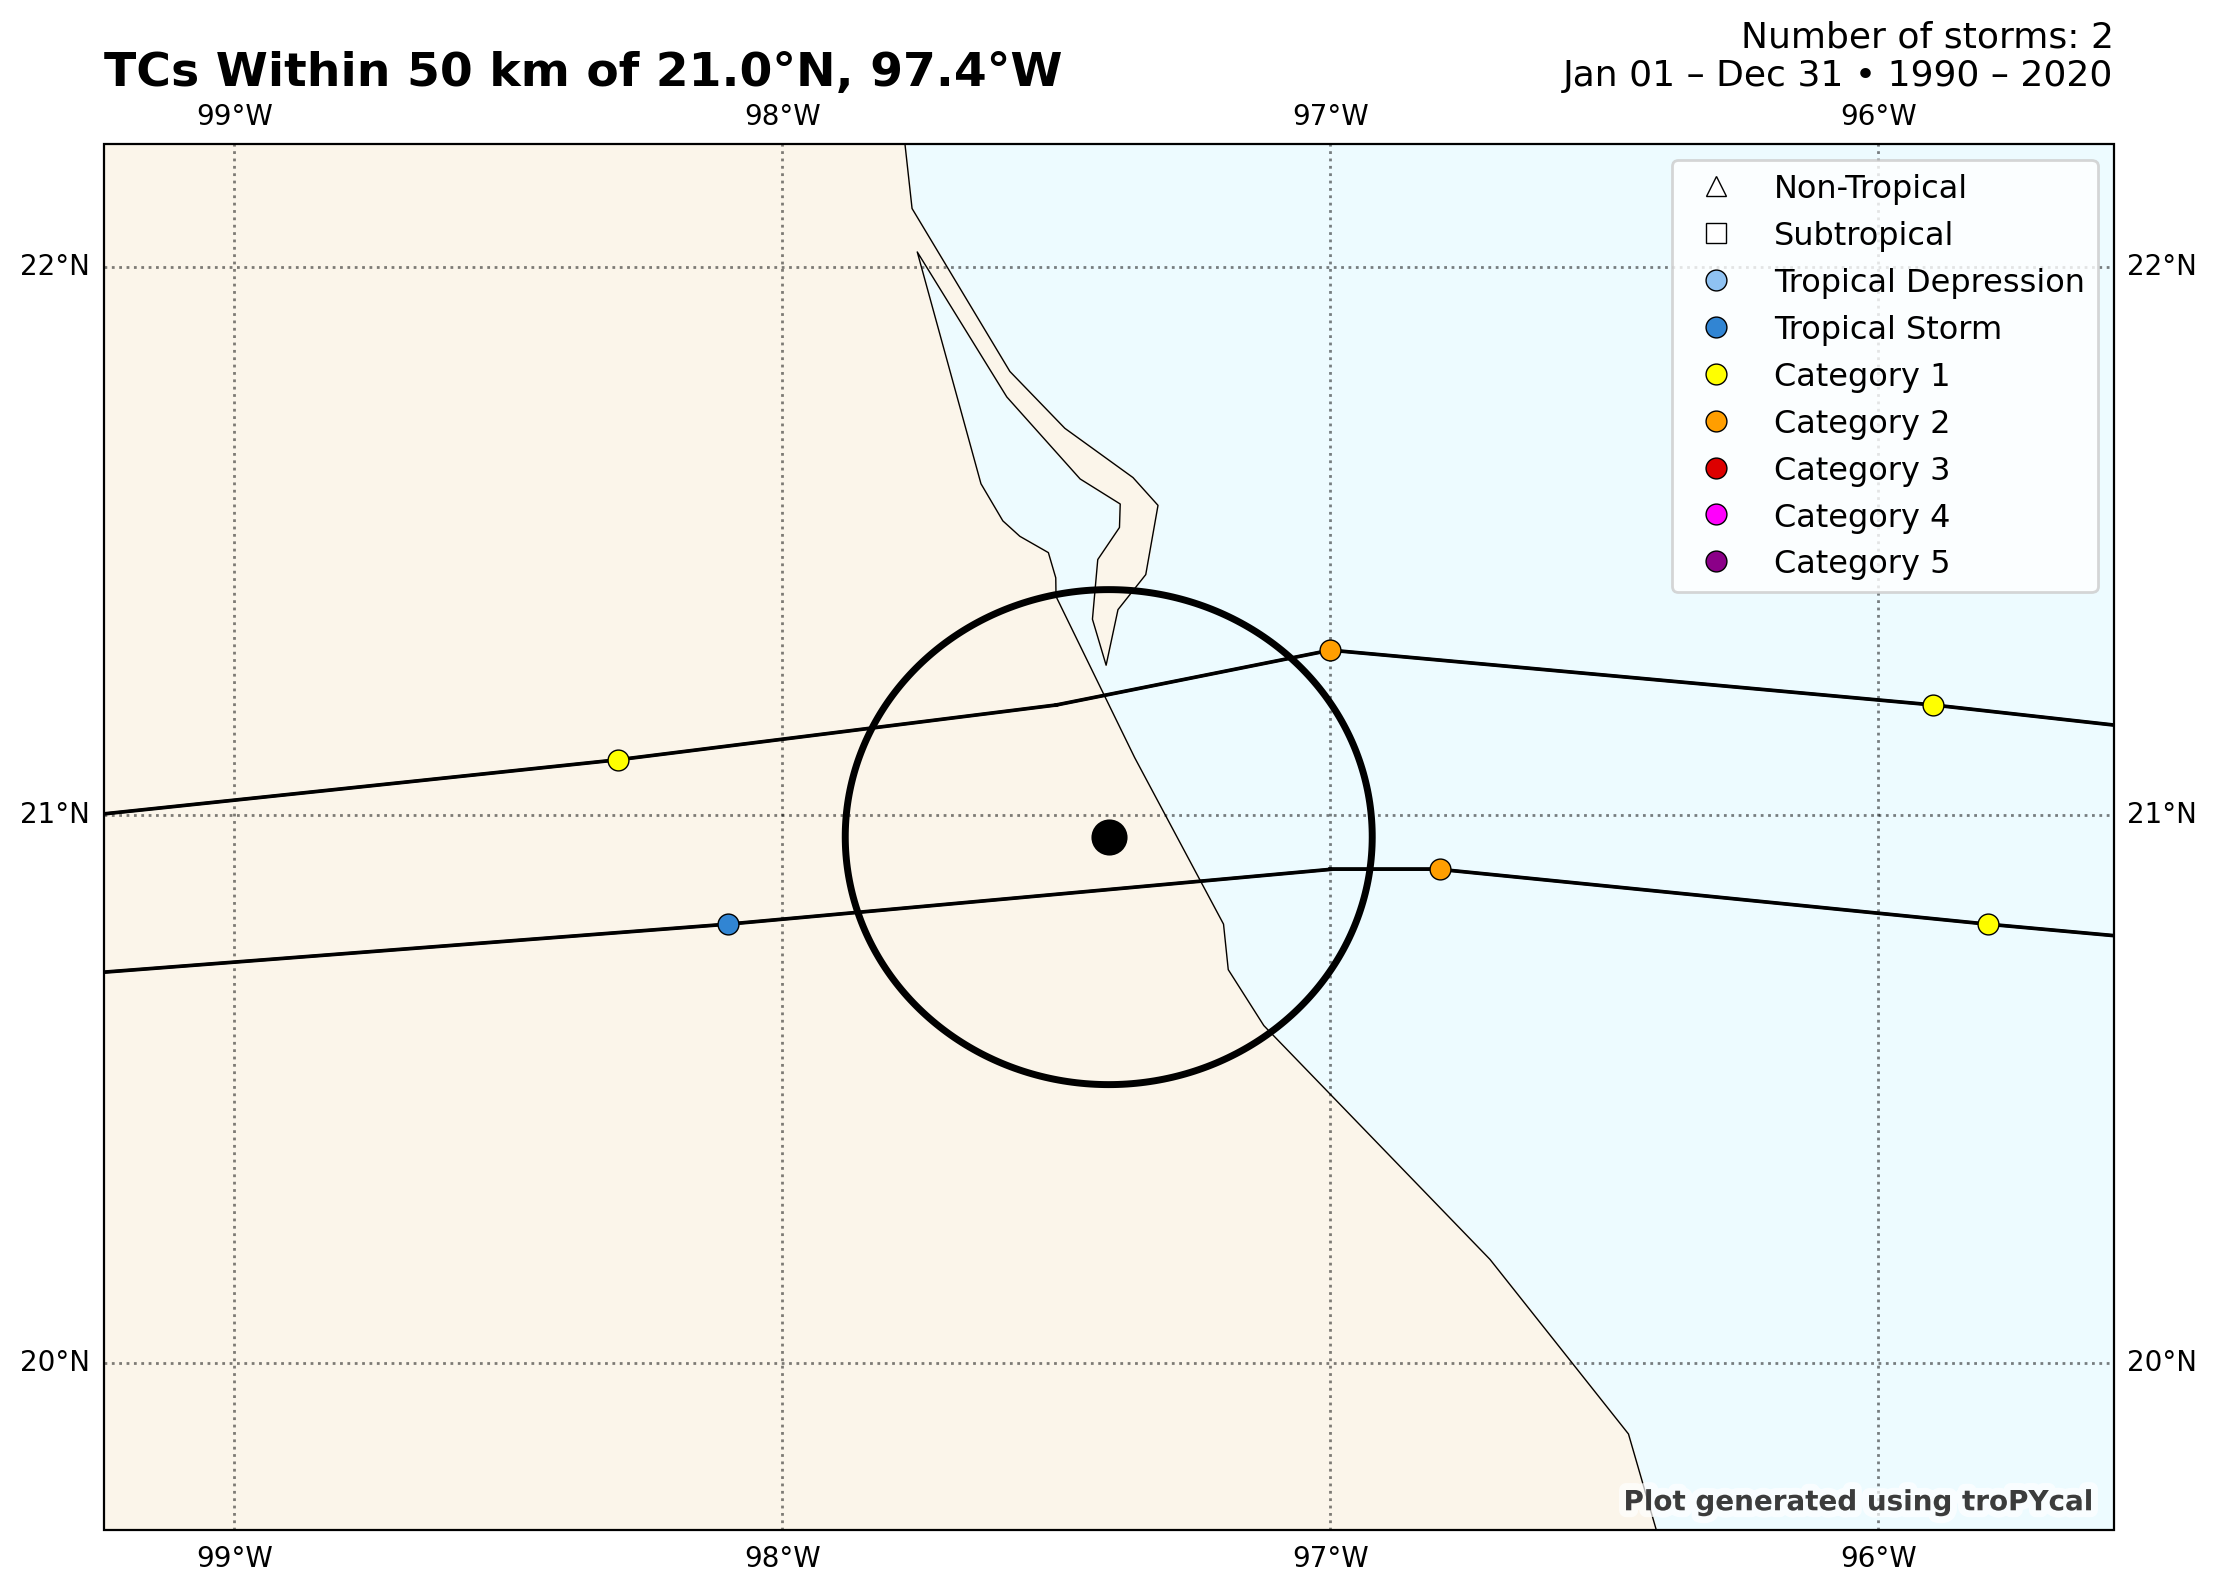

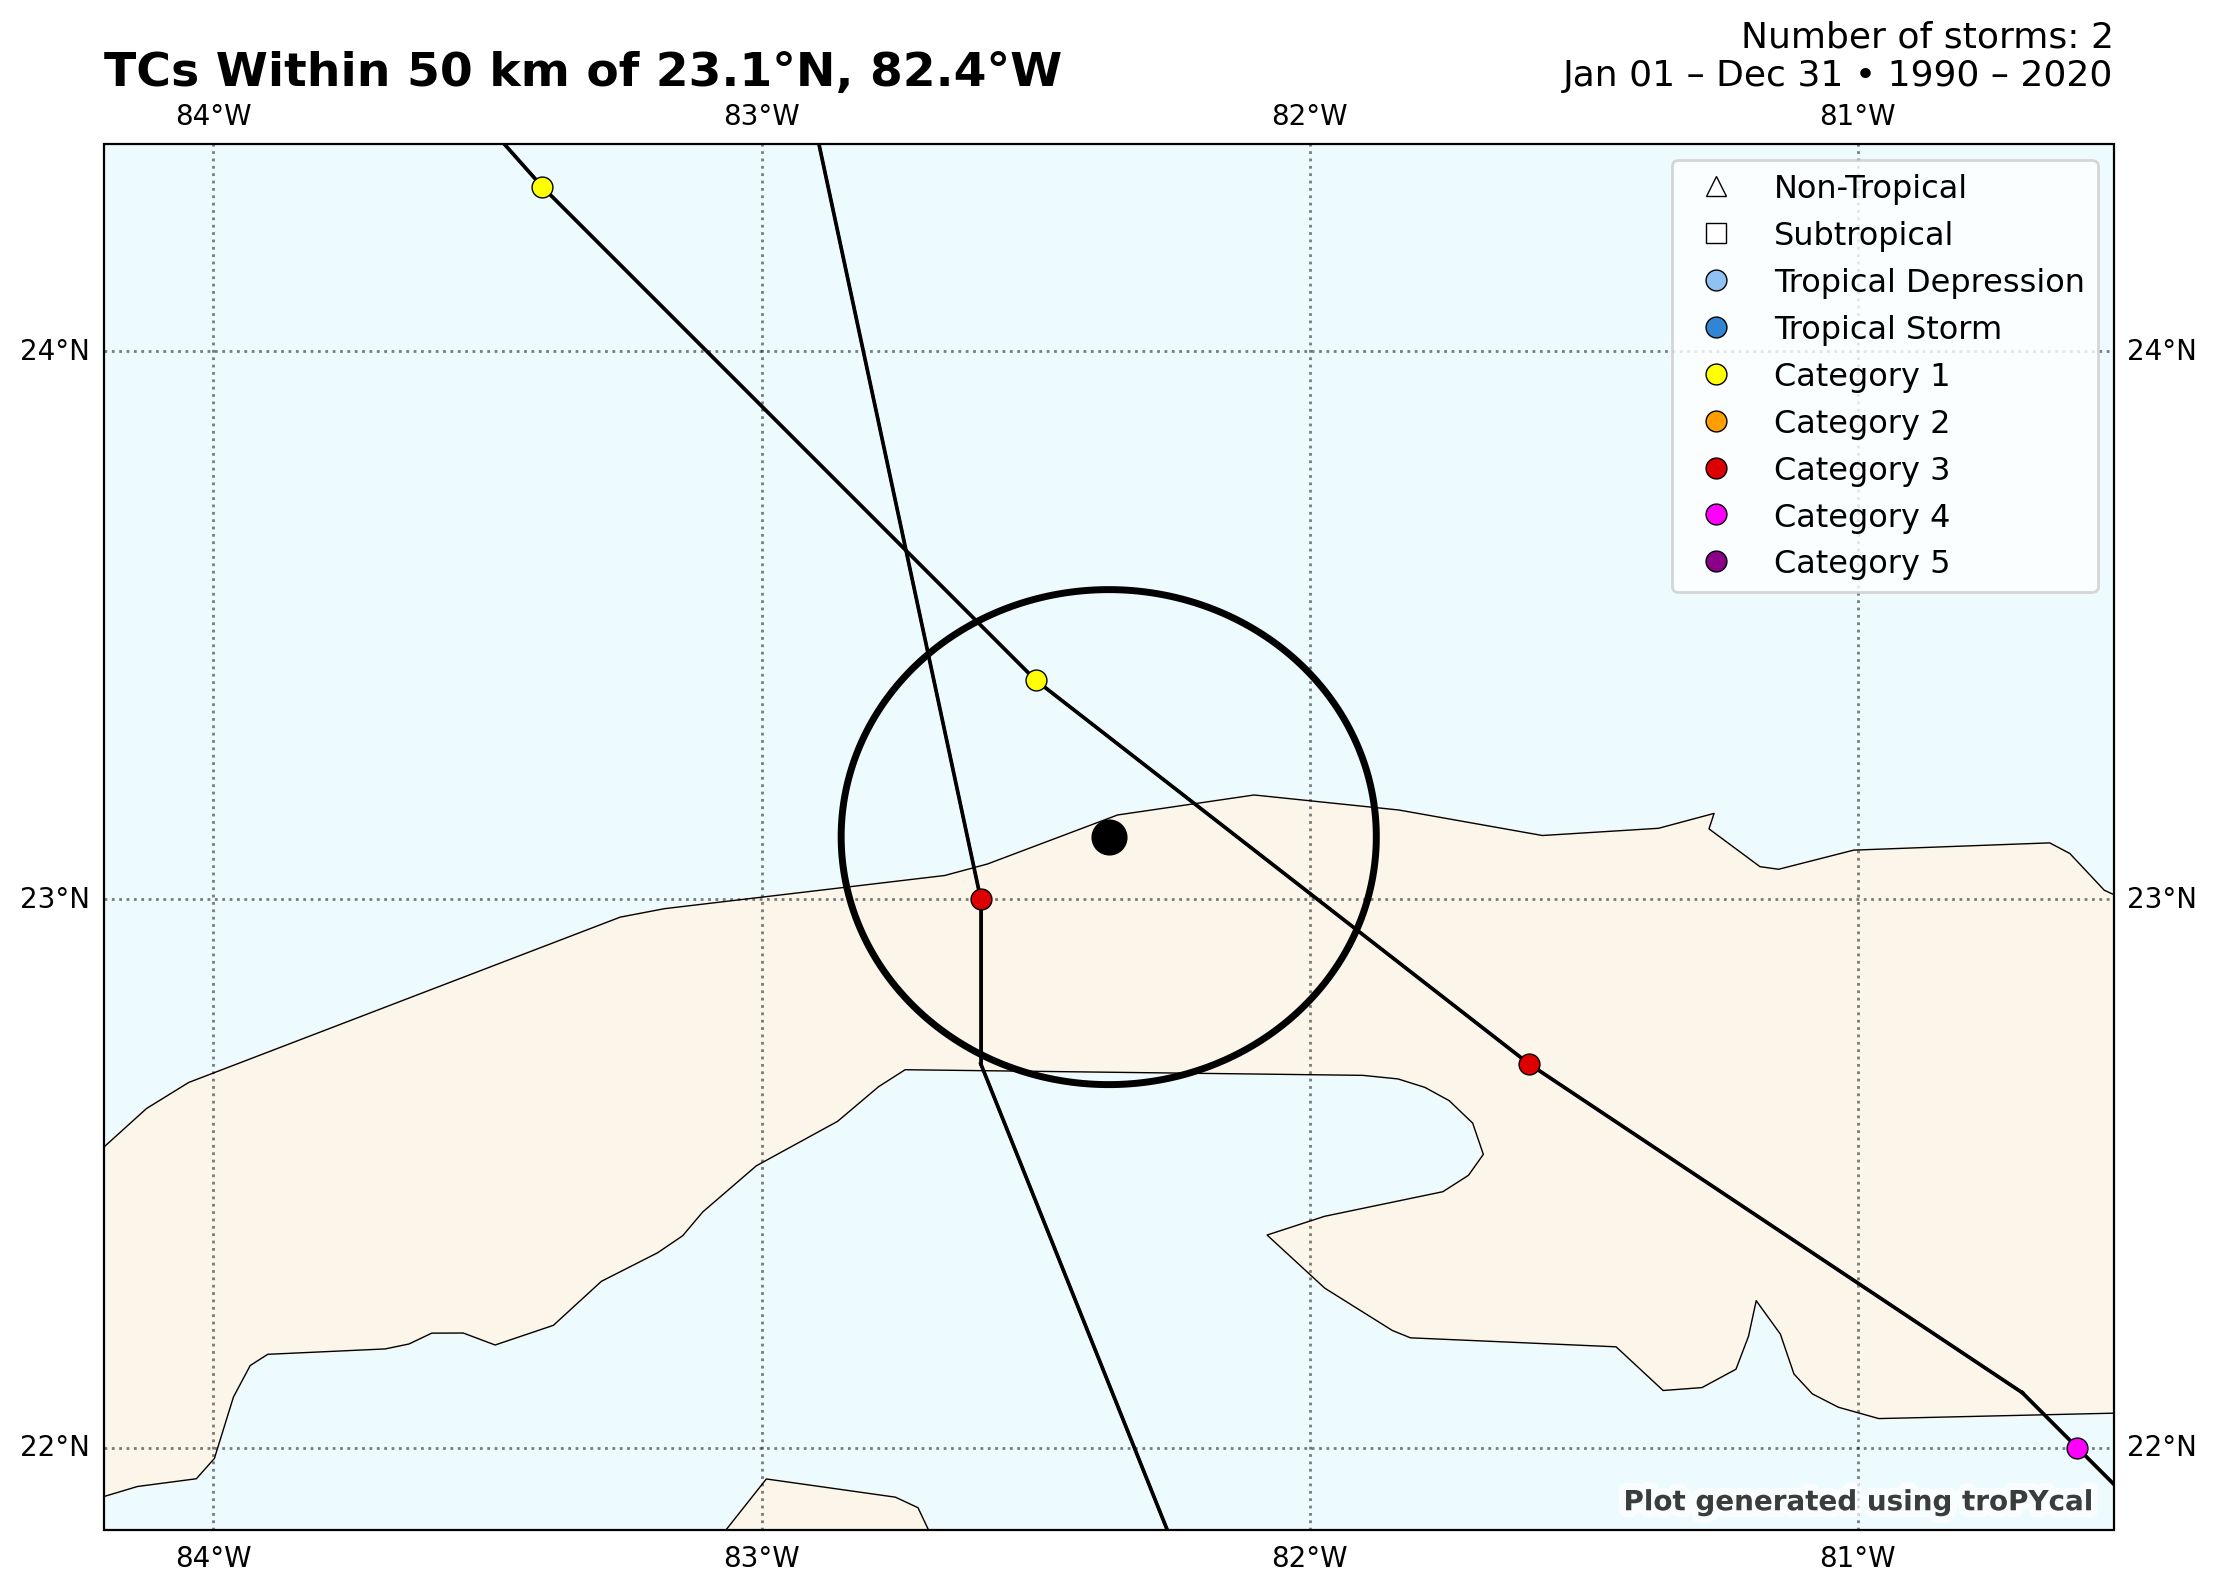

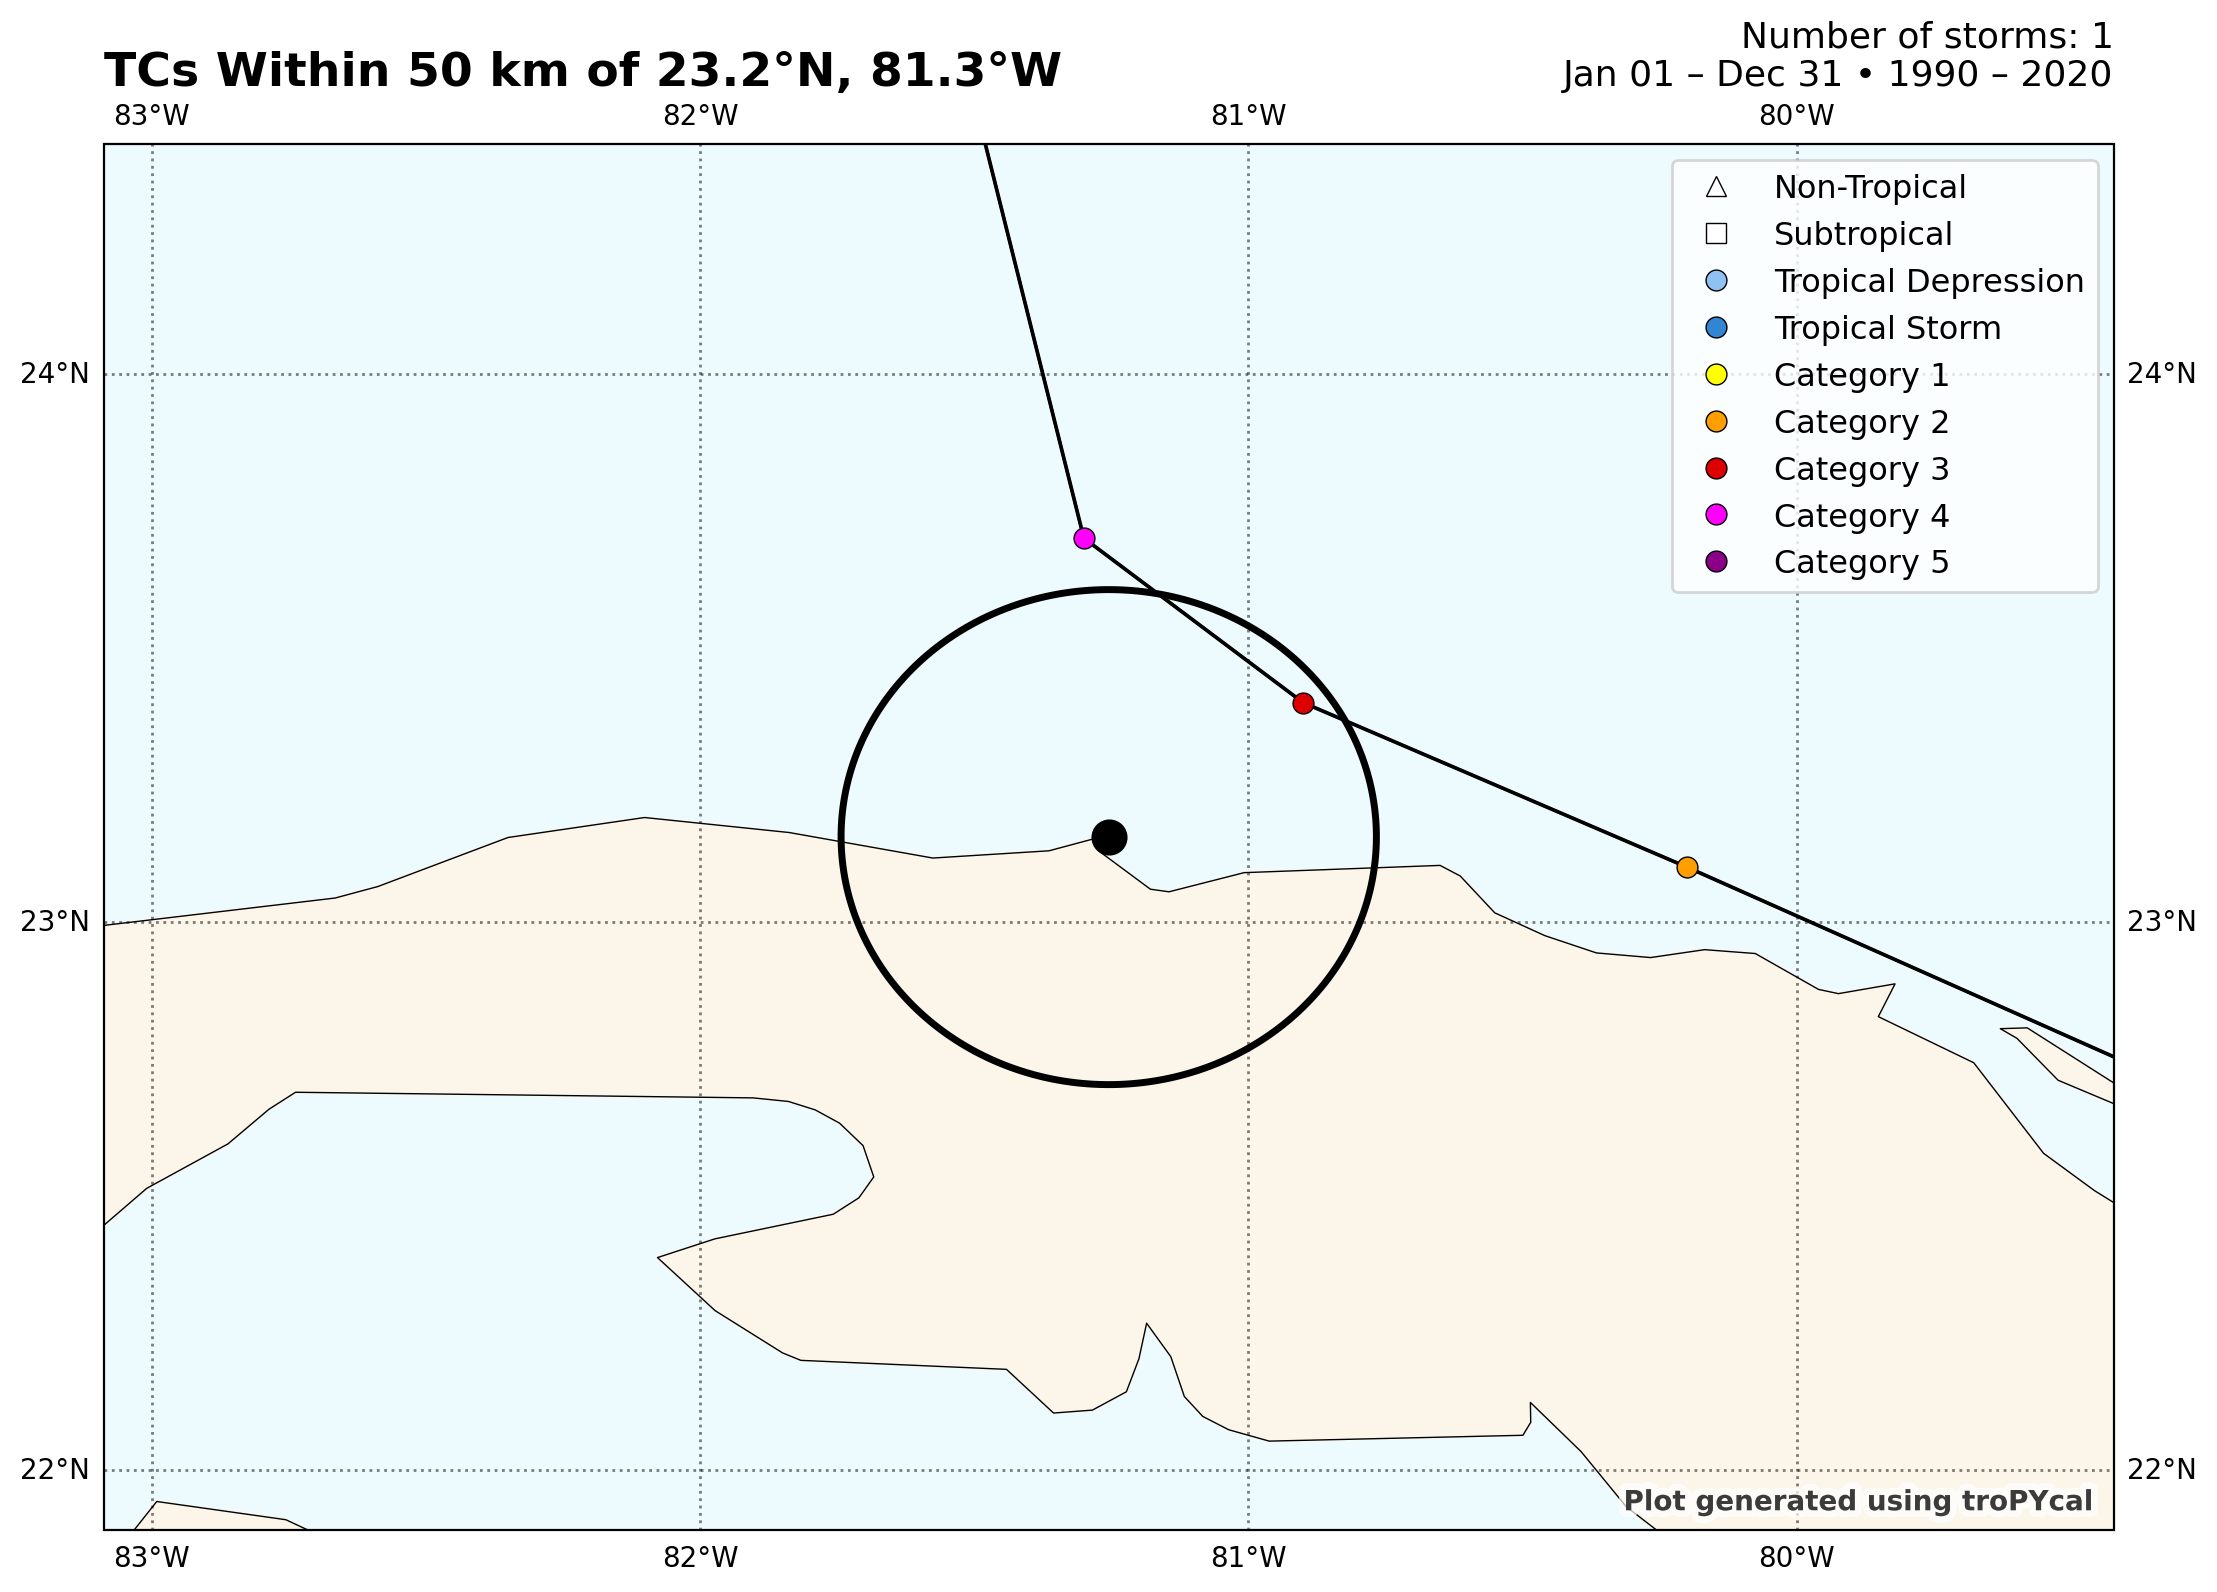

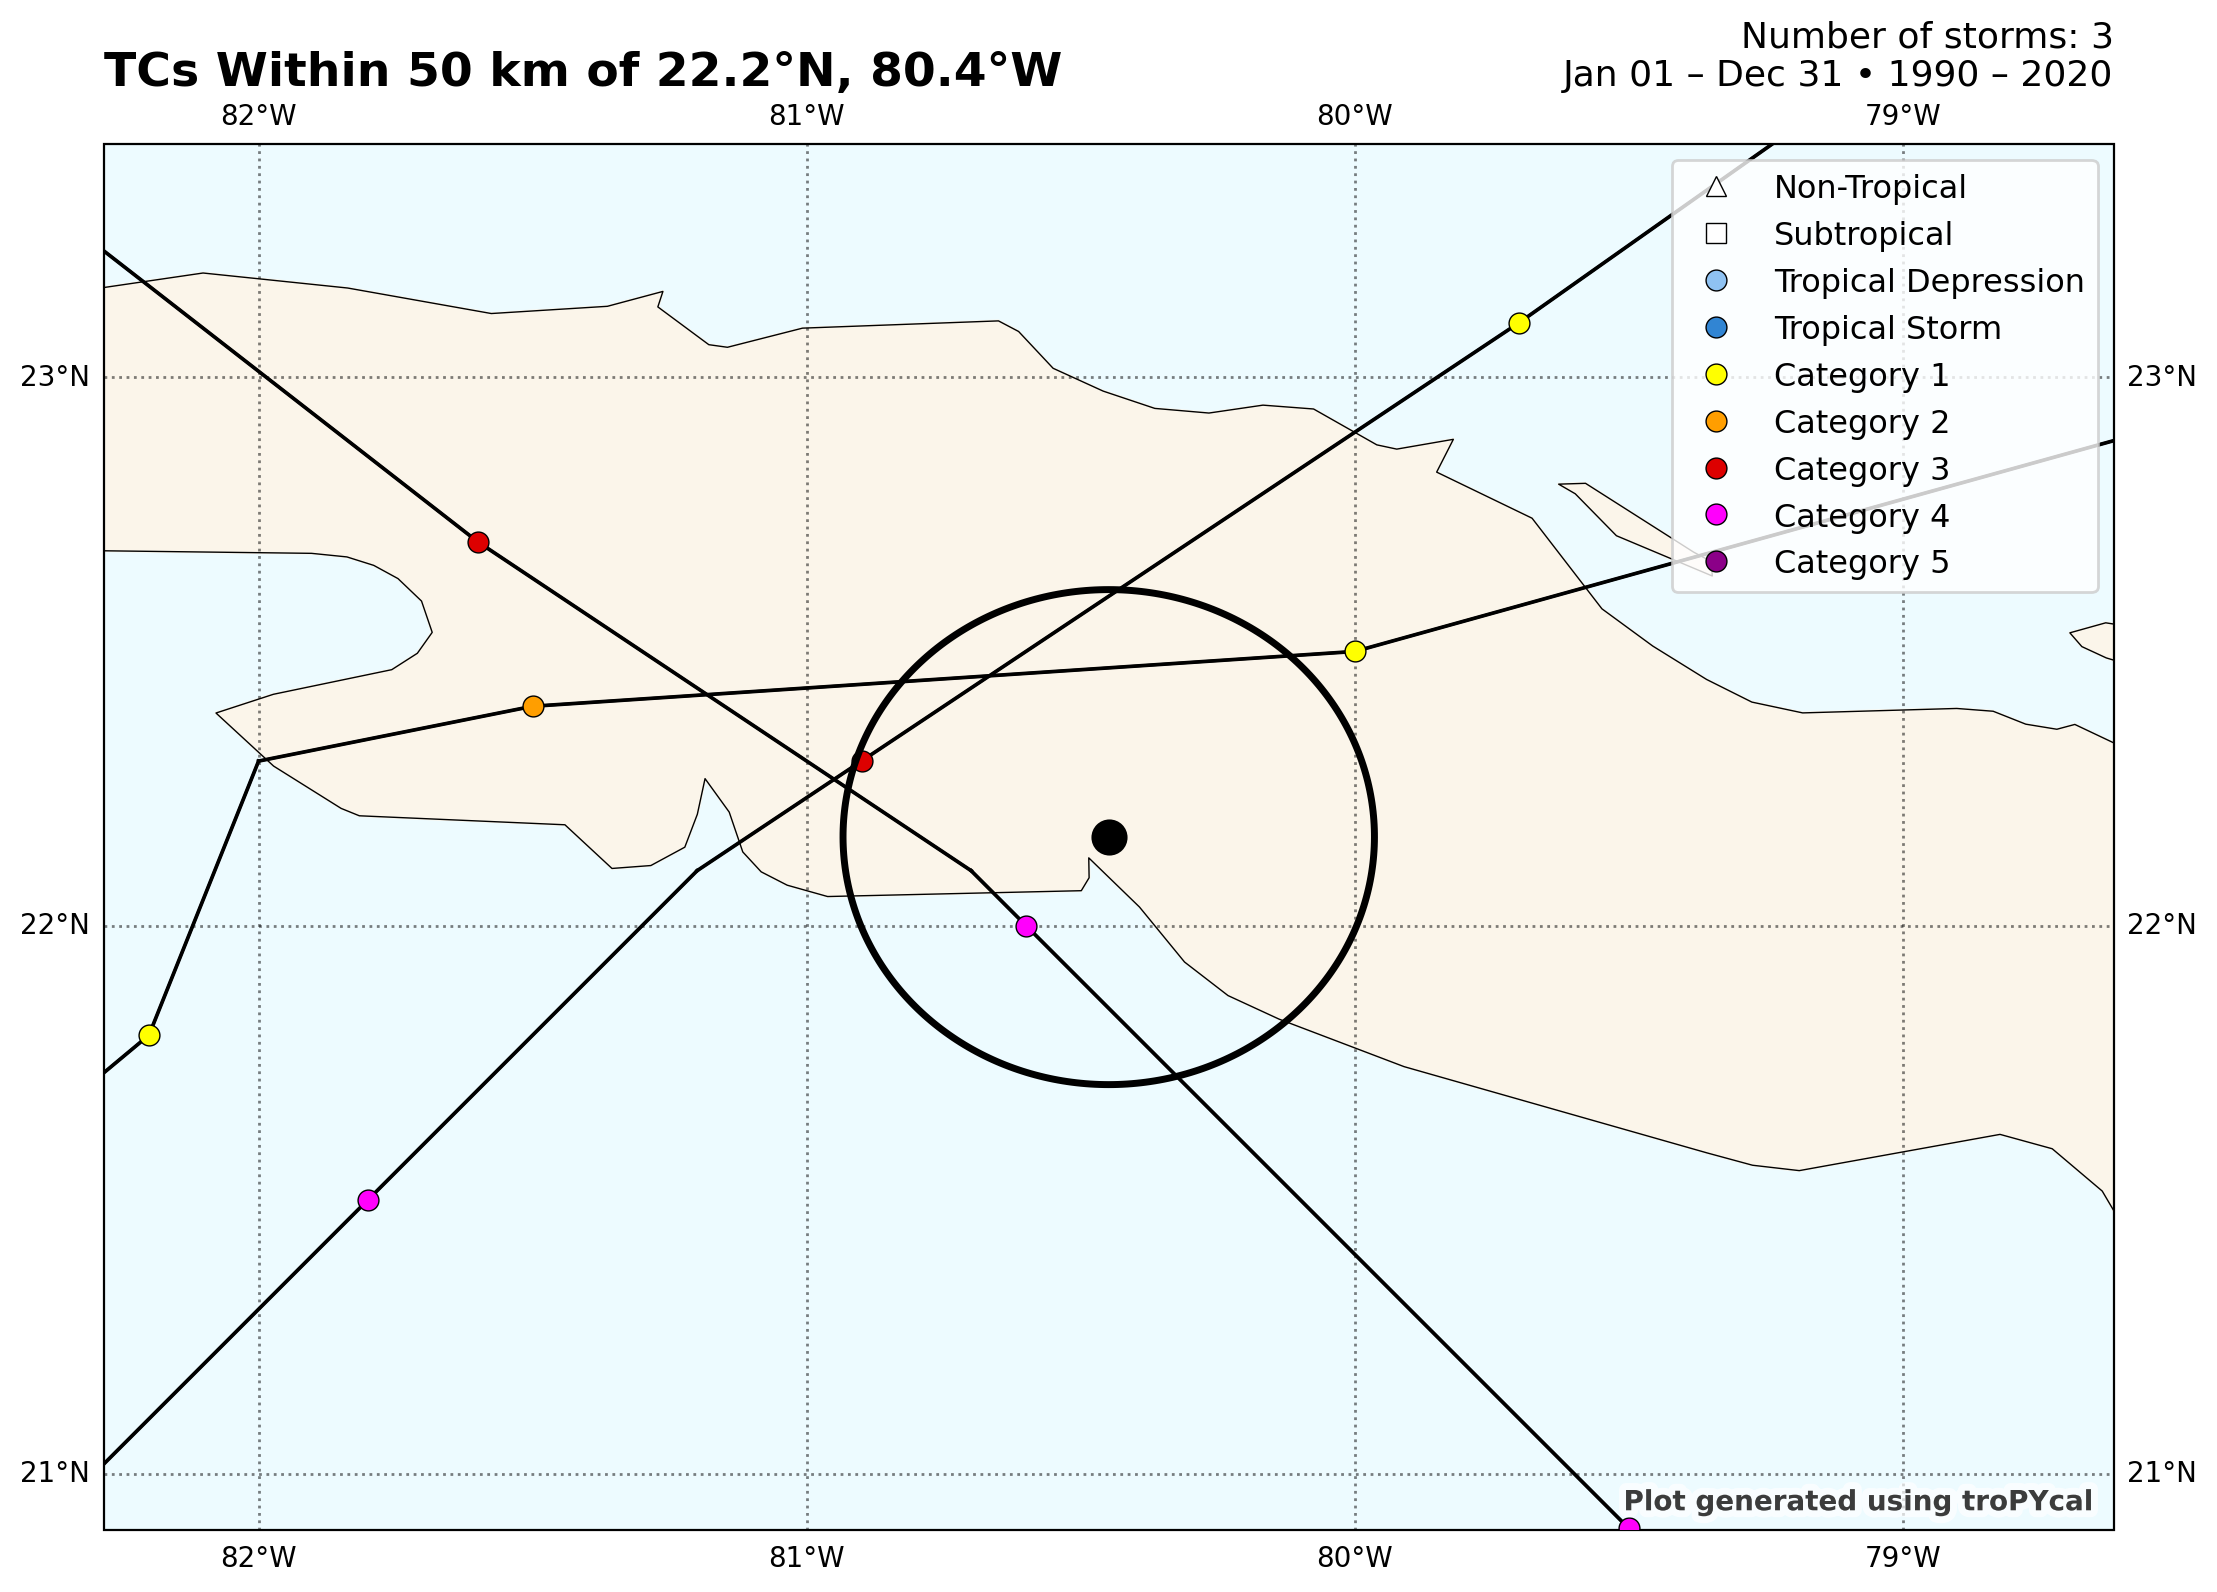

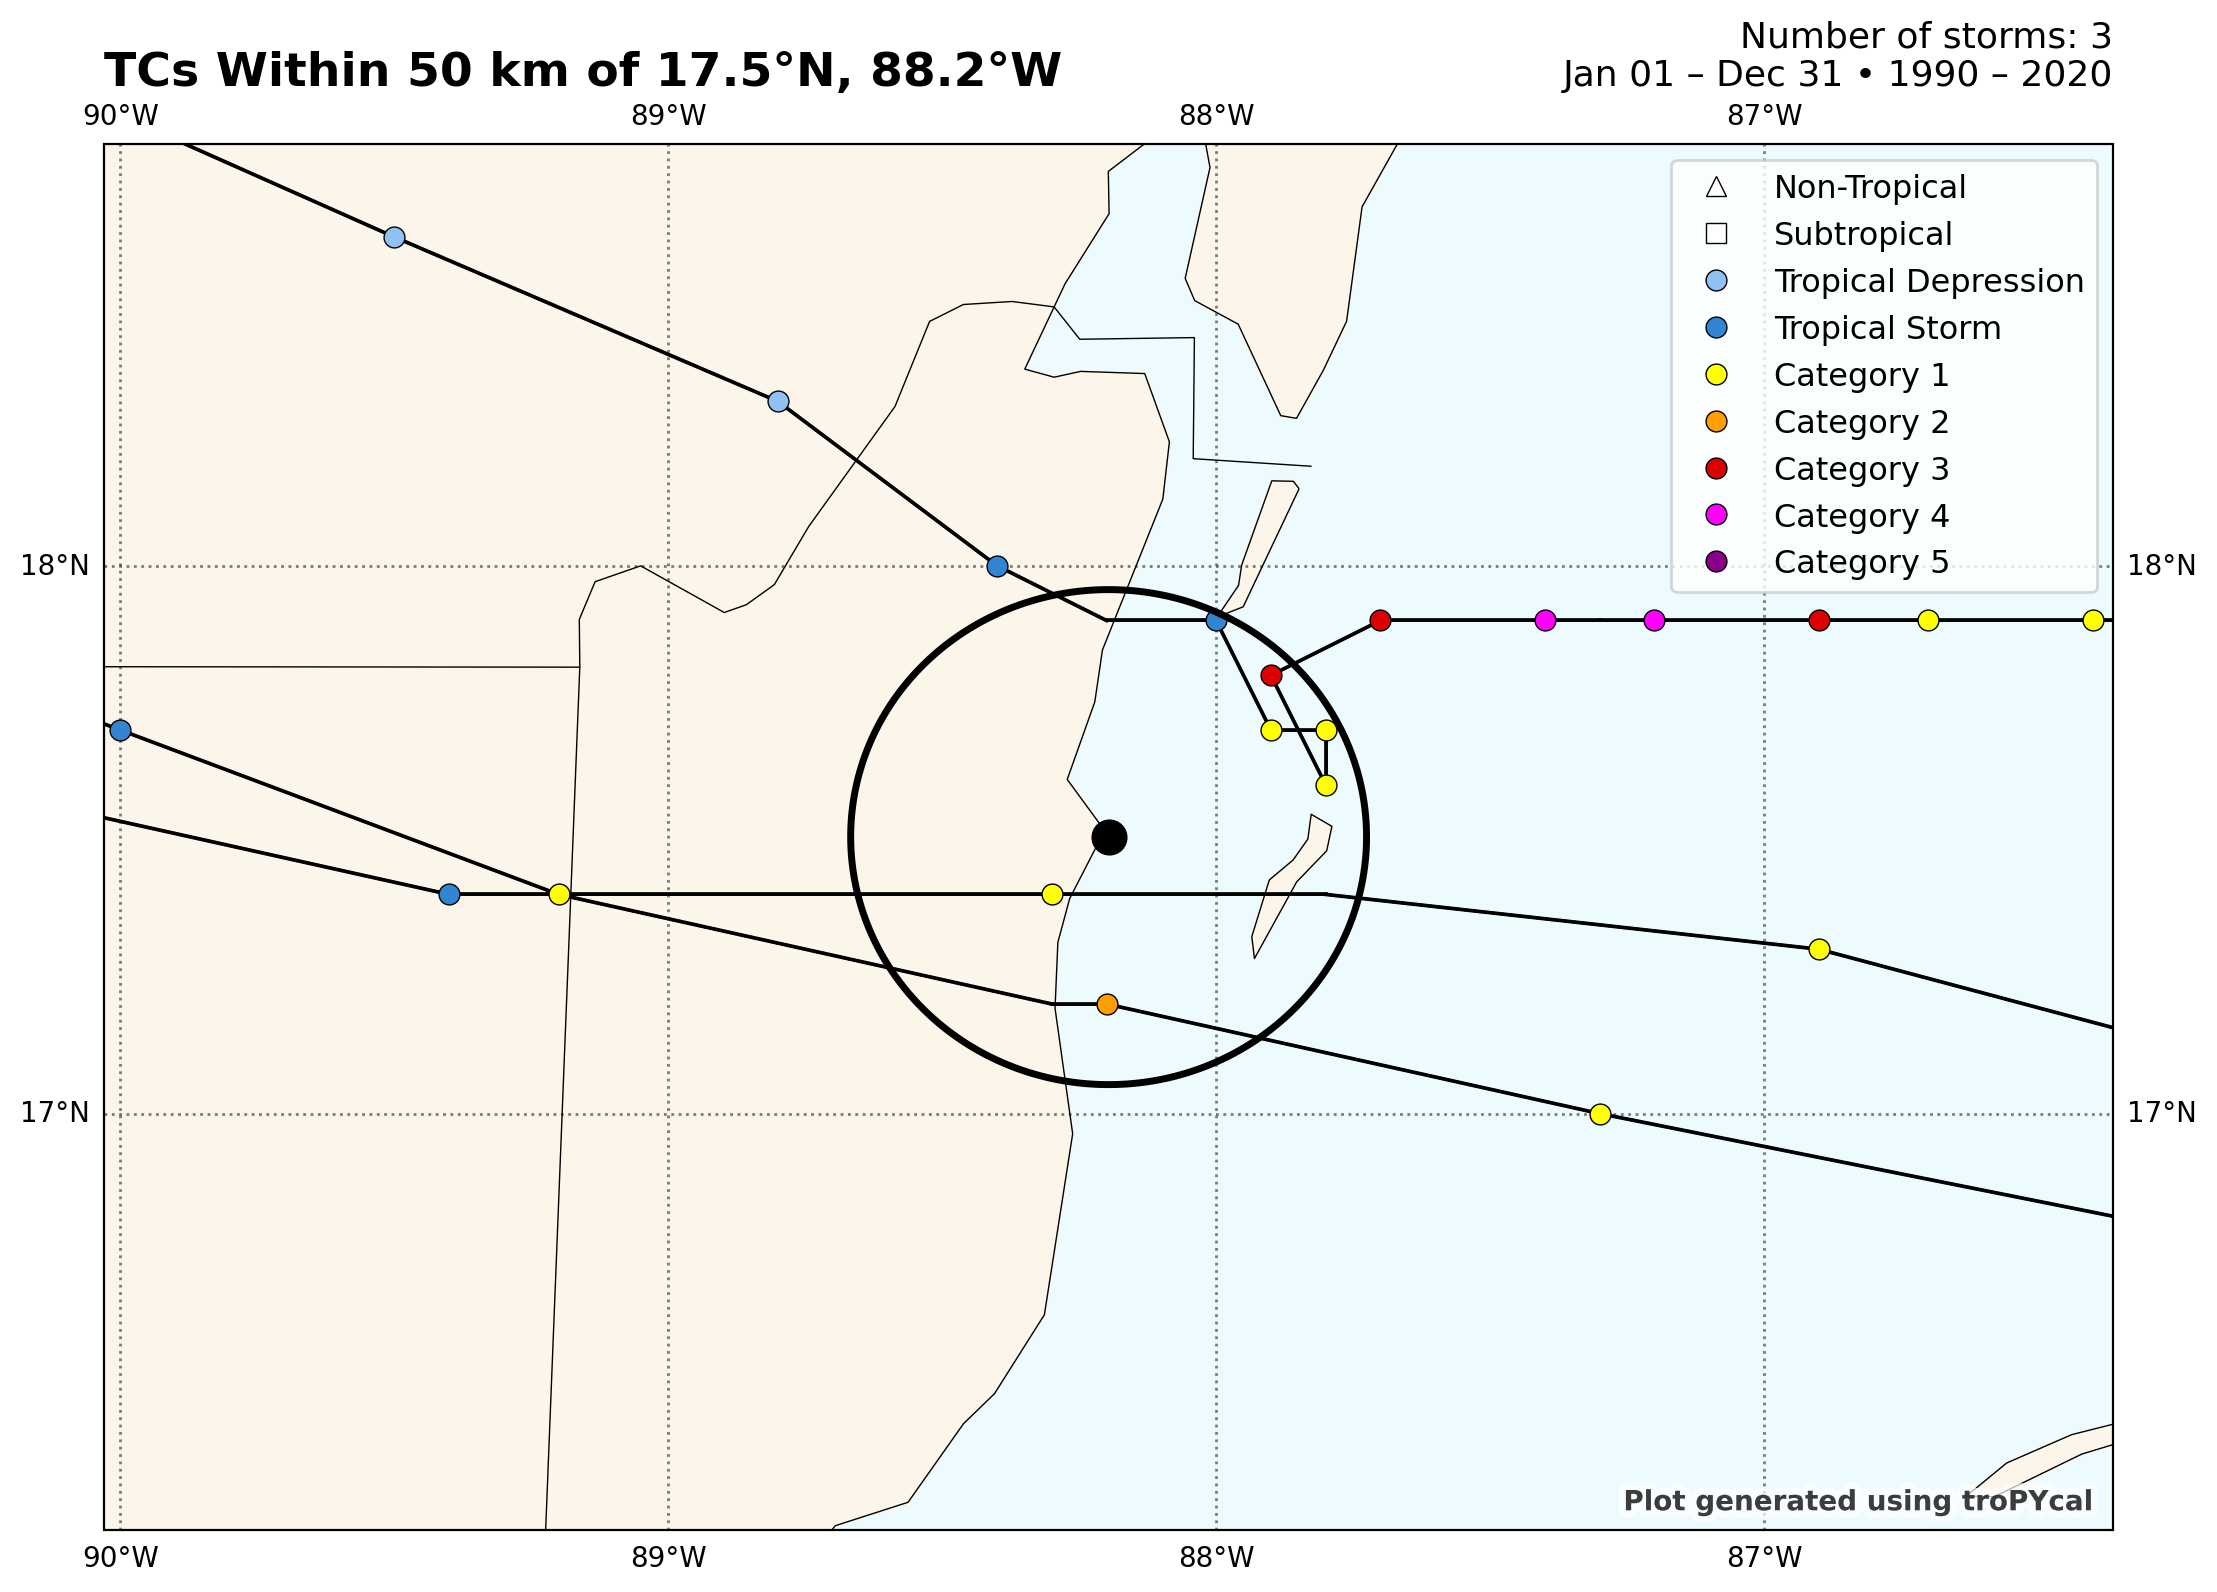

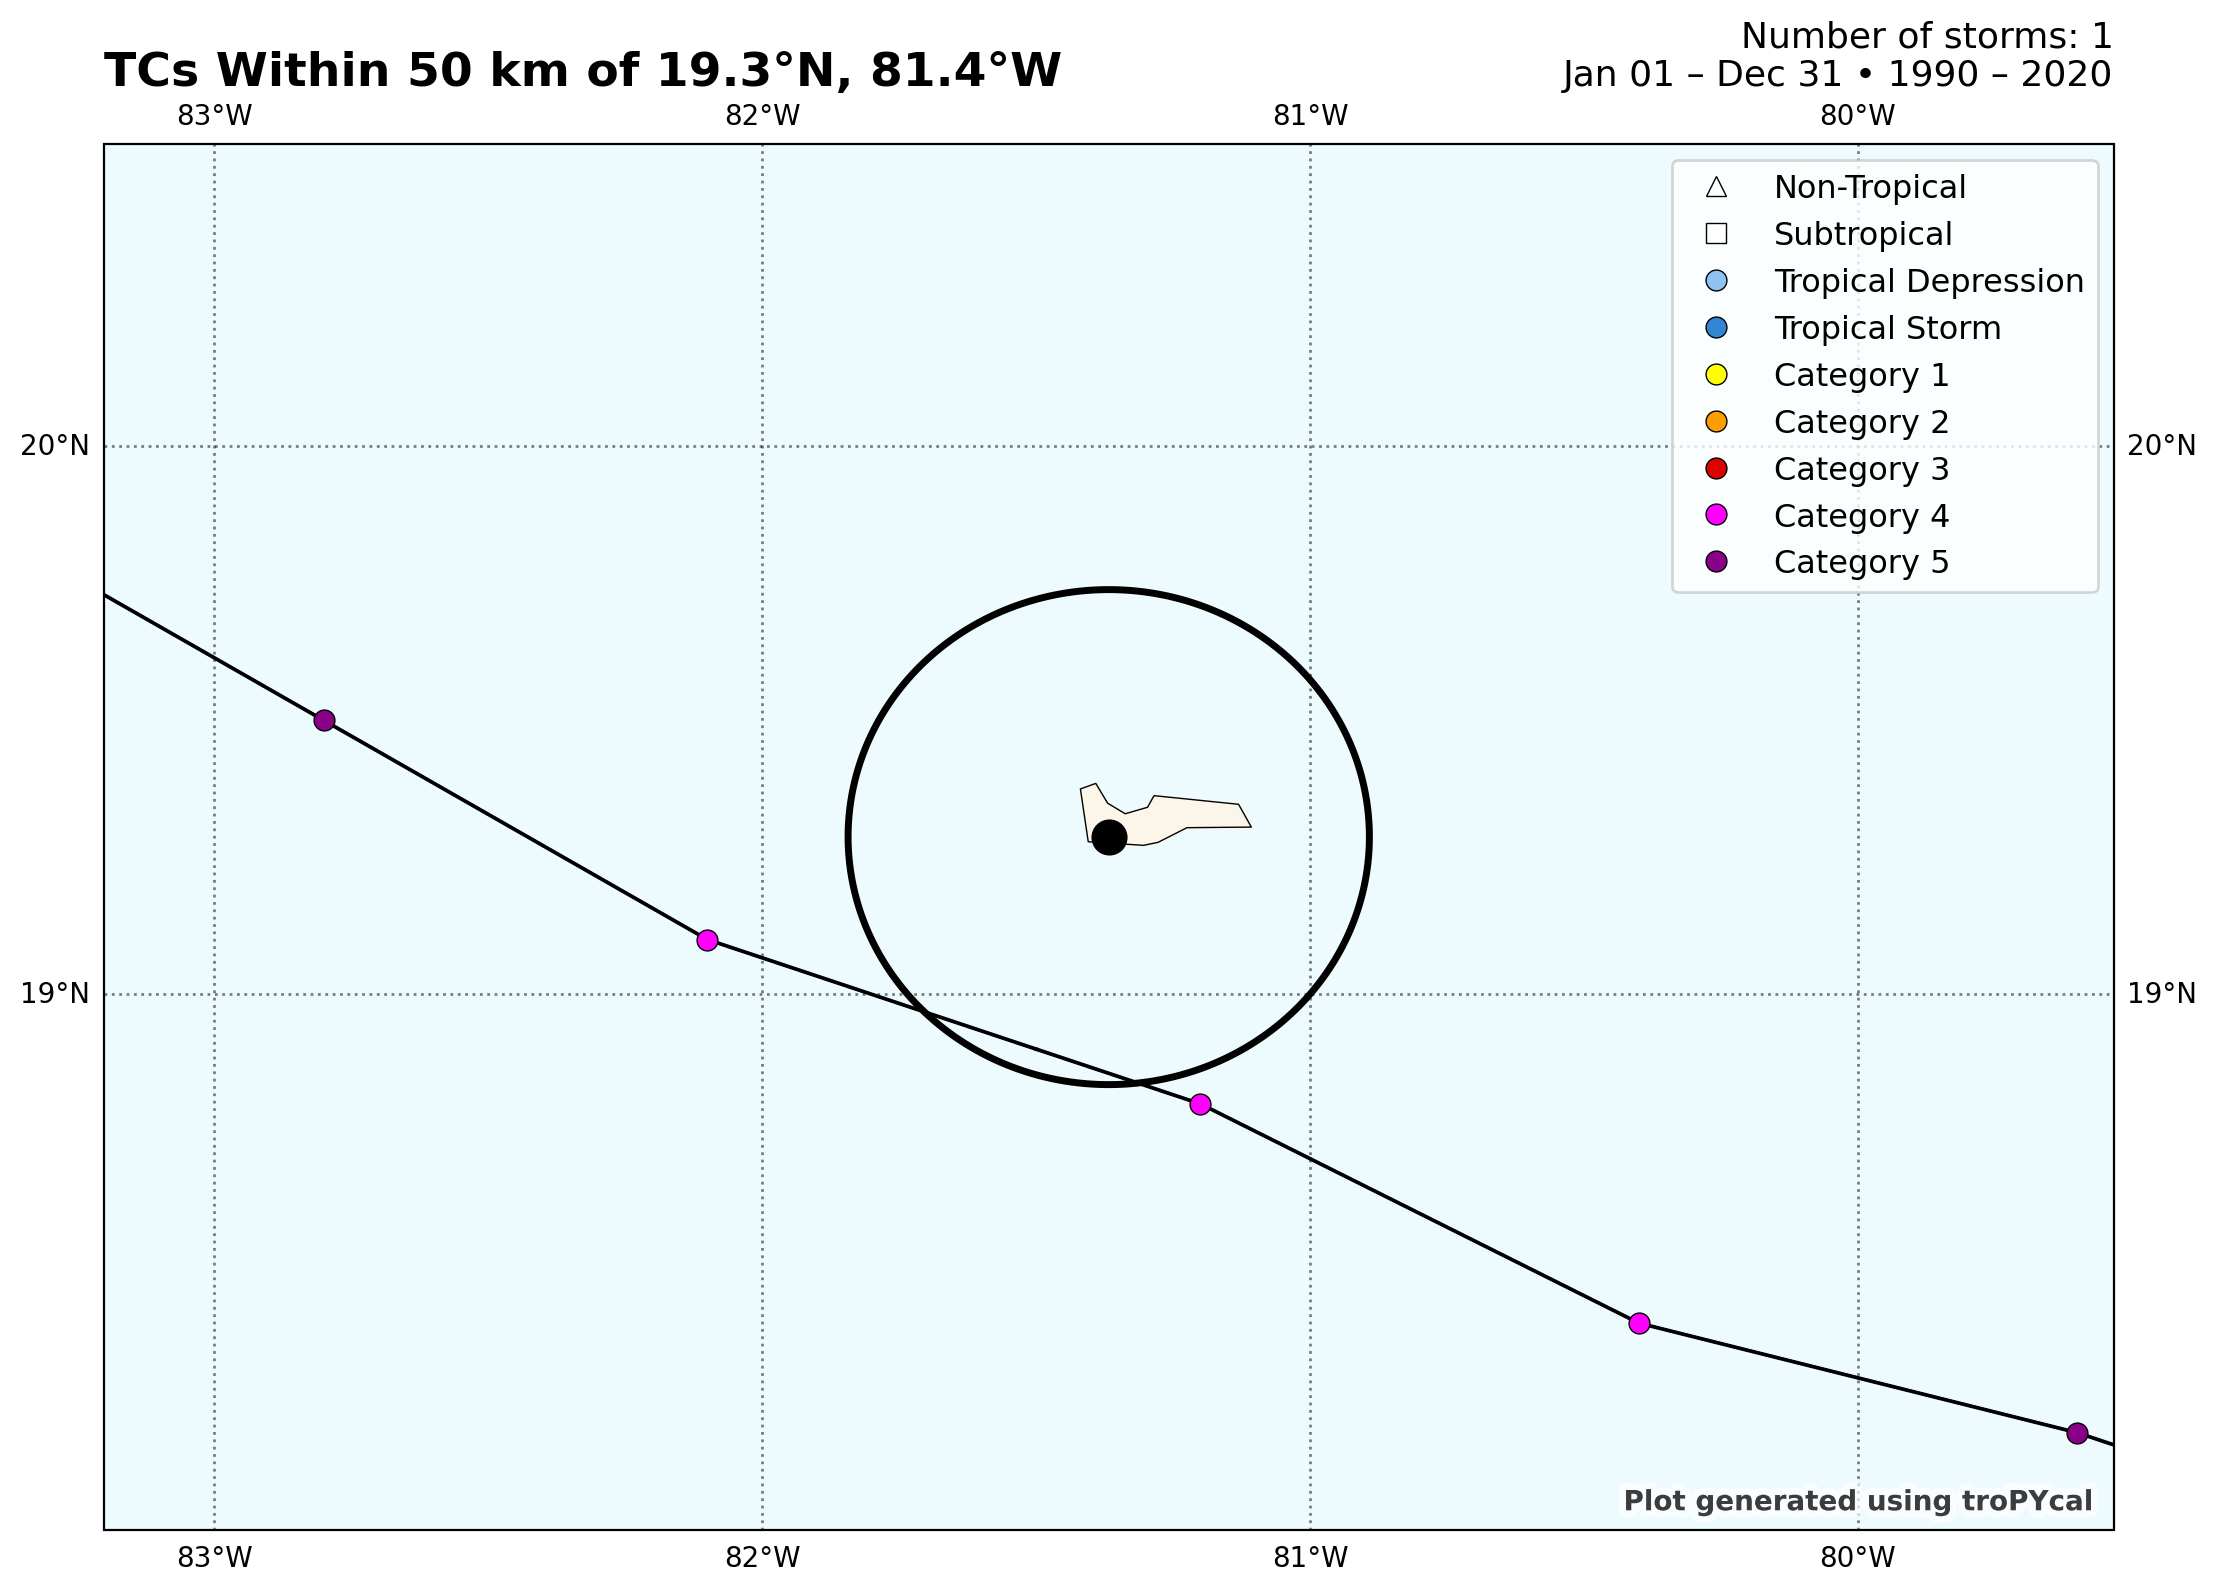

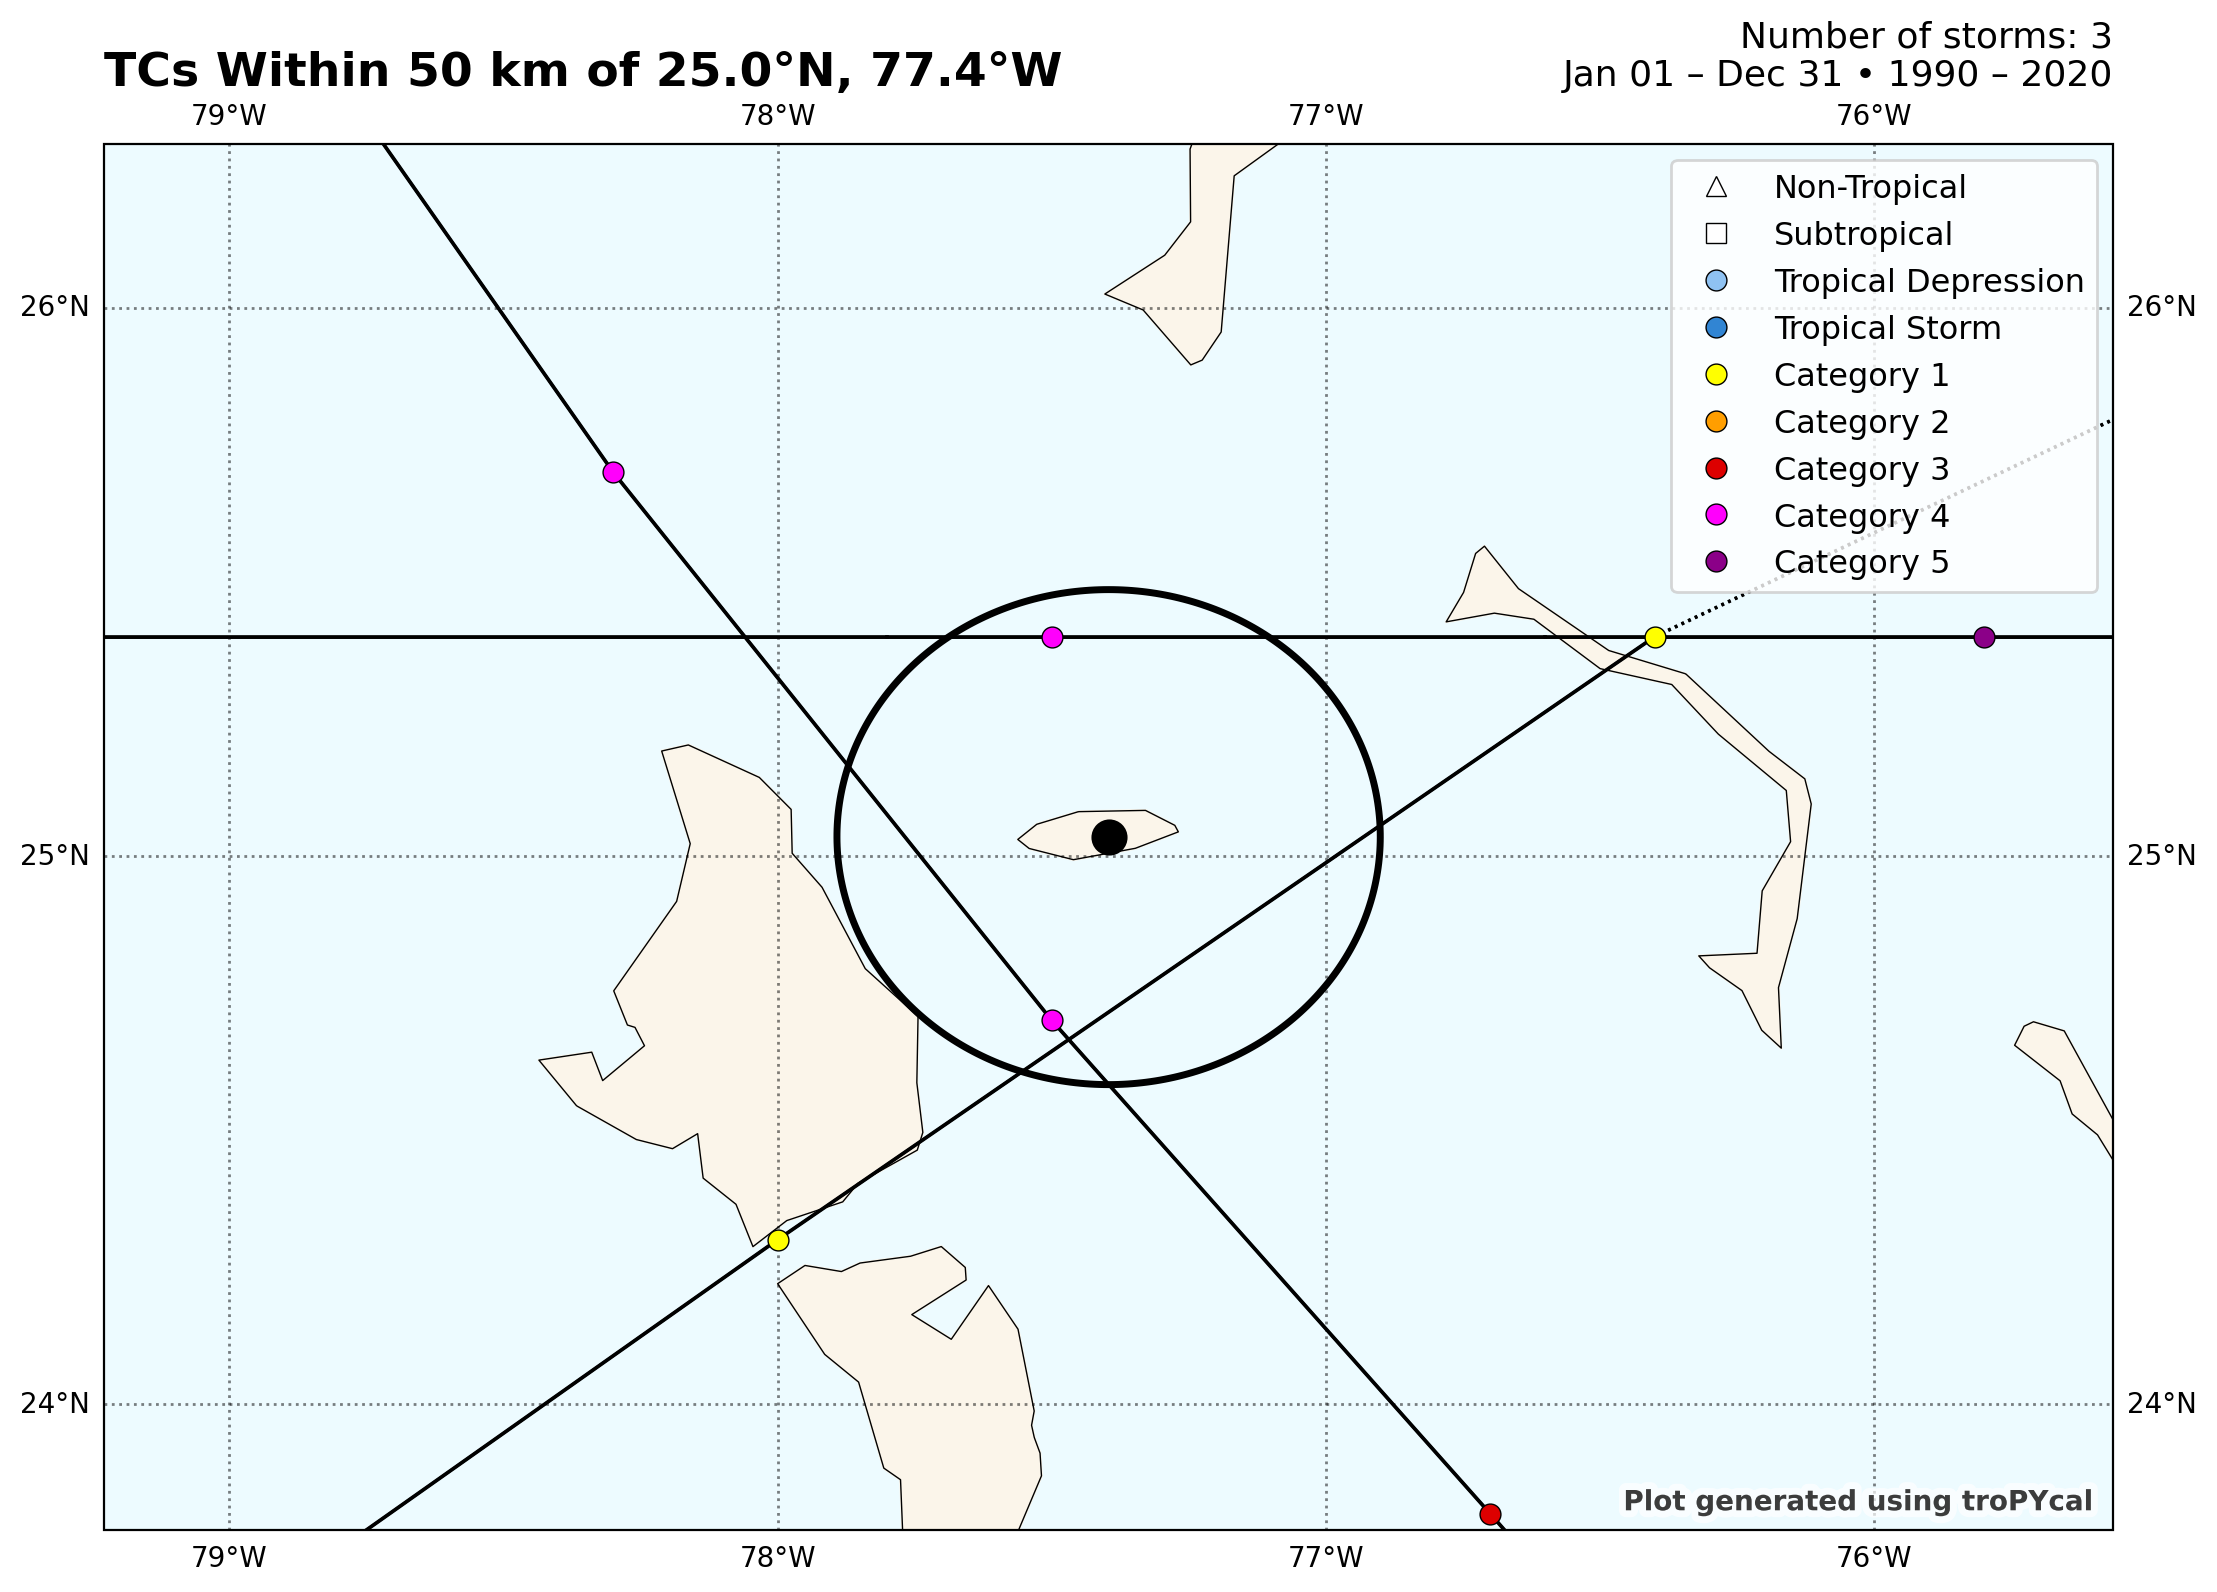

In [36]:
# Define the folder path
output_folder = "/Users/andrew/COSC-3337/hurricanePlots"  # Change this to your desired folder path
os.makedirs(output_folder, exist_ok=True)

yearRange = (1990,2020)
radius = 50
# stormLog = {}

for city,coords in target_cities.items():
    print("{} is at {}".format(city, coords))

    # Set the full path for the plot image file
    savePathCity = city.split(",")
    save_path = os.path.join(output_folder, savePathCity[0]+".png")

    storms = basin.analogs_from_point(coords,radius=radius,year_range=yearRange,thresh={'v_min':65})
    
    if not storms:
        print("No hurricanes hit within 50km of {} between 1990 and 2020\n".format(savePathCity[0]))
    else:
        print("Storm log for {}: {}\n".format(savePathCity[0], storms))
        basin.plot_analogs_from_point(coords,radius=radius,year_range=yearRange,thresh={'v_min':65},save_path=save_path)

    